# Data Visualization with ggplot2 (Part 2)

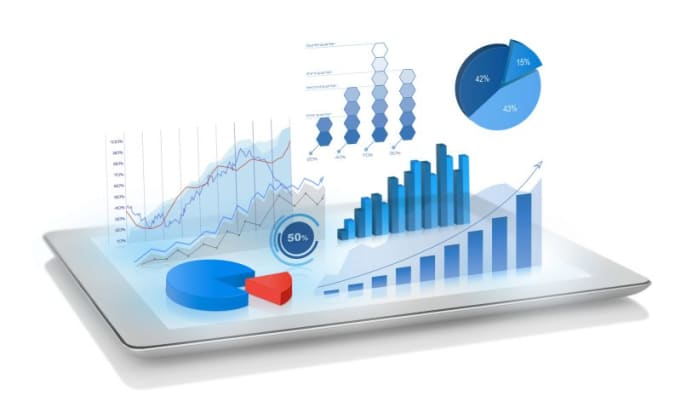

In [18]:
library("IRdisplay")
display_png(file="F:\\DATA_SCIENCE\\R-STUDIO\\DATACAMP IN R\\Data Visualization with ggplot2 (Part 2)\\ggplot2.jpg") 

# Course Description
This ggplot2 tutorial builds on your knowledge from the first course to produce meaningful explanatory plots. We'll explore the last four optional layers. Statistics will be calculated on the fly and we’ll see how Coordinates and Facets aid in communication. Publication quality plots will be produced directly in R using the Themes layer. We’ll also discuss details on data visualization best practices with ggplot2 to help make sure you have a sound understanding of what works and why. By the end of the course, you’ll have all the tools needed to make a custom plotting function to explore a large data set, combining statistics and excellent visuals.


# 1. Statistics
In this chapter, we’ll delve into how to use R ggplot2 as a tool for graphical data analysis, progressing from just plotting data to applying a variety of statistical methods. This includes a variety of linear models, descriptive and inferential statistics (mean, standard deviation and confidence intervals) and custom functions.

In [9]:
#Smoothing
#
#Welcome to the exercises for the second ggplot2 course!
#
#To practice on the remaining four layers (statistics, coordinates, facets and themes), we'll continue working on several 
#datasets that we already encountered in the first course.
#
#The mtcars dataset contains information for 32 cars from Motor Trends magazine from 1973. This dataset is small, intuitive,
#and contains a variety of continuous and categorical (both nominal and ordinal) variables.
#
#In the previous course we learned how to effectively use some basic geometries, such as point, bar and line. In the first 
#chapter of this course we'll explore statistics associated with specific geoms, for example, smoothing and lines.
#
#Familiarize yourself again with the mtcars dataset using str().
#Extend the first ggplot call: add a LOESS smooth to the scatter plot (which is the default) with geom_smooth(). 
#We want to have the actual values and the smooth on the same plot.
#
#Change the previous plot to use an ordinary linear model, by default it will be y ~ x, so you don't have to specify a formula. 
#You should set the method argument to "lm".
#
#Modify the previous plot to remove the 95% CI ribbon. You should set the se argument to FALSE.
#Modify the previous plot to show only the model, and not the underlying dots.

In [1]:
options(warn=-1)

In [2]:
library("ggplot2")

In [12]:
# Explore the mtcars data frame with str()
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


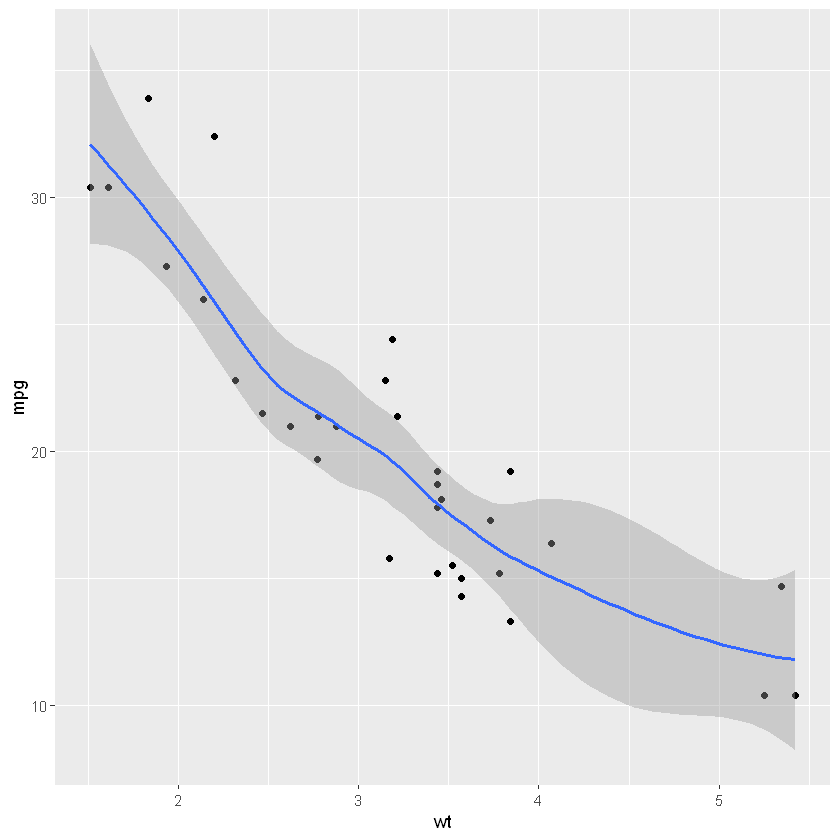

In [13]:
# A scatter plot with LOESS smooth:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() + 
  geom_smooth()

In [14]:
# Grouping variables

# We'll continue with the previous exercise by considering the situation of looking at sub-groups in our dataset. 
# For this we'll encounter the invisible group aesthetic.
# 
# A plot that maps cyl onto the col aesthetic is already coded.
# 
# Change col so that factor(cyl) is mapped onto it instead of just cyl.
# 
# Note: In this ggplot command our smooth is calculated for each subgroup because there is an invisible aesthetic, 
# group which inherits from col.
# 
# Complete the second ggplot command.
# 
# Add another stat_smooth() layer with exactly the same attributes (method set to "lm", se to FALSE).
# 
# Add a group aesthetic inside the aes() of this new stat_smooth(), set it to a dummy variable, 1.
# 

`geom_smooth()` using formula 'y ~ x'


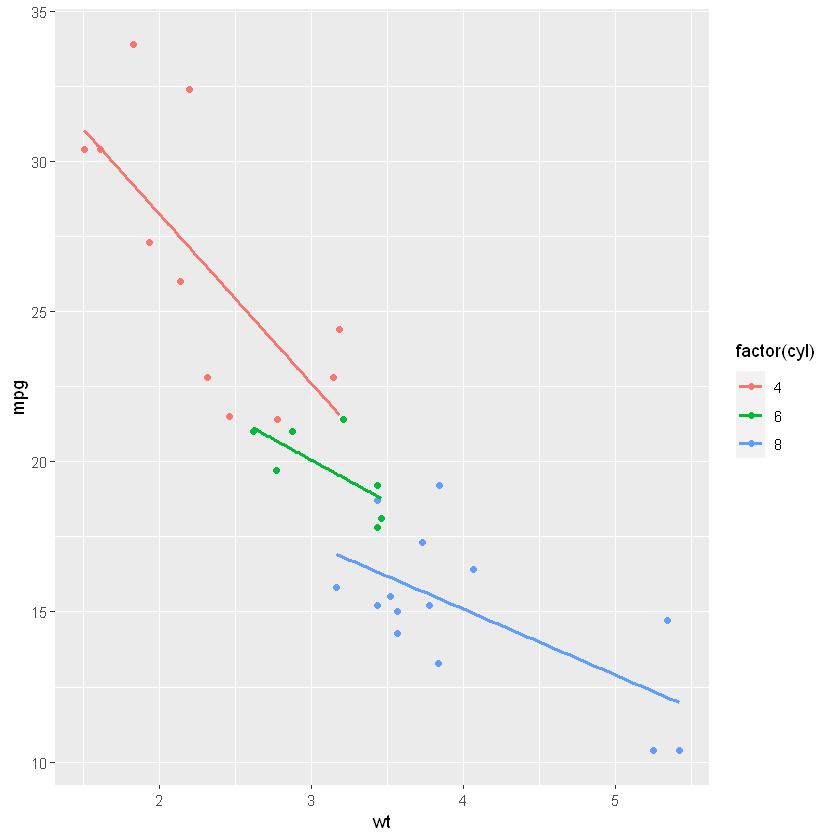

In [15]:
# ggplot2 is already loaded

# 1 - Define cyl as a factor variable
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F)

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


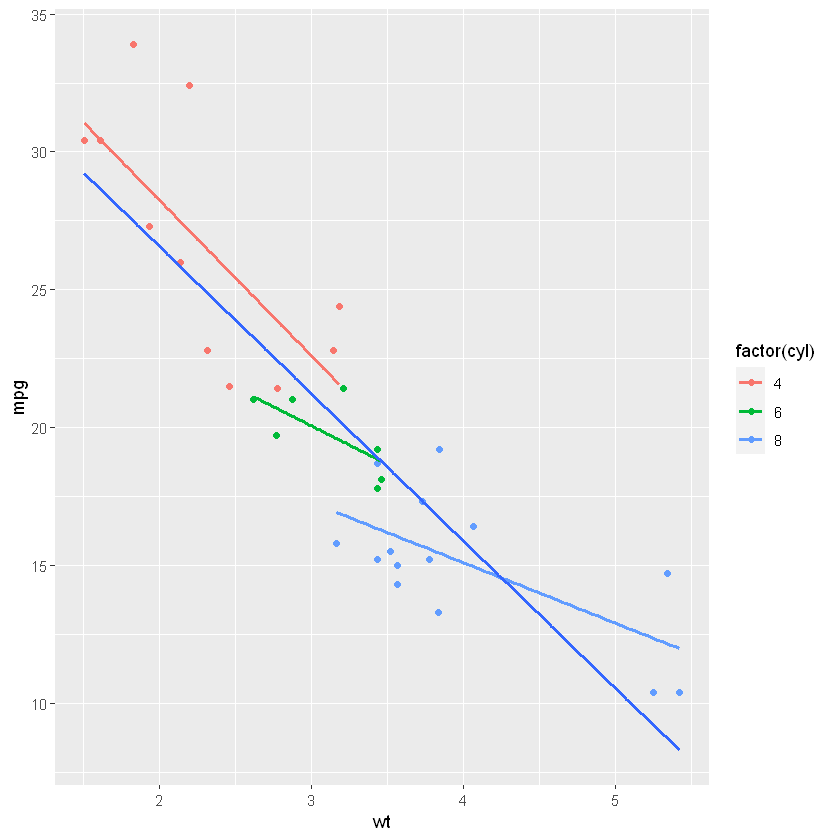

In [16]:
# 2 - Plot 1, plus another stat_smooth() containing a nested aes()
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F) +
  stat_smooth(method = "lm", se = F, aes(group = 1))

In [ ]:
# Modifying stat_smooth
# In the previous exercise we used se = FALSE in stat_smooth() to remove the 95% Confidence Interval.
# Here we'll consider another argument, span, used in LOESS smoothing, and we'll take a look at a nice scenario of properly 
# mapping different models.
# 
# ggplot2 is already loaded and several of the linear models we looked at in the two previous exercises are already given.
# 
# Instructions
# 
# Plot 1: Recall that LOESS smoothing is a non-parametric form of regression that uses a weighted, sliding-window, 
# average to calculate a line of best fit. We can control the size of this window with the span argument.
# 
# Add span, set it to 0.7.
# Plot 2: In this plot, we set a linear model for the entire dataset as well as each subgroup, defined by cyl. 
# In the second stat_smooth(),
# 
# Set method to "loess" (this is the default with a small (n < 1000) data set, but we will specify it explicitly).
# Add span, set it to 0.7.
# Plot 3: Plot 2 presents a problem because there is a black line on our plot that is not included in the legend. 
# To get this, we need to map something to col as an aesthetic, not just set col as an attribute.
# 
# Add col to the aes() function in the second stat_smooth(), set it to "All". This will name the line properly.
# Remove the col attribute in the second stat_smooth(). Otherwise, it will overwrite the col aesthetic.
# Plot 4: Now we should see our "All" model in the legend, but it's not black anymore.
# 
# Add a scale layer: scale_color_manual() with the first argument set to "Cylinders" and values set to the predefined myColors 
# variable.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


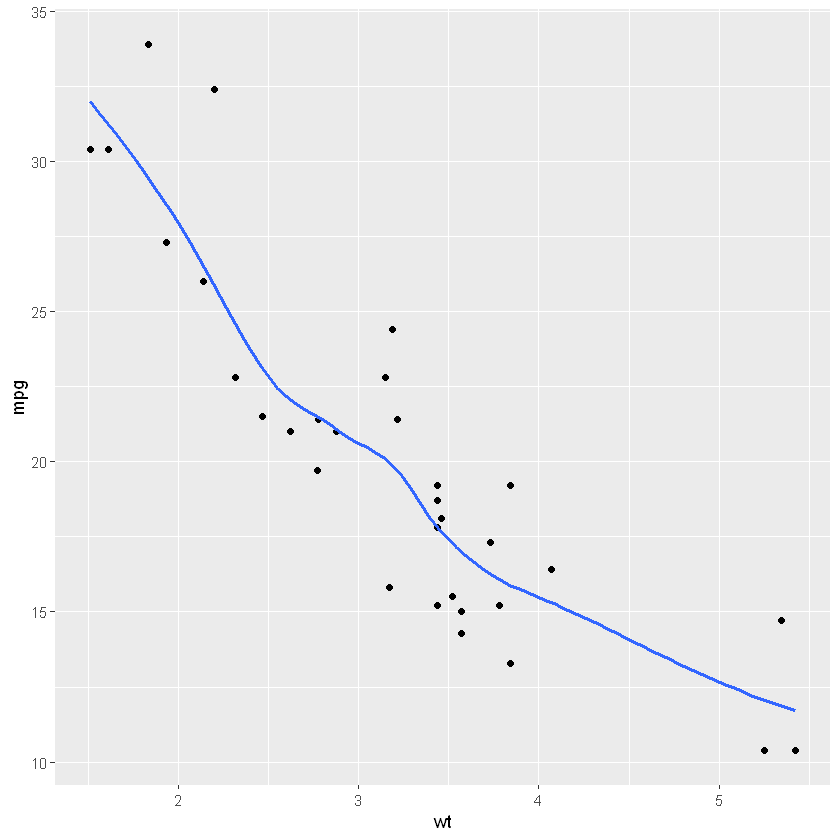

In [17]:
# Plot 1: change the LOESS span
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add span below 
  geom_smooth(se = F, span = 0.7)

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


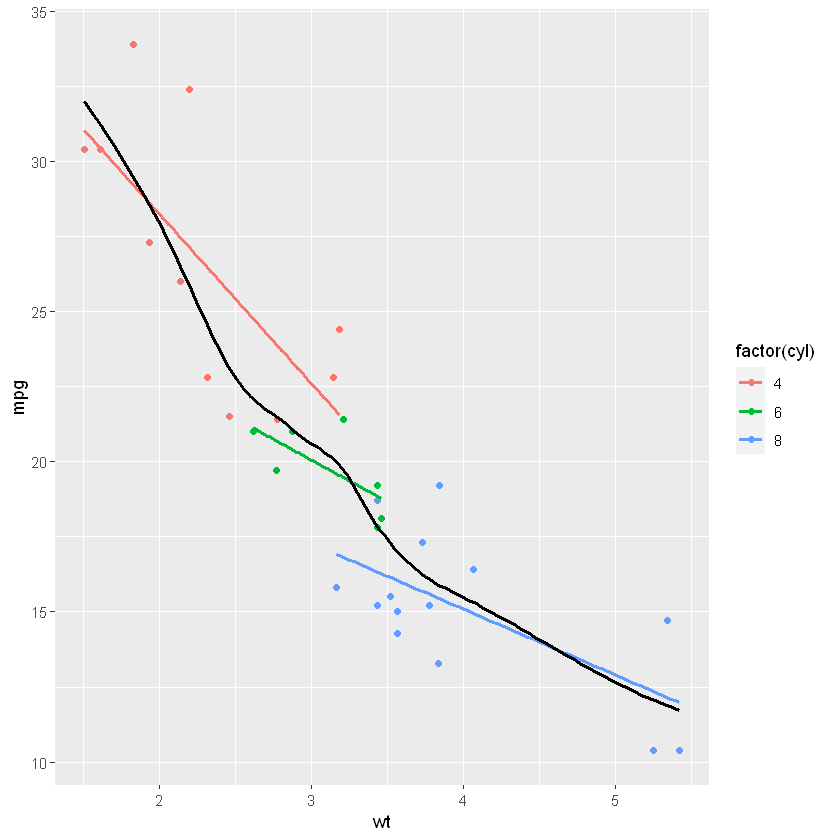

In [21]:
# Plot 2: Set the overall model to LOESS and use a span of 0.7
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F) +
  # Change method and add span below
  stat_smooth(method = "loess", aes(group = 1), 
              se = F, col = "black", span = 0.7)

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


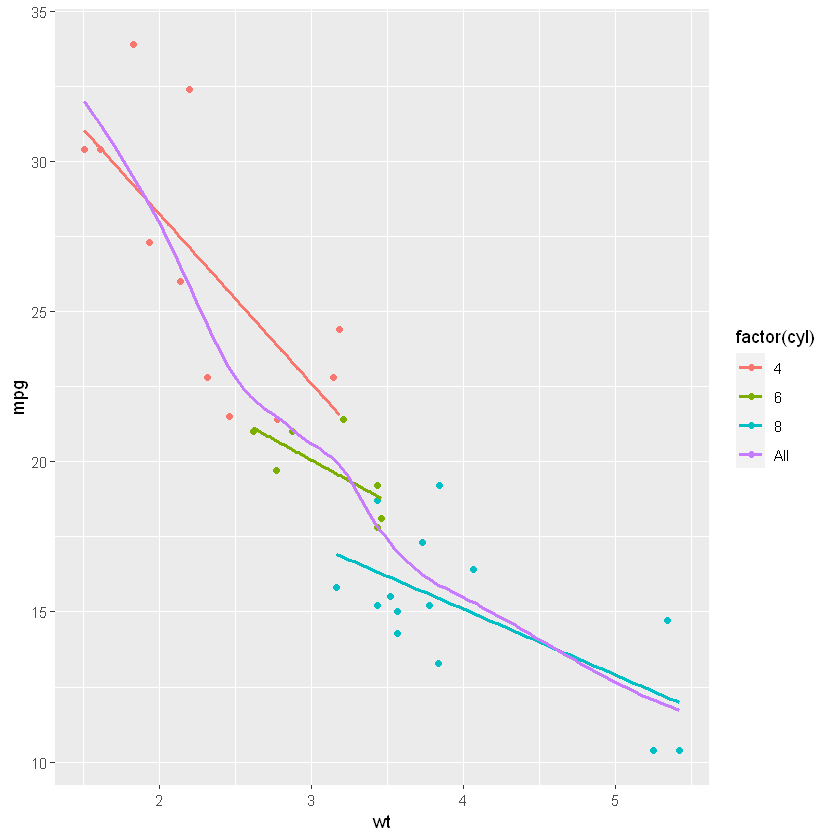

In [22]:
# Plot 3: Set col to "All", inside the aes layer of stat_smooth()
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F) +
  stat_smooth(method = "loess",
              # Add col inside aes()
              aes(group = 1, col = "All"), 
              # Remove the col argument below
              se = F, span = 0.7)

In [16]:
install.packages("RColorBrewer")
library(RColorBrewer)

package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PAVILION 2\AppData\Local\Temp\RtmpcvKsOl\downloaded_packages


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


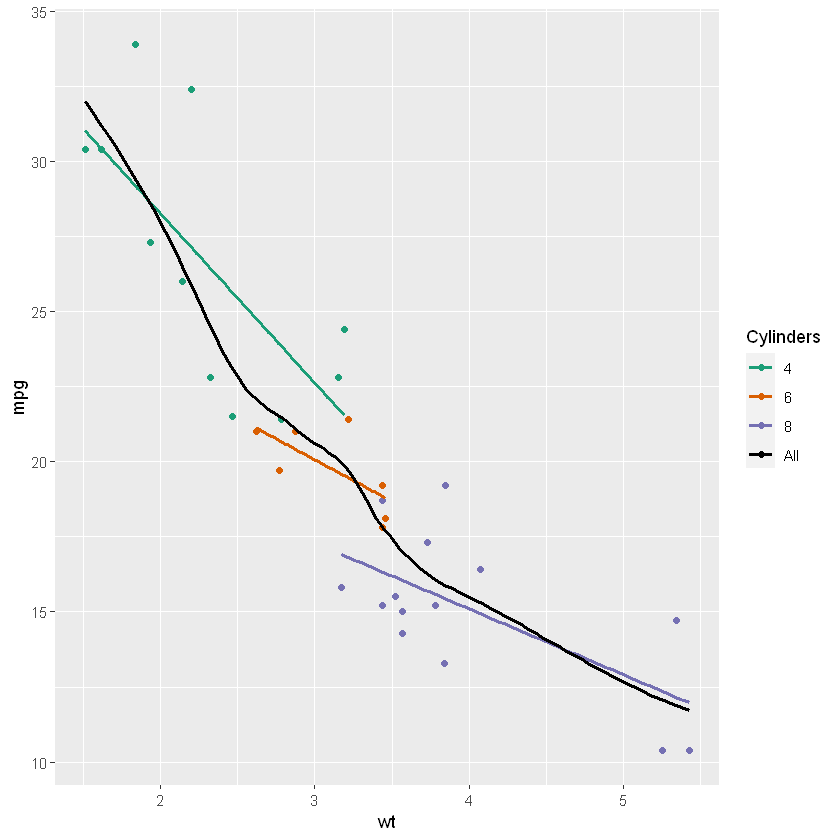

In [17]:
# Plot 4: Add scale_color_manual to change the colors
myColors <- c(brewer.pal(3, "Dark2"), "black")
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE, span = 0.7) +
  stat_smooth(method = "loess", 
              aes(group = 1, col="All"), 
              se = FALSE, span = 0.7) +
  # Add correct arguments to scale_color_manual
  scale_color_manual("Cylinders", values = myColors)

In [ ]:
# Modifying stat_smooth (2)
# In this exercise we'll take a look at a more subtle example of defining and using linear models. ggplot2 and 
# the Vocab data frame are already loaded for you.
# 
# Plot 1: This code produces a jittered plot of vocabulary against education, variables from the Vocab data frame.
# 
# Add a stat_smooth() layer with method set to "lm". Hide the CI ribbons by using se = FALSE.
# Plot 2: Color by year.
# 
# Specify the col = year aesthetic to the nested ggplot(aes()) function.
# To see why this works, try using only col = year, and adding points.
# Plot 3: Linear model for each year.
# 
# We need to specify year as a factor variable if we want to use it as a grouping variable for our linear models. 
# Add the col = factor(year) aesthetic to the nested ggplot(aes()) function.
# Plot 4: Years are ordered, so use a sequential color palette.
# 
# Add scale_color_brewer().
# Don't add any arguments here. This results in a warning message, since the default palette, "Blues", only has 9 colors. 
# Since we have 16 years, this is not a complete solution!
# Plot 5: To get the proper colors, we can use col = year, because the variable year is type integer and we want a continuous 
# scale. However, we'll need to specify the invisible group aesthetic so that our linear models are still calculated appropriately. 
# The scale layer, scale_color_gradientn(), has been provided for you - this allows us to map a continuous variable onto a colour scale.
# 
# Add group = factor(year) inside aes().
# Inside stat_smooth(), set alpha = 0.6 and size = 2.

In [7]:
install.packages("car") 

package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PAVILION 2\AppData\Local\Temp\RtmpcvKsOl\downloaded_packages


In [9]:
head(Vocab)

,year,sex,education,vocabulary
19740001,1974,Male,14,9
19740002,1974,Male,16,9
19740003,1974,Female,10,9
19740004,1974,Female,10,5
19740005,1974,Female,12,8
19740006,1974,Male,16,8


`geom_smooth()` using formula 'y ~ x'


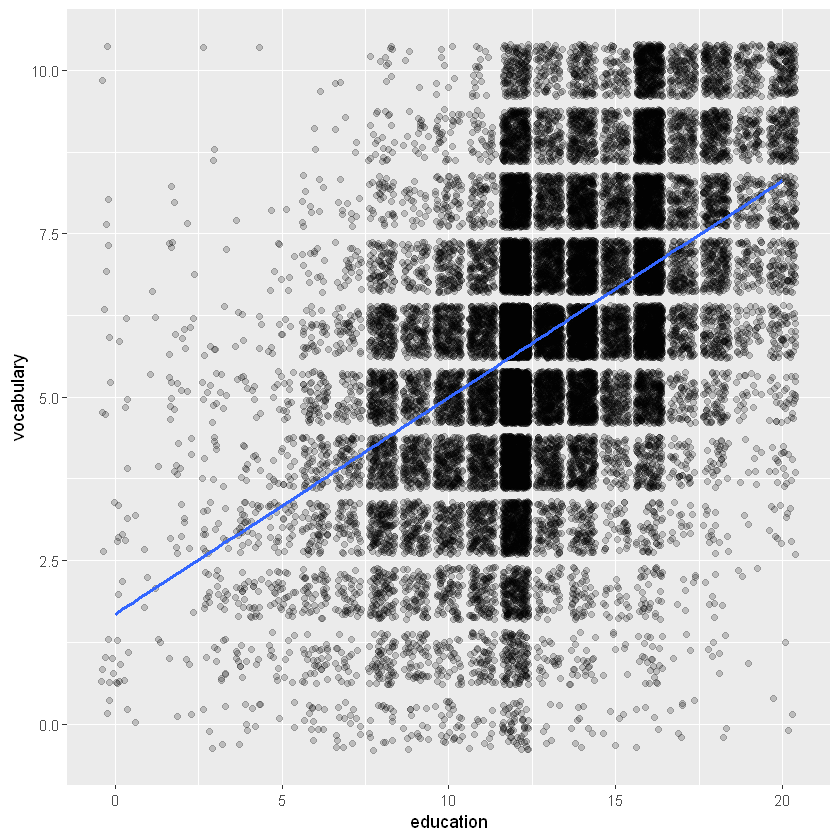

In [10]:
# Plot 1: Jittered scatter plot, add a linear model (lm) smooth
ggplot(Vocab, aes(x = education, y = vocabulary)) +geom_jitter(alpha = 0.2) +stat_smooth(method = "lm", se = FALSE) # smooth

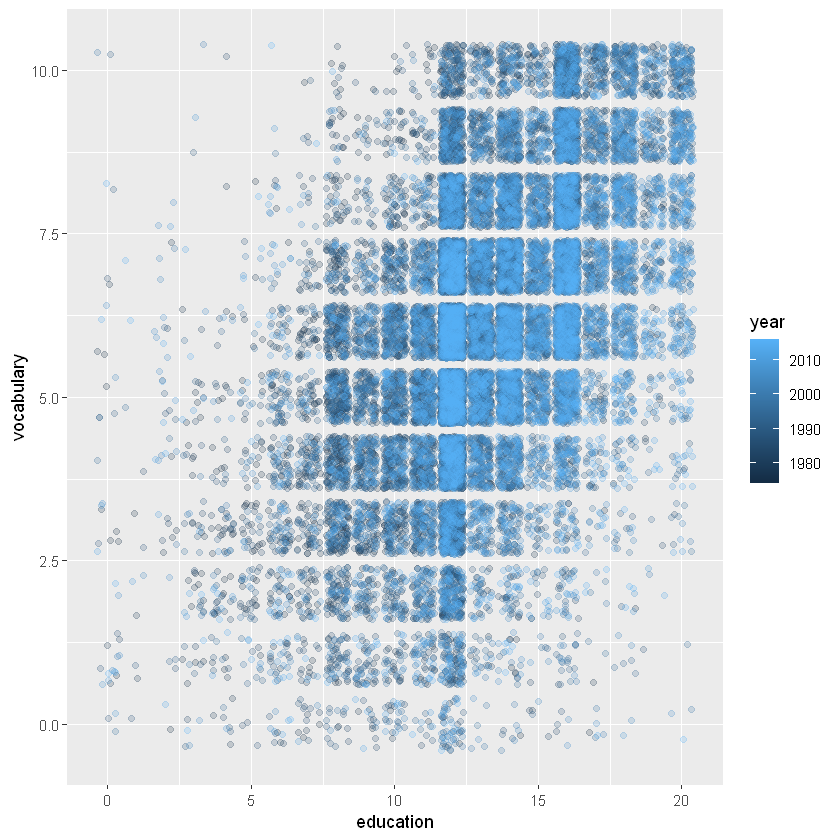

In [12]:
# Plot 2: points, colored by year
ggplot(Vocab, aes(x = education, y = vocabulary, col = year)) +geom_jitter(alpha = 0.2) 

`geom_smooth()` using formula 'y ~ x'


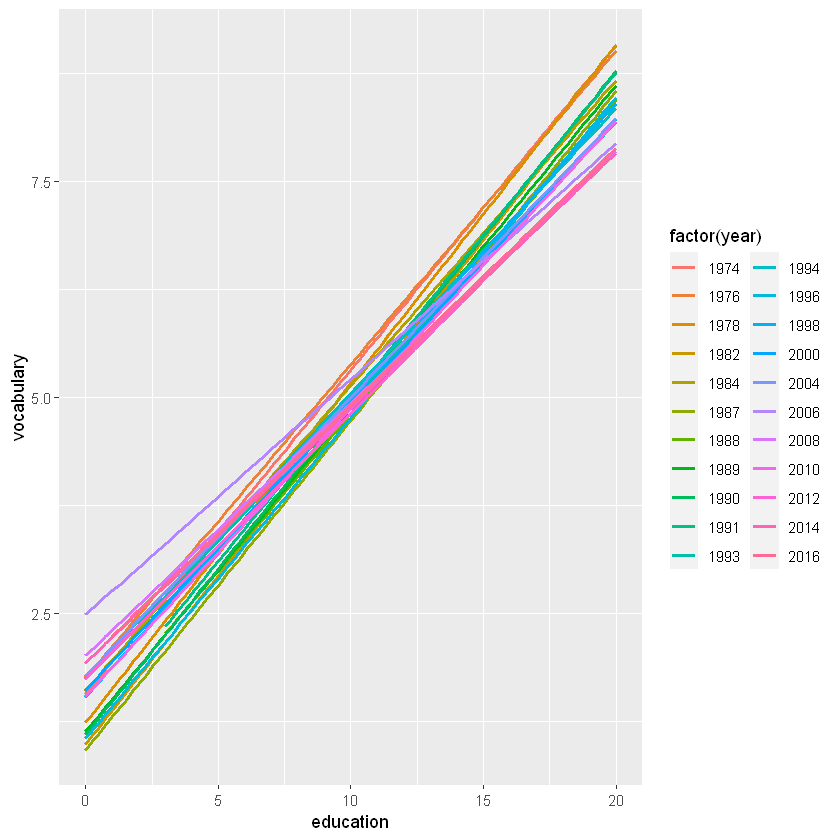

In [11]:
# Plot 3: lm, colored by year
ggplot(Vocab, aes(x = education, y = vocabulary, col = factor(year)))+stat_smooth(method = "lm", se = F) # smooth

`geom_smooth()` using formula 'y ~ x'


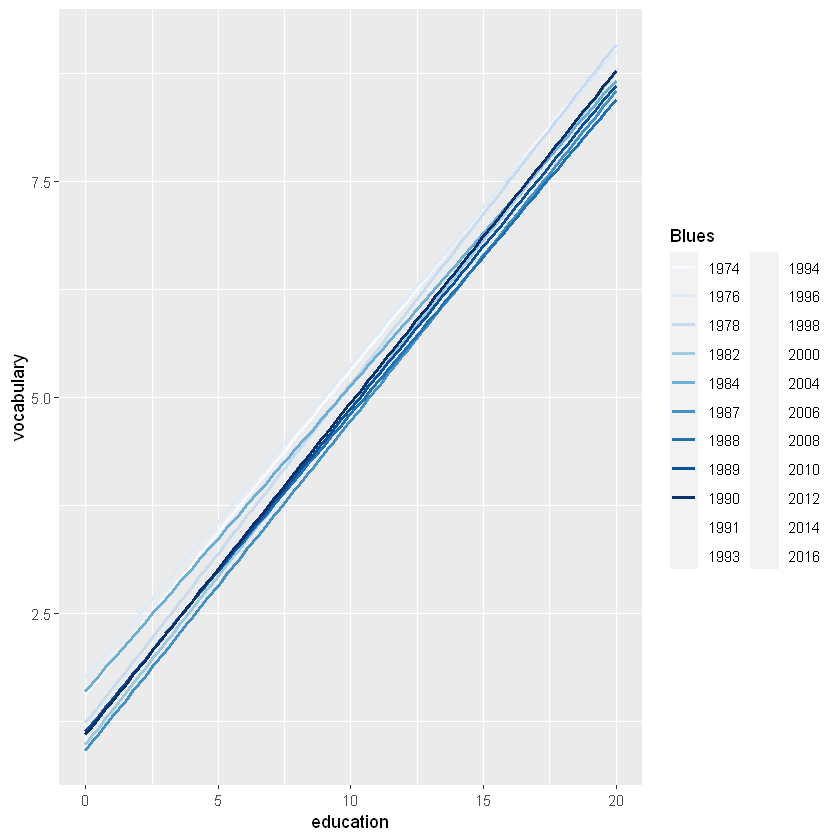

In [13]:
# Plot 4: Set a color brewer palette
ggplot(Vocab, aes(x = education, y = vocabulary, col = factor(year)))+stat_smooth(method = "lm", se = F) +   # smooth
  scale_color_brewer("Blues")  # colors

`geom_smooth()` using formula 'y ~ x'


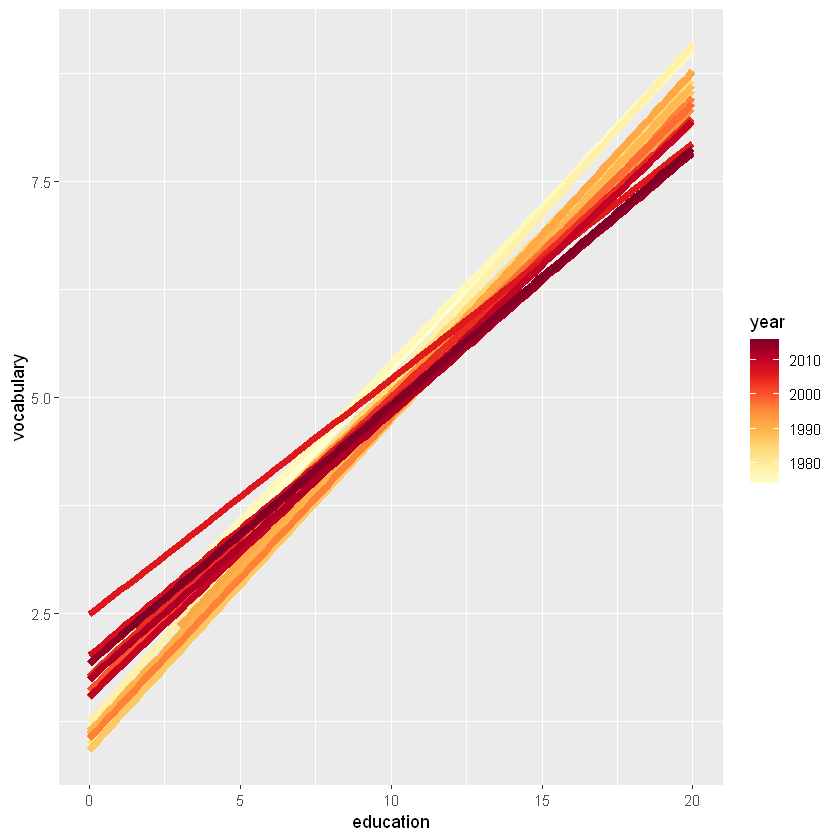

In [18]:
# Plot 5: Add the group aes, specify alpha and size
ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group =factor(year))) +stat_smooth(method = "lm", se = FALSE, alpha = 0.6, size = 2) +scale_color_gradientn(colors = brewer.pal(9, "YlOrRd"))

In [40]:
# Quantiles
# The previous example used the Vocab dataset and applied linear models describing vocabulary by education for different years. 
# Here we'll continue with that example by using stat_quantile() to apply a quantile regression (method rq).
# 
# By default, the 1st, 2nd (i.e. median), and 3rd quartiles are modeled as a response to the predictor variable,
# in this case education. Specific quantiles can be specified with the quantiles argument.
# 
# If you want to specify many quantile and color according to year, then things get too busy.
# We'll explore ways of dealing with this in the next chapter.
# 
# The code from the previous exercise, with the linear model and a suitable color palette, is already shown.
# 
# Update the plotting code.
# Change the stat function from stat_smooth() to stat_quantile().
# Get rid of all the arguments except alpha and size.
# The resulting plot will be a mess, because there are three quartiles drawn by default.
# Copy the code for the previous instruction.
# Set the quantiles argument to 0.5 so that only the median is shown.

Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. U

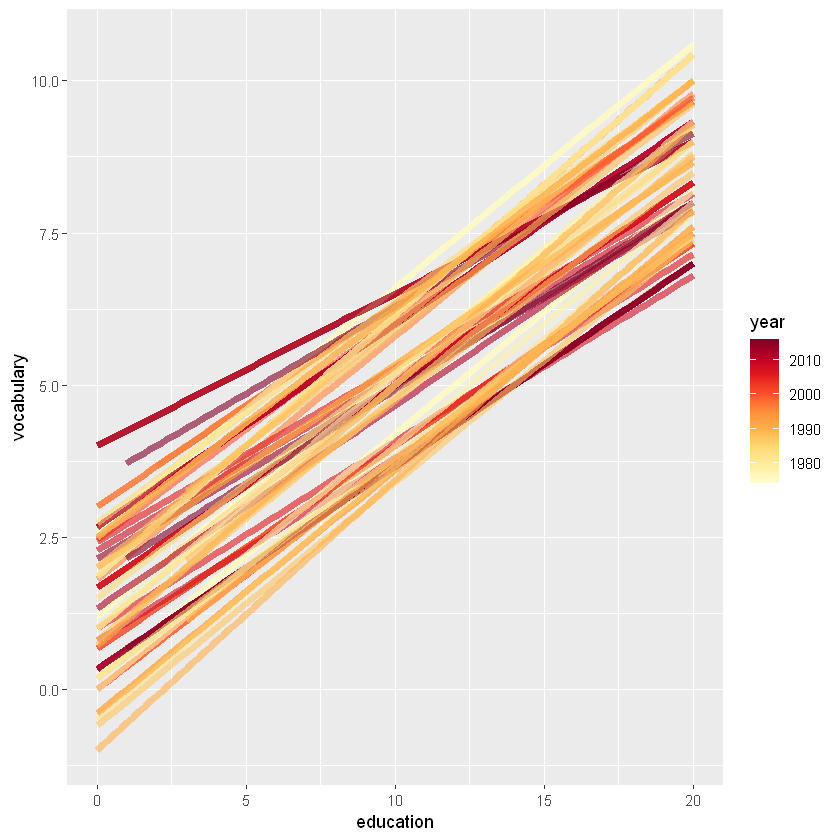

In [41]:
# Use stat_quantile instead of stat_smooth:
ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group = factor(year))) +
  stat_quantile(alpha = 0.6, size = 2) +
  scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"))

Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. U

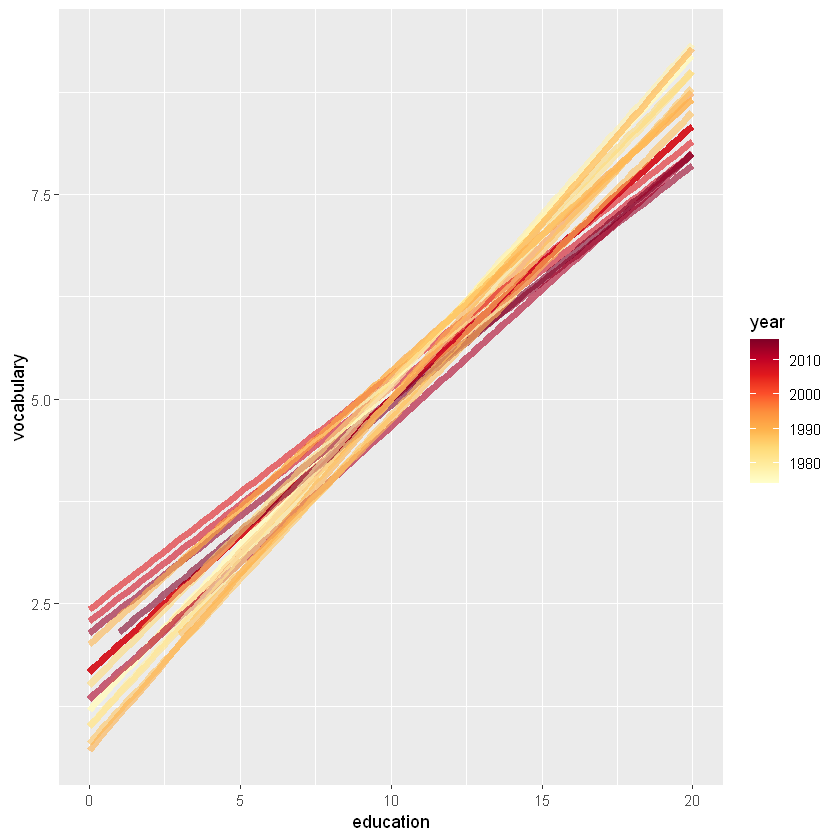

In [42]:
# Set quantile to 0.5:
ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group = factor(year))) +
  stat_quantile(alpha = 0.6, size = 2, quantiles = 0.5) +
  scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"))

In [43]:
# Sum
# Another useful stat function is stat_sum(). This function calculates the total number of overlapping observations and is 
# another good alternative to overplotting.
# 
# ggplot2 is already loaded. A plot showing jittered points is already provided and stored as p.
# 
# Instructions
# 
# Add stat_sum() to this plotting object p. This maps the overall count of each dot onto size. 
# You don't have to set any arguments; the aesthetics will be inherited from the base plot!
# Add the size scale with the generic scale_size() function. Use range to set the minimum and maximum dot sizes as c(1,10).

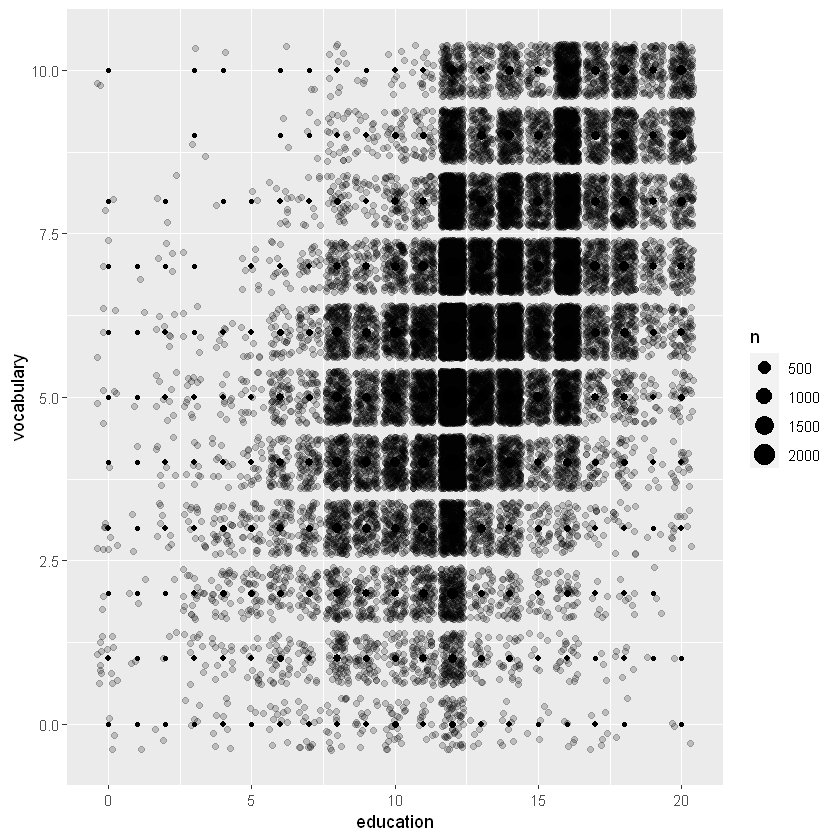

In [19]:
# Plot 1: Jittering only
p <- ggplot(Vocab, aes(x = education, y = vocabulary)) +
  geom_jitter(alpha = 0.2)

# Plot 2: Add stat_sum
p + stat_sum()
  # sum statistic

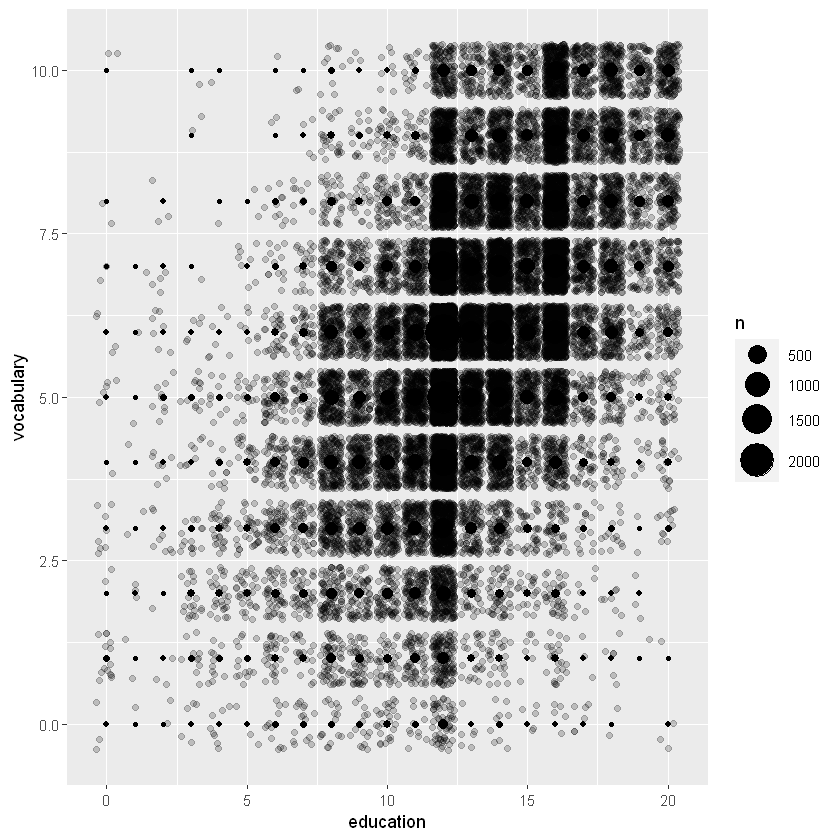

In [20]:
# Plot 3: Set size range
p + stat_sum() + scale_size(range = c(1, 10))

In [47]:
# Preparations
# Here we'll look at stat_summary() in action. We'll build up various plots one-by-one.
# 
# In this exercise we'll consider the preparations. That means we'll make sure the data is in the right format and that all 
# the positions that we might use in our plots are defined. Lastly, we'll set the base layer for our plot. 
# ggplot2 is already loaded, so you can get started straight away!
# 
# Instructions
# 
# Explore the structure of the mtcars dataset by executing str(mtcars).
# 
# In mtcars, cyl and am are classified as continuous, but they are actually categorical. 
# Previously we just used factor(), but here we'll modify the actual dataset. Change cyl and am to be categorical in the mtcars 
# data frame using as.factor.
# 
# Next we'll set three position objects with convenient names. This allows us to use the exact positions on multiple layers. 
# Create:
# posn.d, using position_dodge() with a width of 0.1,
# posn.jd, using position_jitterdodge() with a jitter.width of 0.1 and a dodge.width of 0.2
# posn.j, using position_jitter() with a width of 0.2.
# Finally, we'll make our base layers and store it in the object wt.cyl.am. Make the base call for ggplot mapping cyl to 
# the x, wt to y, am to both col and fill. Also set group = am inside aes(). The reason for these redundancies will become clear 
# later on.

In [21]:
# Display structure of mtcars
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [26]:
# Convert cyl and am to factors
mtcars$cyl <- as.factor(mtcars$cyl)
mtcars$am <- as.factor(mtcars$am)

# Define positions
posn.d <- position_dodge(0.1)
posn.jd <- position_jitterdodge(jitter.width = 0.1, dodge.width = 0.2)
posn.j <- position_jitter(0.2)

# Base layers
wt.cyl.am <- ggplot(mtcars, aes(x = cyl, 
                                y = wt, 
                                col = am, 
                                fill = am,
                                group = am))

In [51]:
# Plotting variations
# 
# Now that the preparation work is done, let's have a look at at stat_summary().
# 
# ggplot2 is already loaded, as is wt.cyl.am, which is defined as
# 
# wt.cyl.am <- ggplot(mtcars, aes(x = cyl,  y = wt, col = am, fill = am, group = am))
# Also all the position objects of the previous exercise, posn.d, posn.jd and posn.j, are available. For starters, 
# Plot 1 is already coded for you.
# 
# Instructions
# 
# Plot 2: Add a stat_summary() layer to wt.cyl.am and calculate the mean and standard deviation as we did in the video: 
# set fun.data to mean_sdl and specify fun.args to be list(mult = 1). Set the position argument to posn.d.
# 
# Plot 3: Repeat the previous plot, but use the 95% confidence interval instead of the standard deviation. 
# You can use mean_cl_normal instead of mean_sdl this time. There's no need to specify fun.args in this case. 
# Again, set position to posn.d.
# 
# The above plots were simple because they implicitly used a default geom, which is geom_pointrange(). 
# For Plot 4, fill in the blanks to calculate the mean and standard deviation separately with two stat_summary() functions:
# For the mean, use geom = "point" and set fun.y = mean. This time you should use fun.y because the point geom uses 
# the y aesthetic behind the scenes.
# Add error bars with another stat_summary() function. Set geom = "errorbar" to get the real "T" tips. Set fun.data = mean_sdl.

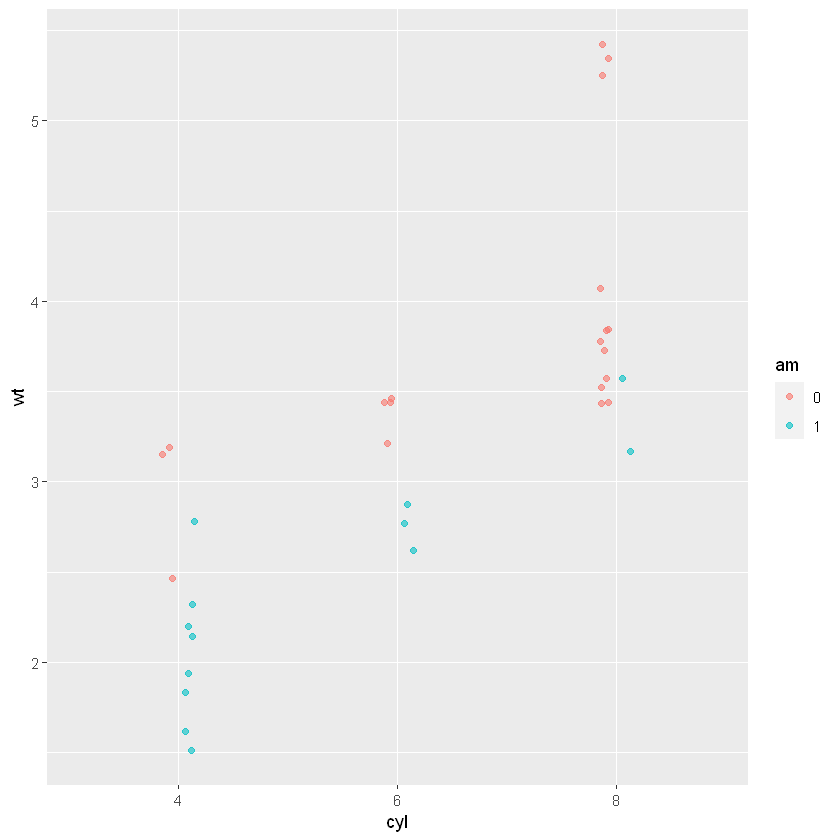

In [24]:
# wt.cyl.am, posn.d, posn.jd and posn.j are available

# Plot 1: Jittered, dodged scatter plot with transparent points
wt.cyl.am +
  geom_point(position = posn.jd, alpha = 0.6)

In [ ]:
 # Plot 2: Mean and SD - the easy way
wt.cyl.am + 
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), position = posn.d)

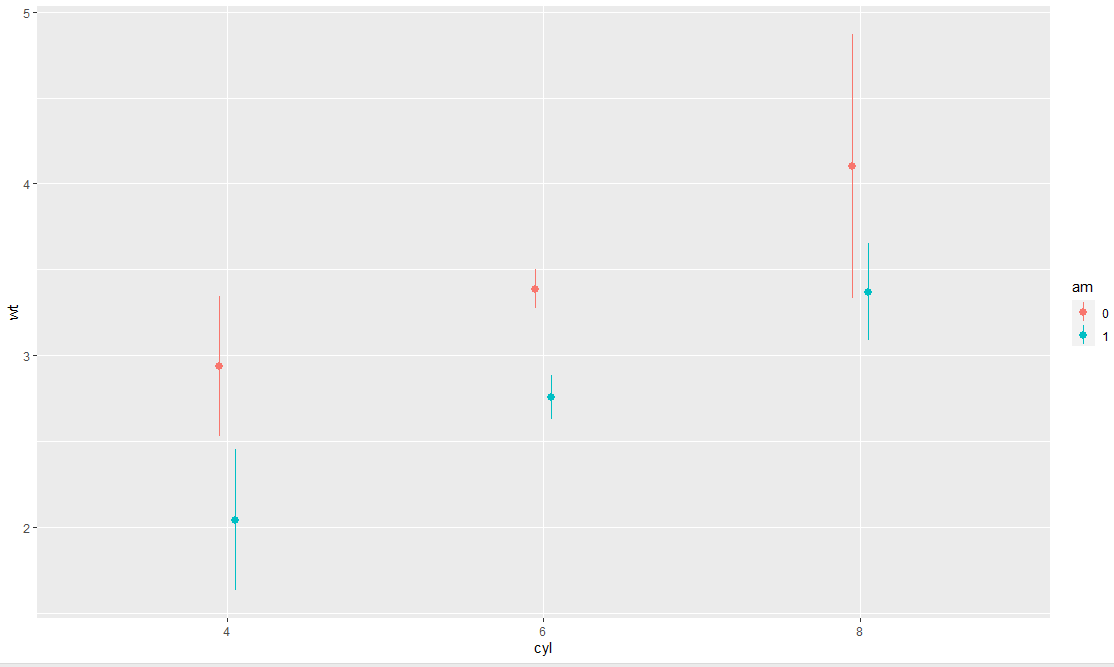

In [47]:
library("IRdisplay")
display_png(file="F:\\DATA_SCIENCE\\R-STUDIO\\DATACAMP IN R\\Data Visualization with ggplot2 (Part 2)\\ch1. Plot 2 Mean and SD - the easy way.png") 

In [ ]:
# Plot 3: Mean and 95% CI - the easy way
wt.cyl.am + 
  stat_summary(fun.data = mean_cl_normal, position = posn.d)


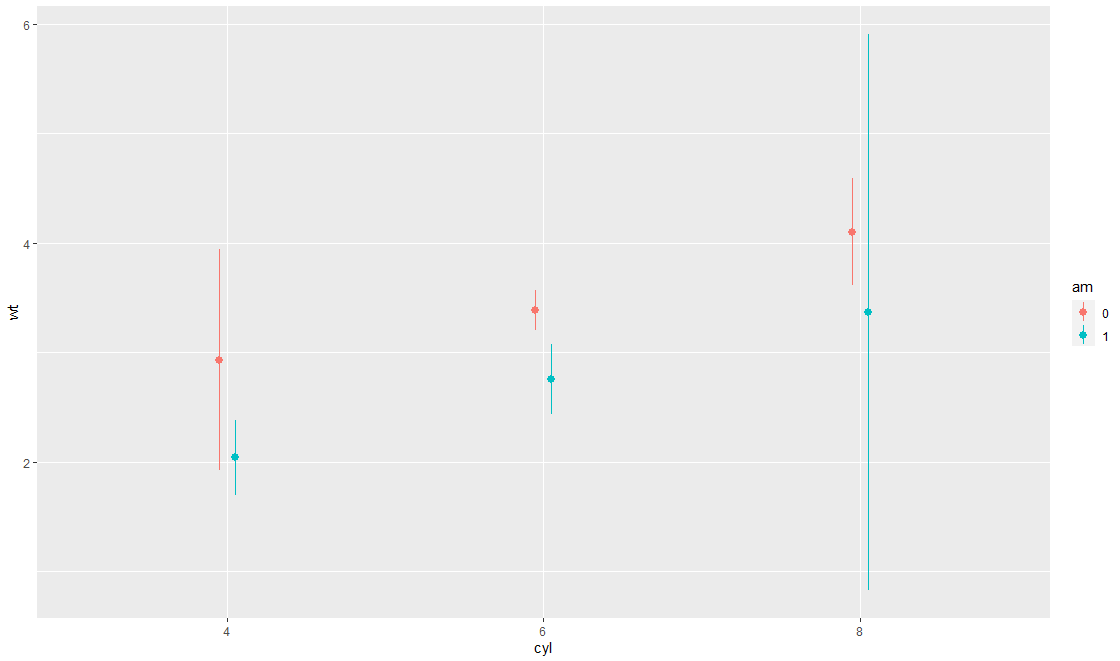

In [48]:
display_png(file="F:\\DATA_SCIENCE\\R-STUDIO\\DATACAMP IN R\\Data Visualization with ggplot2 (Part 2)\\ch1. Plot 3 Mean and 95% CI - the easy way.png") 

In [ ]:
# Plot 4: Mean and SD - with T-tipped error bars - fill in ___
wt.cyl.am +
  stat_summary(geom = "point", fun.y = mean, 
               position = posn.d) +
  stat_summary(geom = "errorbar", fun.data = mean_sdl, 
               position = posn.d, fun.args = list(mult = 1), width = 0.1)

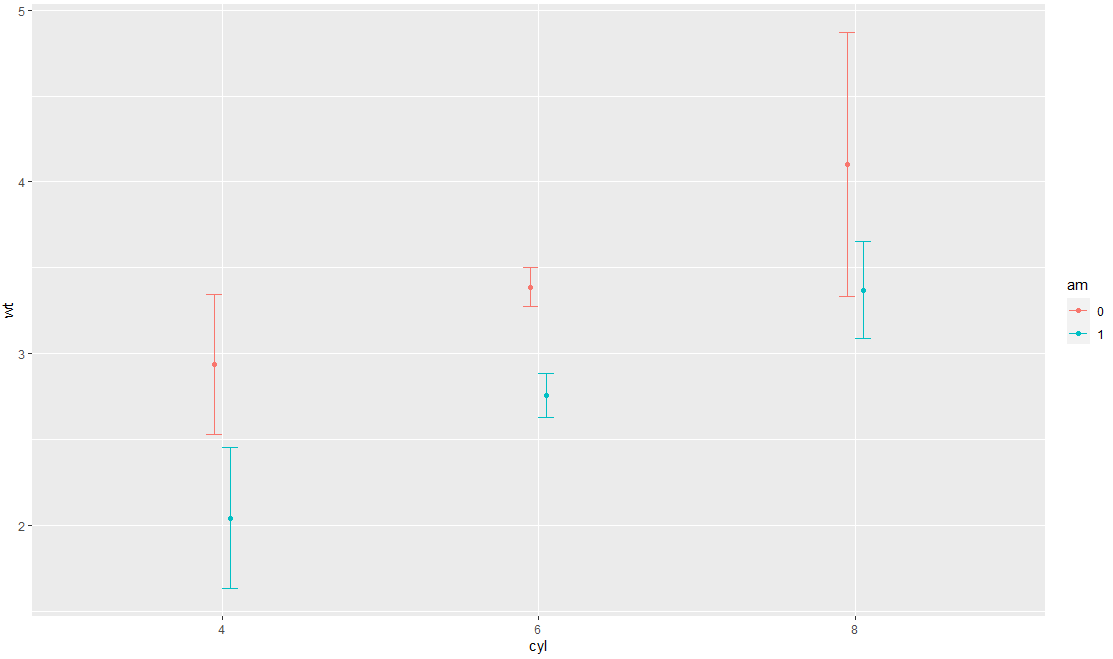

In [49]:
display_png(file="F:\\DATA_SCIENCE\\R-STUDIO\\DATACAMP IN R\\Data Visualization with ggplot2 (Part 2)\\ch1. Plot 4 Mean and SD - with T-tipped error bars.png") 

In [ ]:
# Custom Functions
# In the video we saw that the only difference between ggplot2::mean_sdl() and Hmisc::smean.sdl() is the naming convention. 
# In order to use the results of a function directly in ggplot2 we need to ensure that the names of the variables match 
# the aesthetics needed for our respective geoms.
# 
# Here we'll create two new functions in order to create the plot shown in the viewer. One function will measure 
# the full range of the dataset and the other will measure the interquartile range.
# 
# A play vector, xx, has been created for you. Execute
# 
# mean_sdl(xx, mult = 1)
# in the R Console and consider the format of the output. You'll have to produce functions which return similar outputs.
# 
# Instructions
#
# First, change the arguments ymin and ymax inside the data.frame() call of gg_range().
# 
# ymin should be the minimum of x
# 
# ymax should be the maximum of x
# 
# Use min() and max(). Watch out, naming is important here. gg_range(xx) should now generate the required output.
# 
# Next, change the arguments y, ymin and ymax inside the data.frame() call of med_IQR().
# 
# y should be the median of x
# 
# ymin should be the first quartile
# 
# ymax should be the 3rd quartile.
# 
# You should use median() and quantile(). For example, quantile() can be used as follows to give 
# the first quartile: quantile(x)[2]. med_IQR(xx) should now generate the required output.

In [59]:
# Play vector xx is available
xx <- 1:100

mean_sdl(xx, mult = 1)

ERROR: Error: Hmisc package required for this function


In [ ]:
# Play vector xx is available

# Function to save range for use in ggplot: 
gg_range <- function(x) {
  # Change x below to return the instructed values
  data.frame(ymin = min(x), # Min
             ymax = max(x)) # Max
}

gg_range(xx)
# Required output:
#   ymin ymax
# 1    1  100

# Function to Custom function:
med_IQR <- function(x) {
  # Change x below to return the instructed values
  data.frame(y =  median(x), # Median
             ymin = quantile(x)[2], # 1st quartile
             ymax = quantile(x)[4])  # 3rd quartile
}

med_IQR(xx)
# Required output:
#        y  ymin  ymax
# 25% 50.5 25.75 75.25

In [60]:
# Custom Functions (2)
# In the last exercise we created functions that will allow us to plot the so-called five-number summary 
# (the minimum, 1st quartile, median, 3rd quartile, and the maximum). Here, we'll implement that into a unique plot type.
# 
# All the functions and objects from the previous exercise are available including the updated mtcars data frame, 
# the position object posn.d, the base layers wt.cyl.am and the functions med_IQR() and gg_range().
# 
# The plot you'll end up with at the end of this exercise is shown on the right. When using stat_summary() recall that 
# the fun.data argument requires a properly labelled 3-element long vector, which we saw in the previous exercises. 
# The fun.y argument requires only a 1-element long vector.
# 
# Instructions
# 
# Complete the given stat_summary() functions, don't change the predefined arguments:
# 
# The first stat_summary() layer should have geom set to "linerange". fun.data argument should be set to med_IQR, 
# the function you used in the previous exercise.
# The second stat_summary() layer also uses the "linerange" geom. This time fun.data should be gg_range, the other function
# you created. Also set alpha = 0.4.
# For the last stat_summary() layer, use geom = "point". The points should have col "black" and shape "X".

In [ ]:
# The base ggplot command, you don't have to change this
# See Ch1 XX Plot 2
wt.cyl.am <- ggplot(mtcars, aes(x = cyl,y = wt, col = am, fill = am, group = am))

# Add three stat_summary calls to wt.cyl.am
wt.cyl.am + 
  stat_summary(geom = "linerange", fun.data = med_IQR, 
               position = posn.d, size = 3) +
  stat_summary(geom = "linerange", fun.data = gg_range, 
               position = posn.d, size = 3, 
               alpha = 0.4) +
  stat_summary(geom = "point", fun.y = median, 
               position = posn.d, size = 3, 
               col = "black", shape = "X")

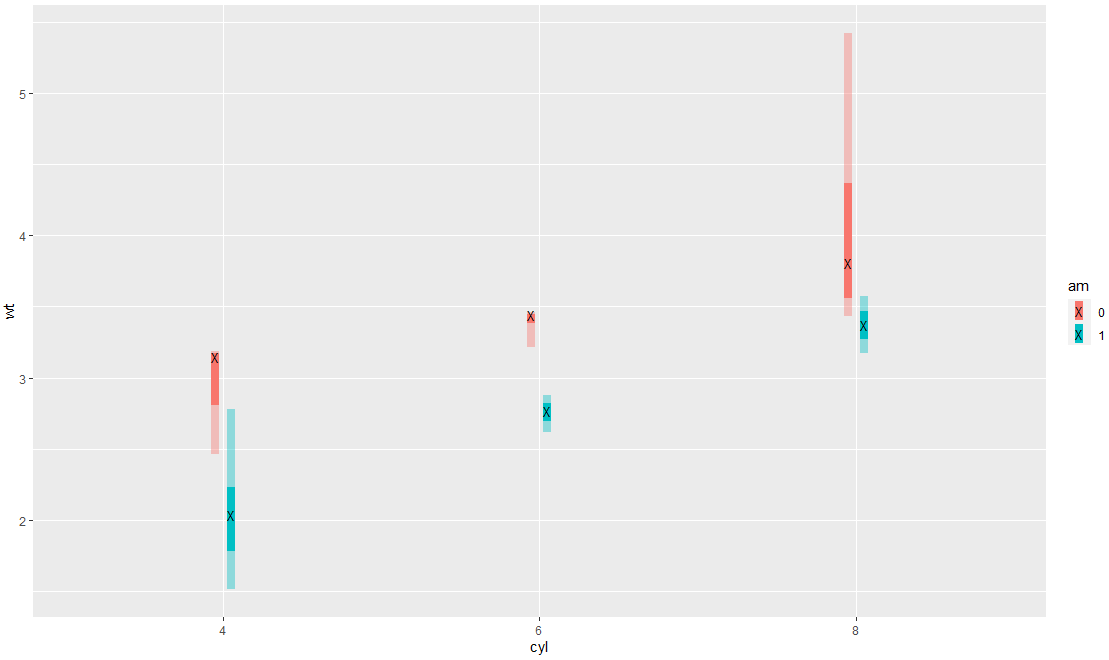

In [61]:
display_png(file="F:\\DATA_SCIENCE\\R-STUDIO\\DATACAMP IN R\\Data Visualization with ggplot2 (Part 2)\\ch1. Custom Functions (2).png") 

# 2. Coordinates and Facets

The Coordinates and Facets layers offer specific and very useful tools for efficiently and accurately communicating data. In this chapter we’ll look at the various ways of effectively using these two layers.

In [ ]:
# Zooming In
# In the video, you saw different ways of using the coordinates layer to zoom in. In this exercise, 
# we'll compare some of the techniques again.
# 
# As usual, you'll be working with the mtcars dataset, which is already cleaned up for you (cyl and am are categorical variables).
# Also p, a ggplot object you coded in the previous chapter, is already available. Execute p in the console to check it out.
# 
# Instructions
# 
# Extend p with a scale_x_continuous() with limits = c(3, 6) and expand = c(0, 0). What do you see?
# Try again, this time with coord_cartesian(): Set the xlim argument equal to c(3, 6). Compare the two plots.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


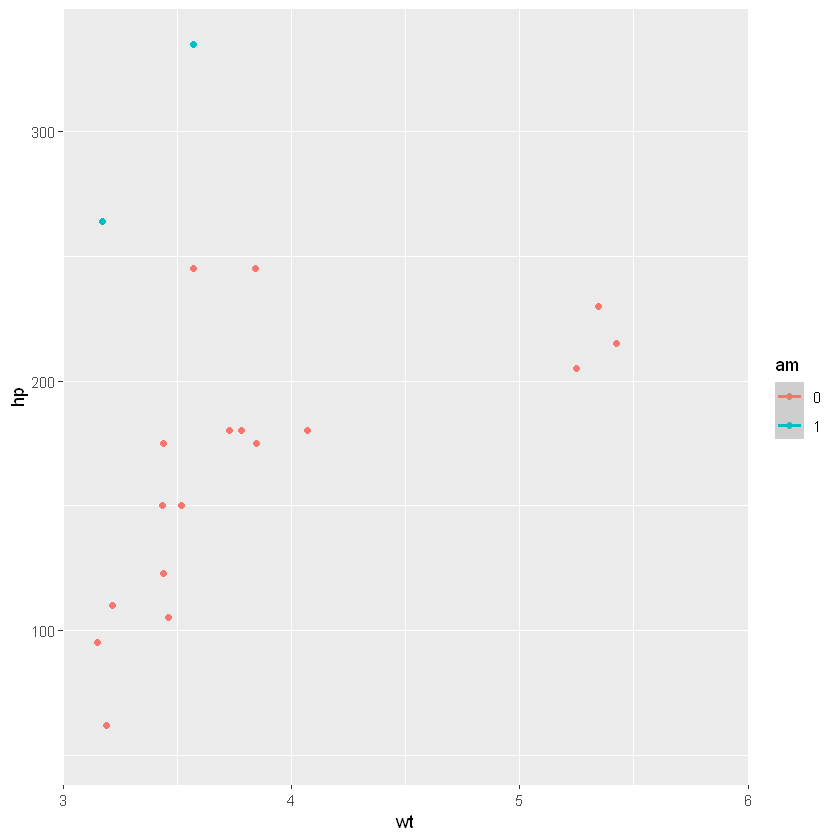

In [62]:
# Basic ggplot() command, coded for you
p <- ggplot(mtcars, aes(x = wt, y = hp, col = am)) + geom_point() + geom_smooth()

# Add scale_x_continuous
## The wrong way to zoom in. You lose data and the stats will dissapear or be incorrect.
p + scale_x_continuous(limits = c(3,6), expand = c(0,0))

In [ ]:
# Aspect Ratio
# We can set the aspect ratio of a plot with coord_fixed() or coord_equal(). Both use ratio = 1 as a default. 
# A 1:1 aspect ratio is most appropriate when two continuous variables are on the same scale, as with the iris dataset.
# 
# All variables are measured in centimeters, so it only makes sense that one unit on the plot should be 
# the same physical distance on each axis. This gives a more truthful depiction of the relationship between 
# the two variables since the aspect ratio can change the angle of our smoothing line. 
# This would give an erroneous impression of the data.
# 
# Of course the underlying linear models don't change, but our perception can be influenced by the angle drawn.
# 
# Instructions
# 
# Complete the basic scatter plot function using the iris data frame to plot Sepal.Width onto the y aesthetic, 
# Sepal.Length onto the x and Species onto col. You should understand all the other functions used in this plot call by now.
# This is saved in an object called base.plot.
# Write base.plot on a new line to print it out. Examine it: the plot is drawn to the dimensions of the graphics device.
# Add a coord_equal() layer to force a 1:1 aspect ratio.

`geom_smooth()` using formula 'y ~ x'


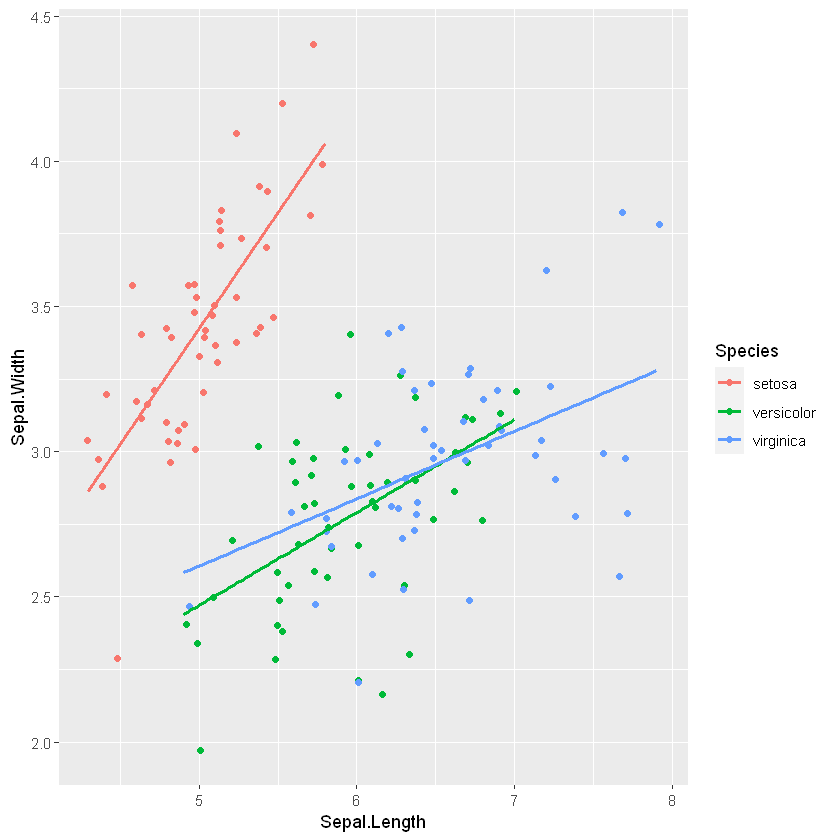

In [63]:
# Complete basic scatter plot function
base.plot <- ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, col = Species)) +
               geom_jitter() +
               geom_smooth(method = "lm", se = F)

# Plot base.plot: default aspect ratio
base.plot

`geom_smooth()` using formula 'y ~ x'


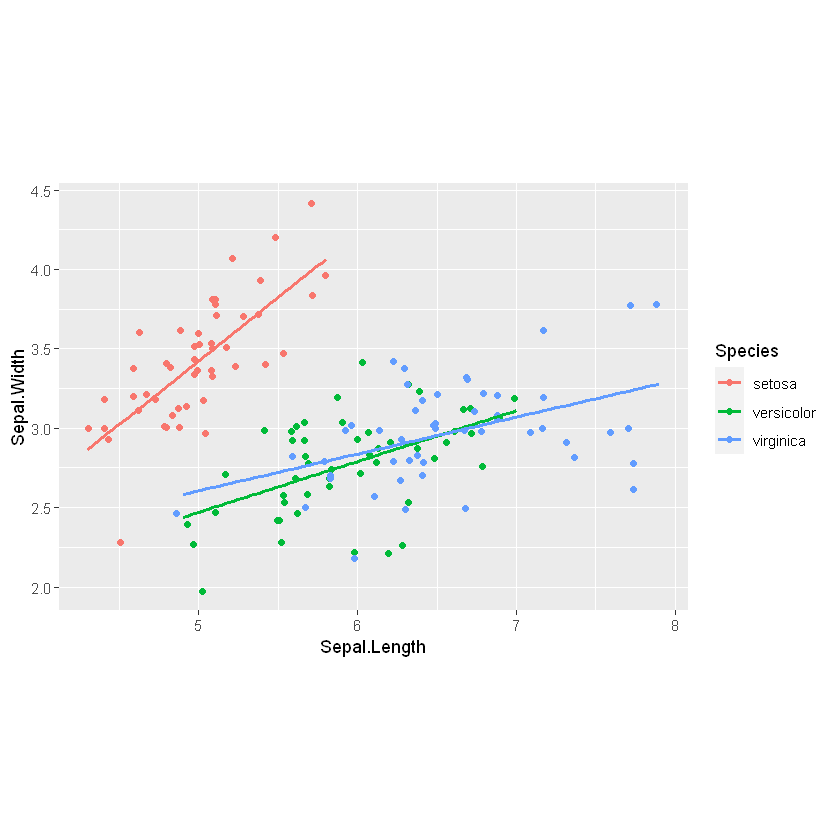

In [64]:
# Fix aspect ratio (1:1) of base.plot
base.plot + coord_equal()

In [ ]:
# Pie Charts
# The coord_polar() function converts a planar x-y Cartesian plot to polar coordinates. This can be useful if you are producing 
# pie charts.
# 
# We can imagine two forms for pie charts - the typical filled circle, or a colored ring.
# 
# As an example, consider the stacked bar chart shown in the viewer. Imagine that we just take the y axis on the left and
# bend it until it loops back on itself, while expanding the right side as we go along. We'd end up with a pie chart - 
# it's simply a bar chart transformed onto a polar coordinate system.
# 
# Typical pie charts omit all of the non-data ink, which we'll learn about in the next chapter. Pie charts are not really better 
# than stacked bar charts, but we'll come back to this point in the fourth chapter on best practices.
# 
# The mtcars data frame is available, with cyl converted to a factor for you.
# 
# Instructions
# 
# Create a basic stacked bar plot. Since we have univariate data and stat_bin() requires an x aesthetic, we'll have to use a 
# dummy variable. Set x to 1 and map cyl onto fill. Assign the bar plot to wide.bar.
# Add a coord_polar() layer to wide.bar. Set the argument theta to "y". This specifies the axis which would be transformed 
# to polar coordinates.
# Repeat the code for the stacked bar plot, but this time:
# Set the width argument inside the geom_bar() function to 0.1 and
# Use scale_x_continuous() to set the limits argument to c(0.5,1.5)). These two steps will add empty space aroung the bar on 
# the x axis.
# Assign this plot to thin.bar.
# Add a coord_polar() layer to thin.bar, as you did before. There's a ring structure instead of a pie!

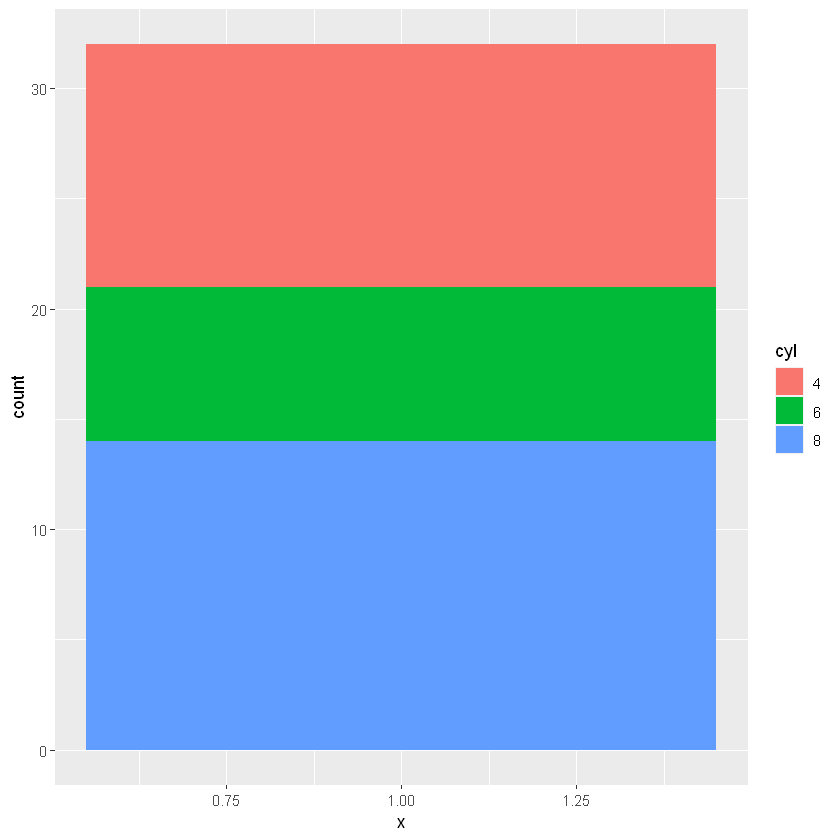

In [65]:
# Create stacked bar plot: thin.bar
thin.bar <- ggplot(mtcars, aes(x = 1, fill = cyl)) +
              geom_bar()

thin.bar

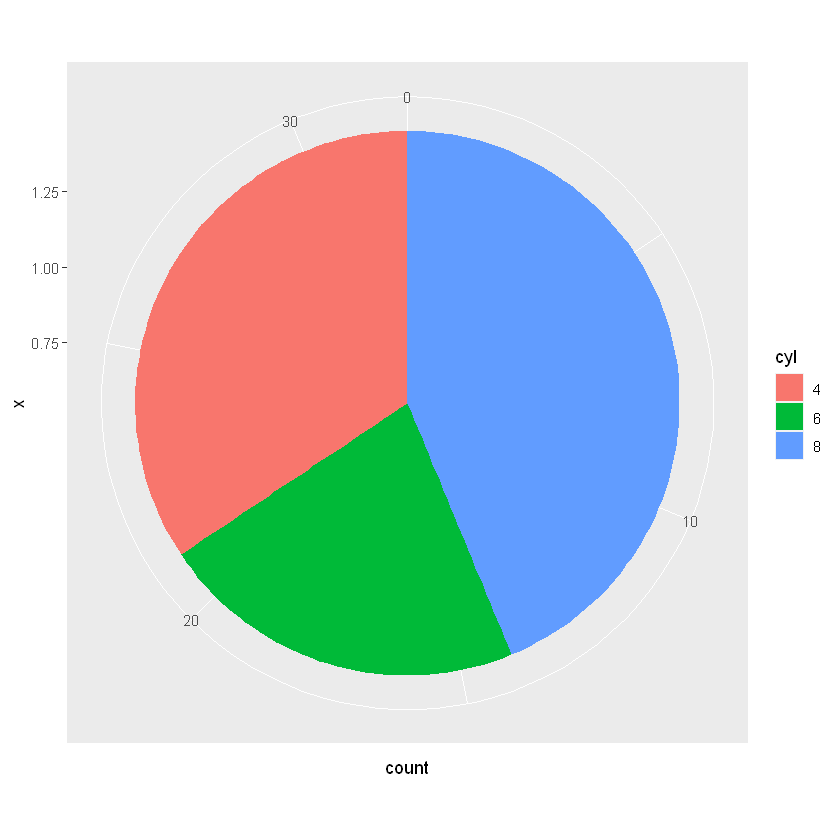

In [66]:
# Convert thin.bar to pie chart
thin.bar + coord_polar(theta = "y")

In [ ]:
# Facets: the basics
# The most straightforward way of using facets is facet_grid(). Here we just need to specify the categorical variable 
#to use on rows and columns using standard R formula notation (rows ~ columns).
#
#Notice that we can also take advantage of ordinal variables by positioning them in the correct order as columns or rows, 
#as is the case with the number of cylinders. Get some hands-on practice in this exercise; ggplot2 is already loaded for you 
#and mtcars is available. The variables cyl and am are factors. However, this is not necessary for facets; ggplot2 will coerce
#variables to factors in this case.
#
#Instructions
#
#Starting from the basic scatter plot, use facet_grid() and the formula notation to facet the plot in three different ways:
#
#1 - Rows by am.
#2 - Columns by cyl.
#3 - Rows and columns by am and cyl.
#Remember, when faceting in only one direction us . to specify nothing for the unused direction.

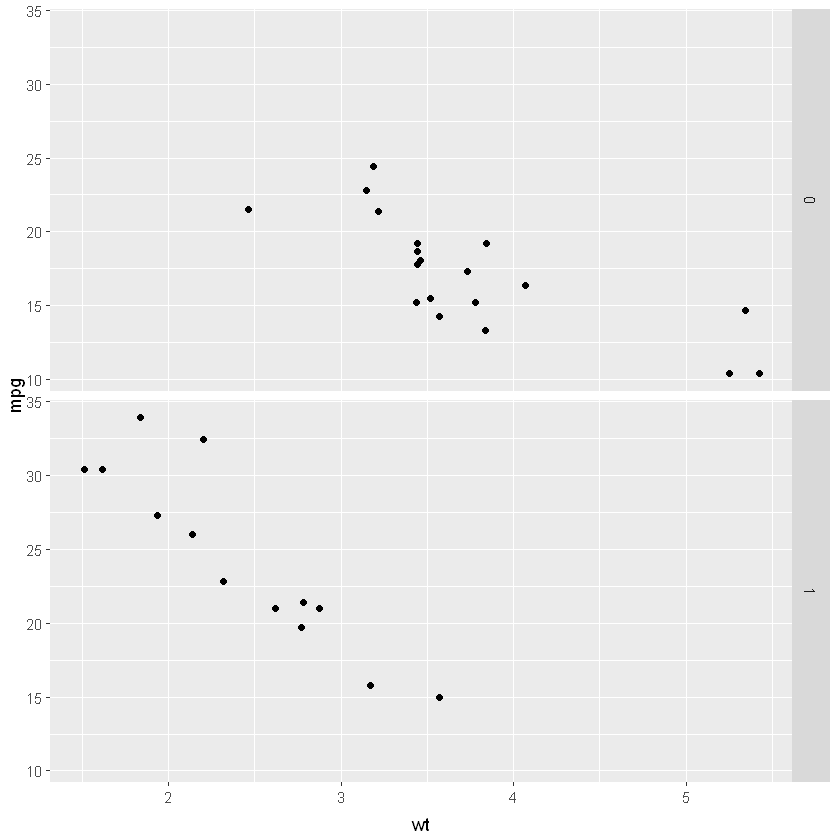

In [67]:
# Basic scatter plot:
p <- ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()

# Separate rows according to transmission type, am
p + facet_grid(am ~ .)

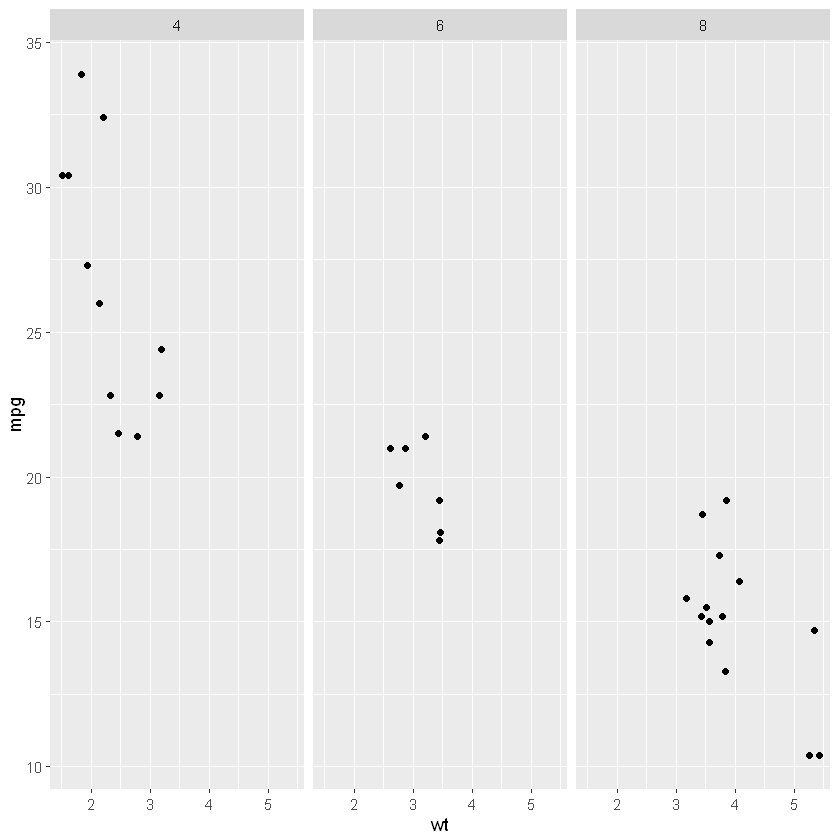

In [68]:
# Separate columns according to cylinders, cyl
p + facet_grid(. ~ cyl)

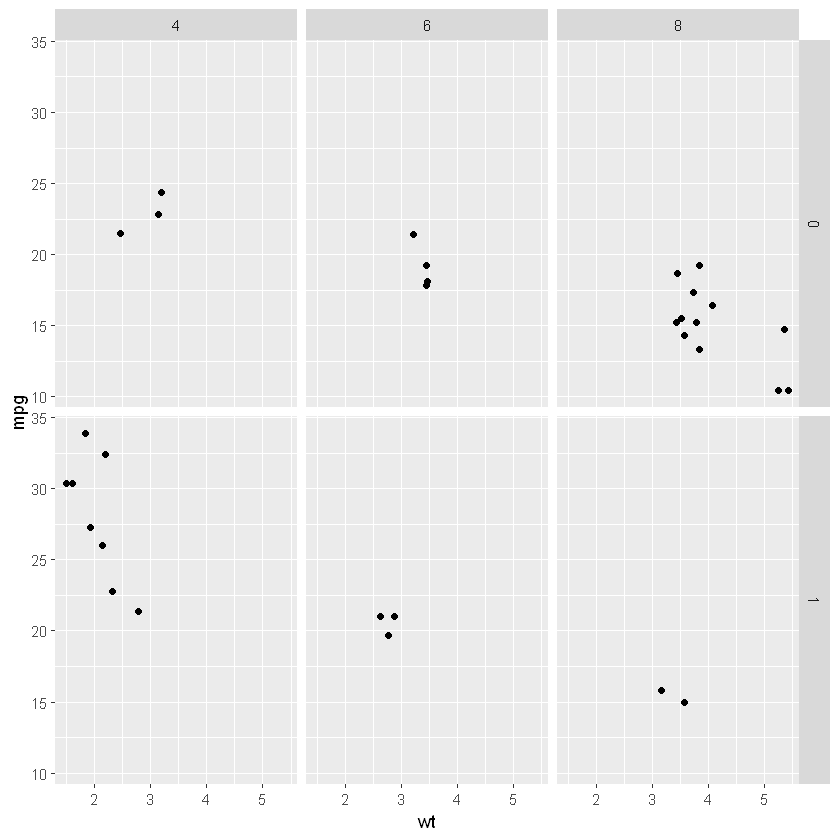

In [69]:
# Separate by both columns and rows 
p + facet_grid(am ~ cyl)

In [ ]:
# Many variables
# Facets are another way of presenting categorical variables. Recall that we saw all the ways of combining variables, 
# both categorical and continuous, in the aesthetics chapter. Sometimes it's possible to overdo it. Here we'll present a plot
# with 6 variables and see if we can add even more.
# 
# Let's begin by using a trick to map two variables onto two color scales - hue and lightness. We combine cyl and am into a 
# single variable cyl_am. To accommodate this we also make a new color palette with alternating red and blue of increasing
# darkness. This is saved as myCol. If you are not familiar with these steps, execute the code piece-by-piece.
# 
# Instructions
# 
# 1 - Beginning with the basic scatter plot:
# 
# Add a col aesthetic for cyl_am inside the existing aes() function.
# 
# Add a scale_color_manual() layer using the vector myCol for the values argument.
# 
# 2 - Copy your scatter plot code from the previous instruction.
# 
# Add a facet_grid() layer, facetting the plot according to gear on rows and vs on columns (0 is a V-engine and 1 is a straight
# engine).
# 
# Now we have 6 variables in total (4 categorical variables and 2 continuous variables). The plot is still readable, 
# but it's starting to get difficult.
# 
# 3 - Try to add one more variable, using size. Map disp, the displacement volume from each cylinder, onto the size aesthetic 
# inside the existing aes() function.

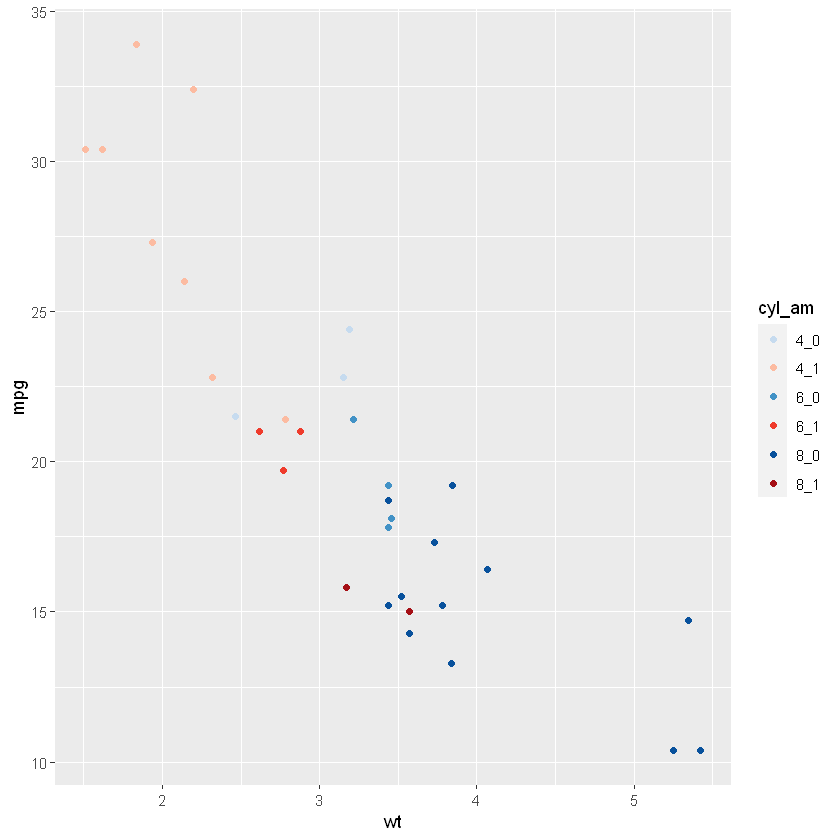

In [70]:
# Code to create the cyl_am col and myCol vector
mtcars$cyl_am <- paste(mtcars$cyl, mtcars$am, sep = "_")

myCol <- rbind(brewer.pal(9, "Blues")[c(3,6,8)],
               brewer.pal(9, "Reds")[c(3,6,8)])

# Basic scatter plot, add color scale:
ggplot(mtcars, aes(x = wt, y = mpg, col = cyl_am)) +
  geom_point() + 
  scale_color_manual(values = myCol)

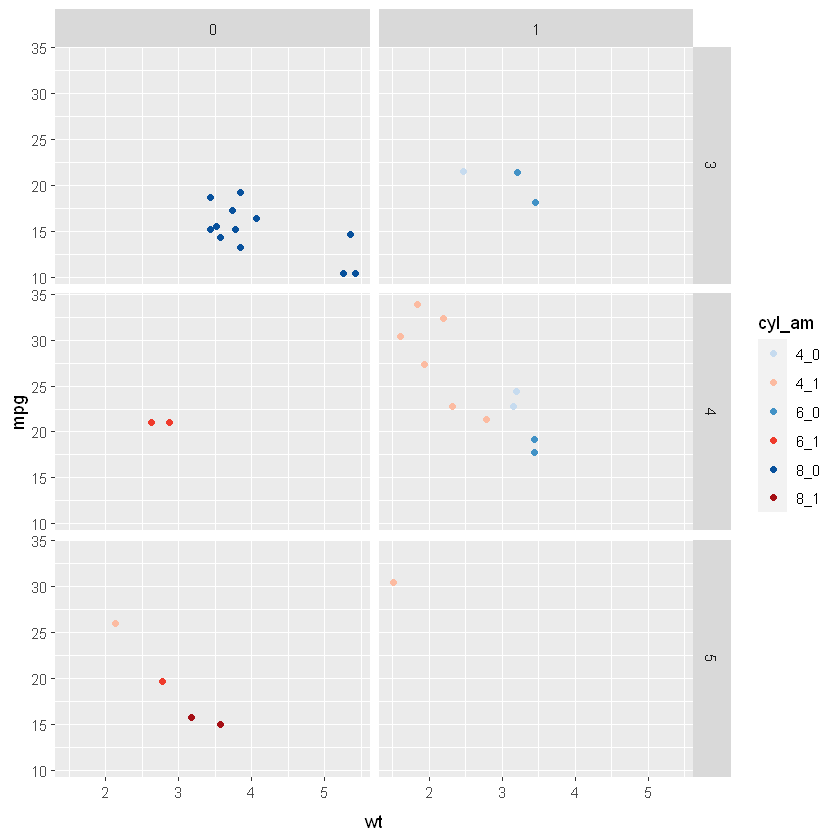

In [71]:
# Facet according on rows and columns.
ggplot(mtcars, aes(x = wt, y = mpg, col = cyl_am)) +
  geom_point() + 
  scale_color_manual(values = myCol) + 
  facet_grid(gear ~ vs)

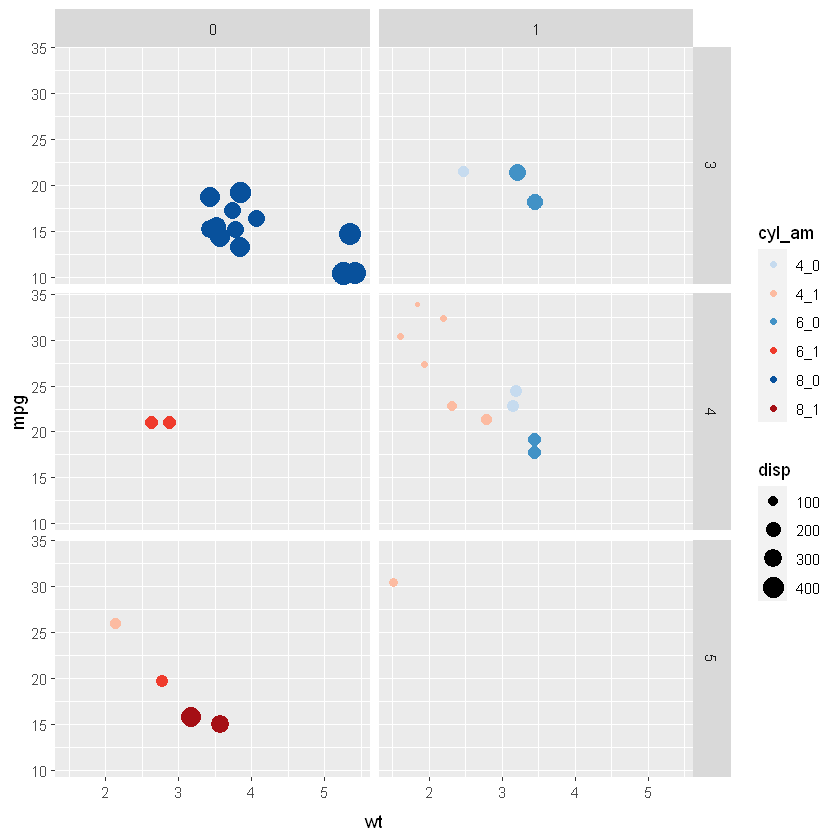

In [72]:
# Add more variables
ggplot(mtcars, aes(x = wt, y = mpg, col = cyl_am, size = disp)) +
  geom_point() + 
  scale_color_manual(values = myCol) + 
  facet_grid(gear ~ vs)

In [ ]:
# Dropping levels
# When you have a categorical variable with many levels which are not all present in each sub-group of another variable, 
# it may be desirable to drop the unused levels. As an example let's return to the mammalian sleep dataset, mamsleep. 
# It is available in your workspace.
# 
# The variables of interest here are name, which contains the full popular name of each animal, and vore, the eating behavior. 
# Each animal can only be classified under one eating habit, so if we facet according to vore, we don't need to repeat the full 
# list in each sub-plot.
# 
# Instructions
# 
# A basic plot, object p, is defined for you. time is mapped onto the x, name onto the y and sleep onto the col aesthetics.
# To see the plot execute p.
# Facet p by rows according to vore. If you look at the resulting plot, you'll notice that there are a lot of lines 
# where no data is available.
# Extend facet_grid with scale = "free_y" and space = "free_y" to leave out rows for which there is no data.

In [120]:
as.data.frame(data(msleep))

data(msleep)
msleep


In [112]:
colnames(mamsleep)<- c('vore', 'name','time')

In [135]:
mamsleep$sleep <- ifelse(mamsleep$time >=7, "total", "rem")
mamsleep$sleep <- as.factor(mamsleep$sleep)
class(mamsleep$sleep)


[1] "factor"

In [136]:
head(mamsleep)

vore,name,time,sleep
carni,Cheetah,12.1,total
omni,Owl monkey,17.0,total
herbi,Mountain beaver,14.4,total
omni,Greater short-tailed shrew,14.9,total
herbi,Cow,4.0,rem
herbi,Three-toed sloth,14.4,total


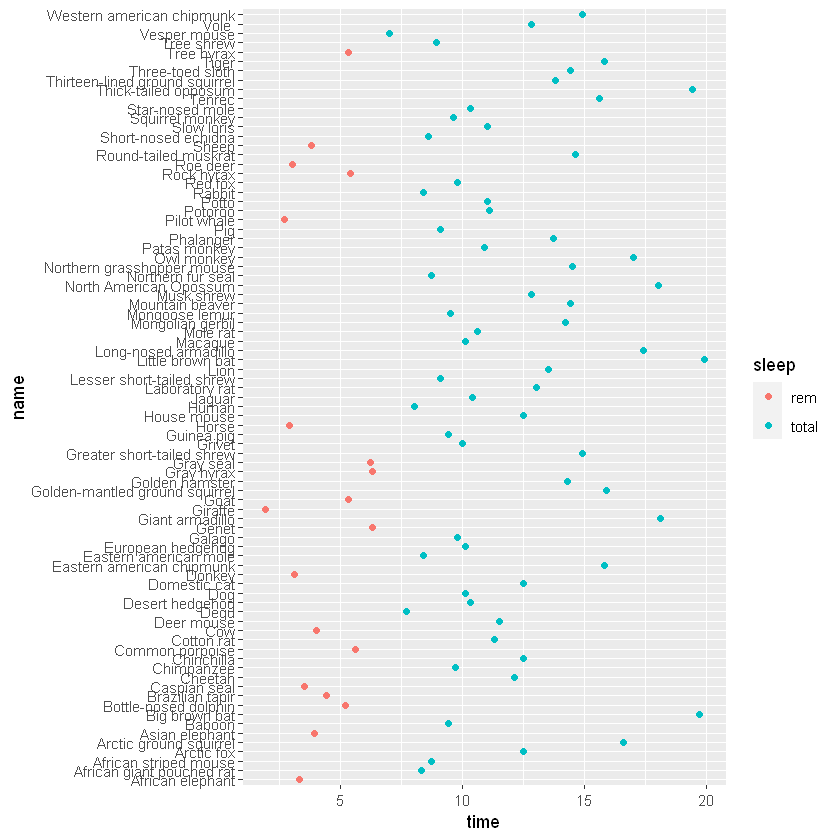

In [137]:
# Basic scatter plot
ggplot(mamsleep, aes(time, name, col = sleep)) +
  geom_point()

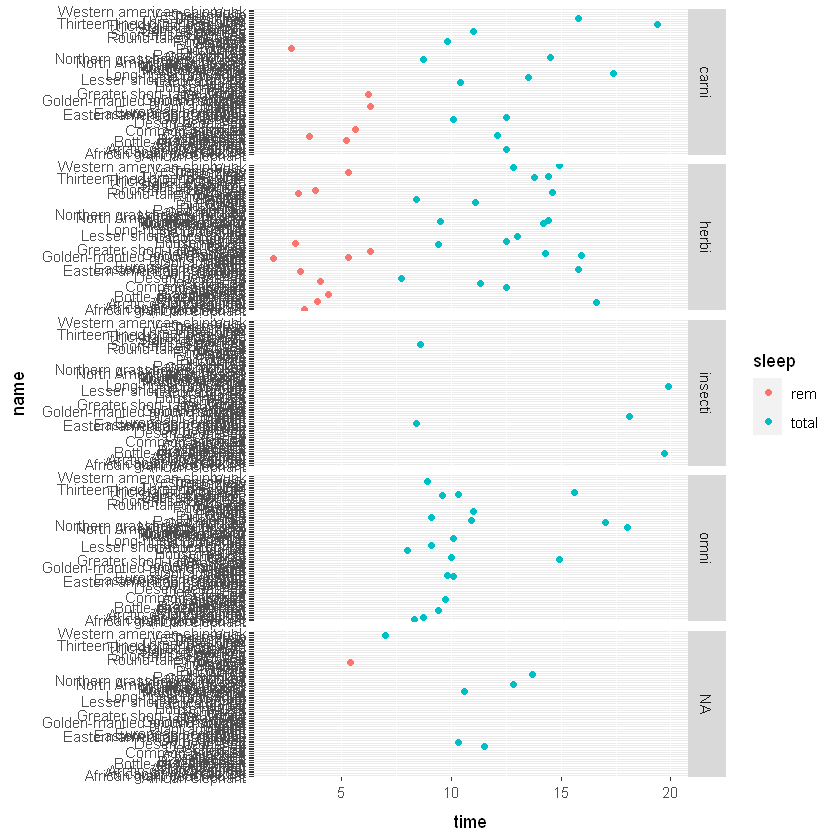

In [138]:
# Facet rows accoding to vore
ggplot(mamsleep, aes(time, name, col = sleep)) +
  geom_point() + 
  facet_grid(vore ~ .)

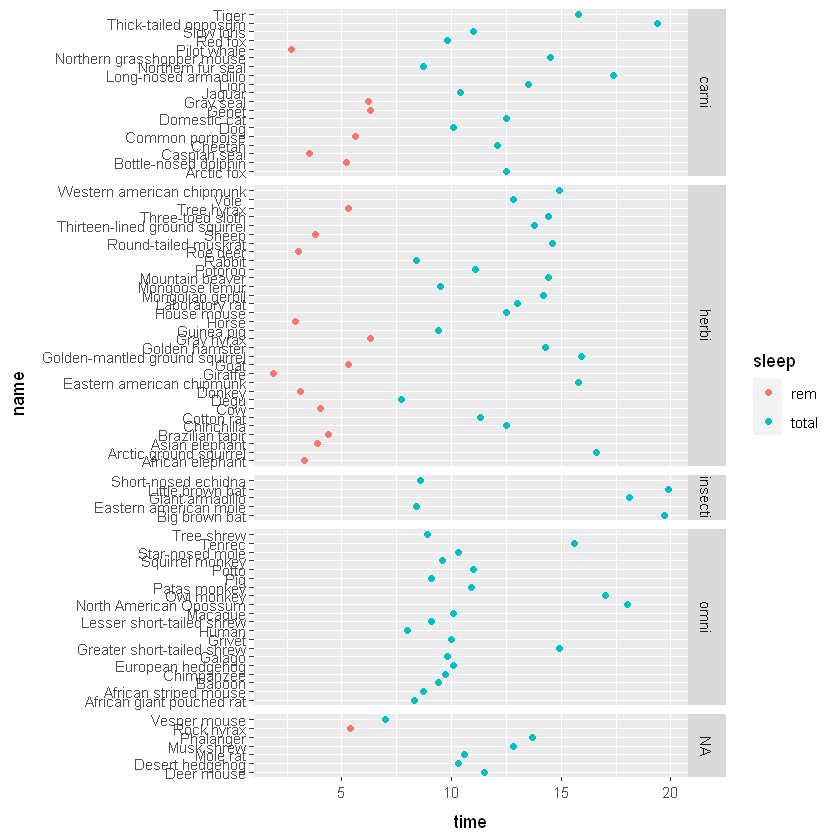

In [139]:
# Specify scale and space arguments to free up rows
ggplot(mamsleep, aes(time, name, col = sleep)) +
  geom_point() + 
  facet_grid(vore ~ ., scale = "free_y", space = "free_y")

# 3. Themes

Now that you’ve built high-quality plots, it’s time to make them pretty. This is the last step in the data viz process. The Themes layer will enable you to make publication quality plots directly in R.

In [140]:
# Rectangles
# To understand all the arguments for the themes, you'll modify an existing plot over the next series of exercises.
# 
# Here you'll focus on the rectangles of the plotting object z that has already been created for you. If you type z in 
# the console, you can check it out. The goal is to turn z into the plot in the viewer. Do this by following the instructions 
# step by step.
# 
# Instructions
# 
# Plot 1: In the theme() function added to z, set the plot.background argument to element_rect(fill = myPink). myPink is 
# already available in the workspace for you.
# Plot 2: Expand your code for Plot 1 by adding a border to the plot.background. Do this by adding 2 arguments to the 
# element_rect() function in theme(): color and size. Set them to "black" and 3, respectively.
# Plot 3: we don't want the plot panels and legend to appear as they are in Plot 2. A short cut is to remove all rectangles, 
# as defined in the theme object no_panels, and then draw the one we way in the way we want. Copy your theme() layer 
# from Plot 2 and add it to no_panels.

`geom_smooth()` using formula 'y ~ x'


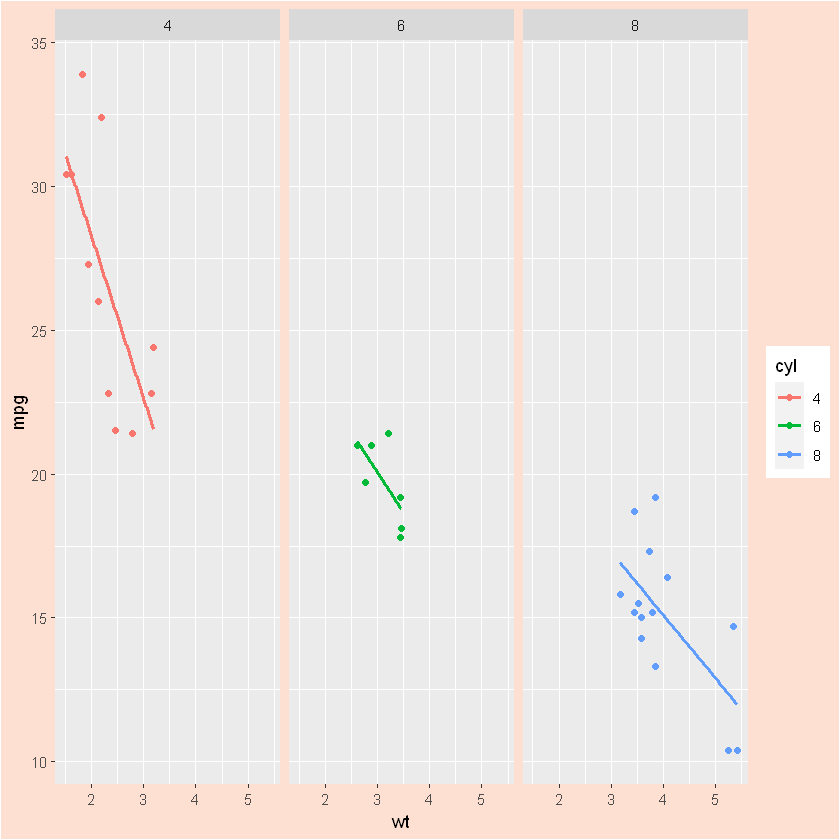

In [141]:
# Starting point
z <- ggplot(mtcars, aes(wt, mpg, col = cyl)) + 
  geom_point() + 
  stat_smooth(method = "lm", se = F) + 
  facet_grid(. ~ cyl)
myPink <- "#FEE0D2"

# Plot 1: change the plot background color to myPink:
z + theme(
  plot.background = element_rect(fill = myPink))

`geom_smooth()` using formula 'y ~ x'


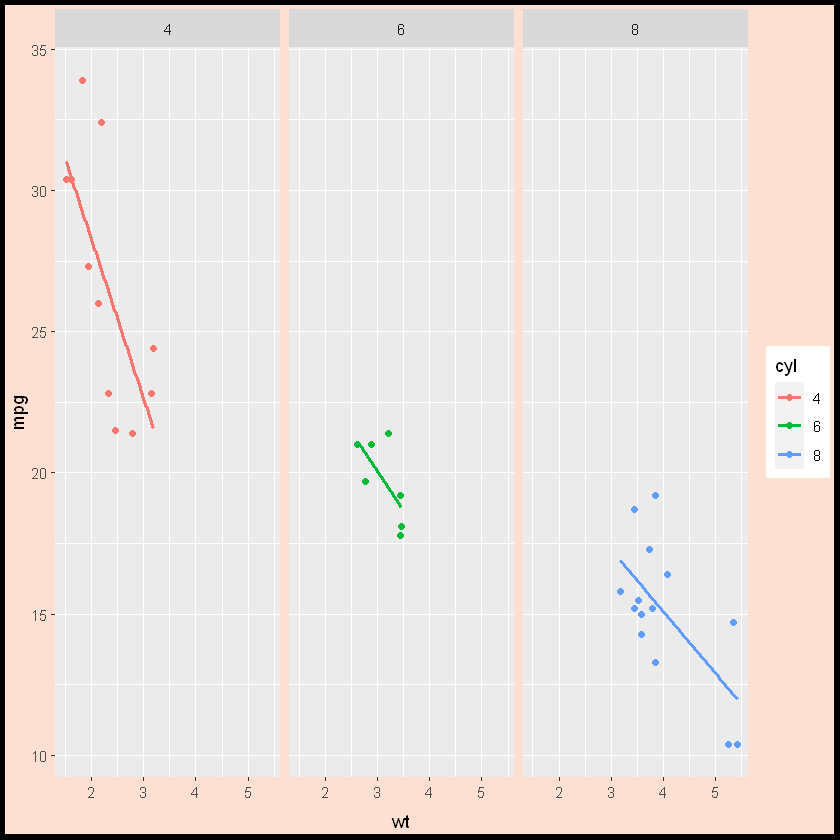

In [142]:
# Plot 2: adjust the border to be a black line of size 3
z + theme(
  plot.background = element_rect(
    fill = myPink, 
    color = "black",
    size = 3))

`geom_smooth()` using formula 'y ~ x'


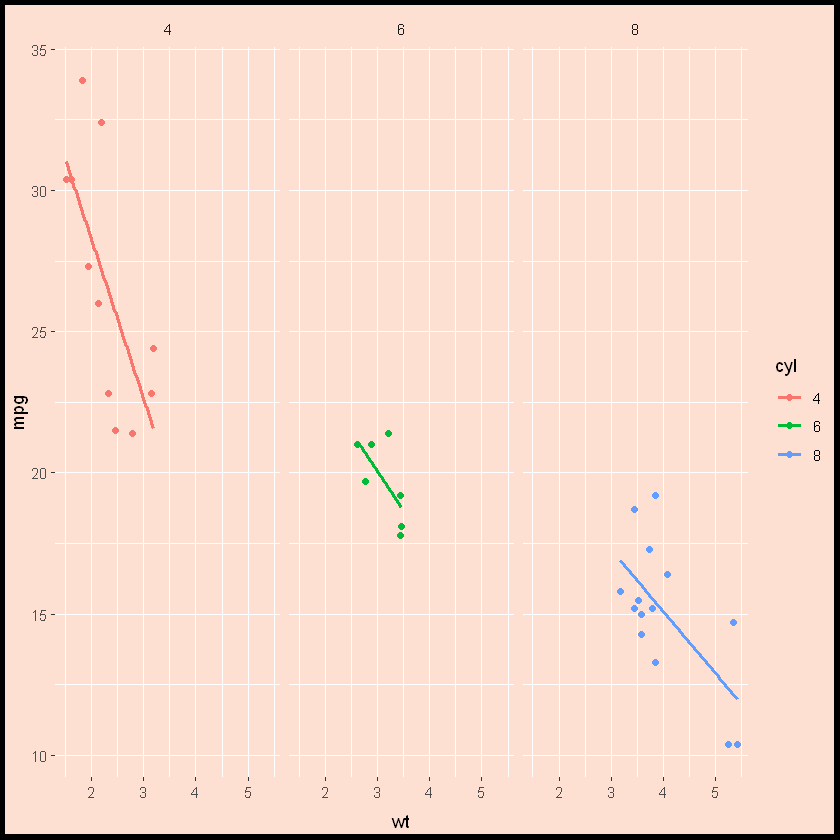

In [144]:
# Theme to remove all rectangles
no_panels <- theme(panel.background = element_blank(), 
                        legend.key = element_blank(), 
                        legend.background=element_blank(), 
                        strip.background = element_blank())
z <- z + 
  theme(
    plot.background = element_rect(
      fill = myPink, 
      color = "black",
      size = 3)) +
      no_panels
z

In [145]:
# Lines
# To change the appearance of lines use the element_line() function.
# 
# The plot you created in the last exercise, with the fancy pink background, is available as the plotting object z. 
# Your goal is to produce the plot in the viewer - no grid lines, but red axes and tick marks.
# 
# For each of the arguments that specify lines, use element_line() to modify attributes. e.g. element_line(color = "red").
# 
# Remember, to remove a non-data element, use element_blank().
# 
# Instructions
# 
# Starting with object z, add a theme() function to:
# 
# remove the grid lines using the panel.grid argument.
# add red axis lines using the axis.line argument.
# change the tick marks to red using the axis.ticks argument, similar to how you specified axis.line.

`geom_smooth()` using formula 'y ~ x'


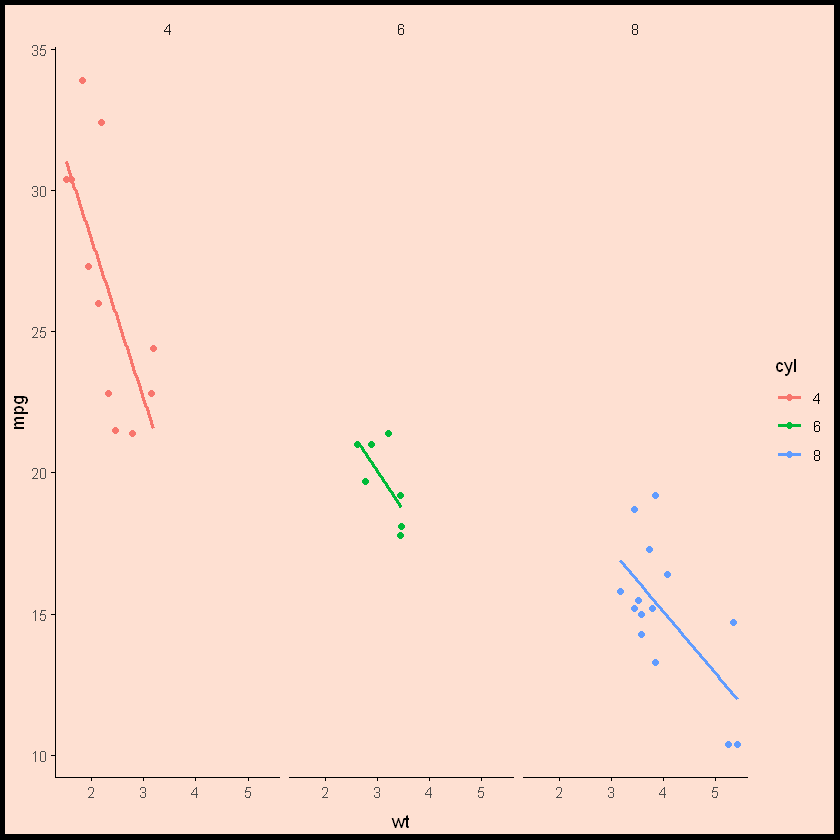

In [146]:
z <- z + theme(
  panel.grid = element_blank(),
  axis.line = element_line(color = "black"),
  axis.ticks = element_line(color = "black")
  )
z

In [147]:
# Text
# Next we can make the text on your plot prettier and easier to spot. You can do this through the element_text() 
# function and by passing the appropriate arguments inside the theme() function.
# 
# As before, the plot you've created in the previous exercise is available as z. The plot you should end up with after 
# successfully completing this exercises is shown in the viewer.
# 
# Instructions
# 
# Starting from z, add a theme() function to:
# 
# Change the appearance of the strip text, that is the text in the facet strips. Specify strip.text with element_text(). 
# The size of the text should be 16, the color should be myRed, a color that is predefined for you.
# Change the axis titles. Specify both axes with the axis.title argument and use element_text() to set the parameters: 
# color = myRed, hjust = 0 (to put the text in the bottom left corner) and face = "italic".
# Make the axis text black using the axis.text argument to do so.

`geom_smooth()` using formula 'y ~ x'


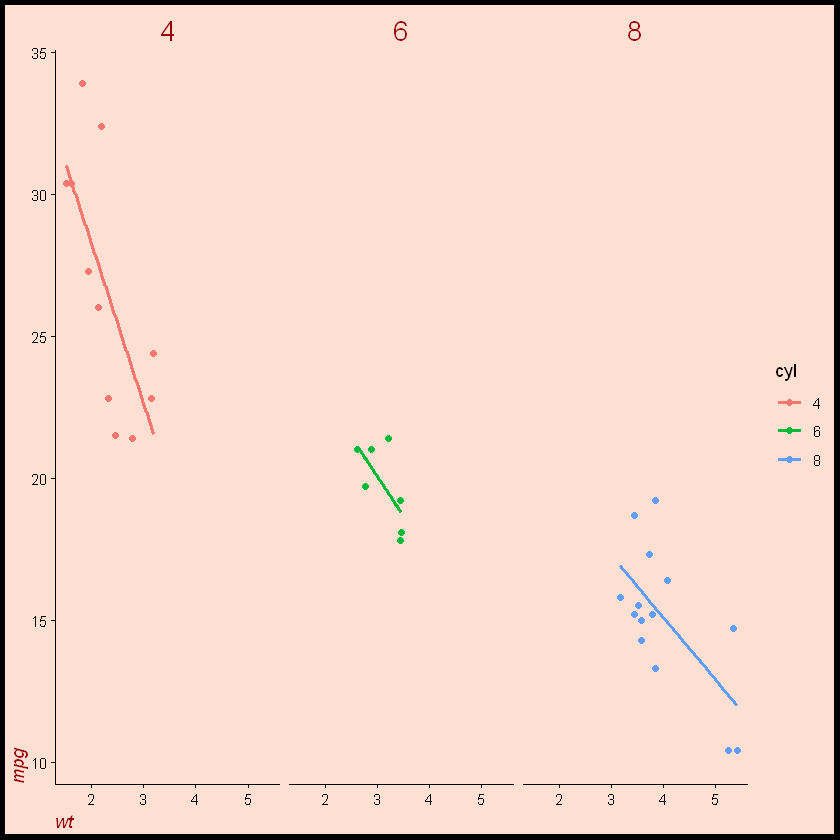

In [148]:
myRed <- "#99000D"

# Extend z with theme() function and four arguments
z <- z + theme(
 strip.text = element_text(size = 16, color = myRed),
 axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
 axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
 axis.text = element_text(color = "black")
  )

z

In [150]:
# Legends
# The themes layer also allows you to specify the appearance and location of legends.
# 
# The plot you've coded up to now is available as z. It's also displayed in the viewer. Solve the instructions and compare 
# the resulting plots with the plot you started with.
# 
# Instructions
# 
# Add a theme() function to z to change the legend's location. Do this by specifying the legend.position argument to be 
# c(0.85, 0.85). This will make the legend appear in the top right of the plot, inside the third facet.
# Instead of a vertical list of legend entries, you might want to have the different entries next to each other. 
# Starting from z,
# add a theme() function in which you specify legend.direction to be "horizontal".

`geom_smooth()` using formula 'y ~ x'


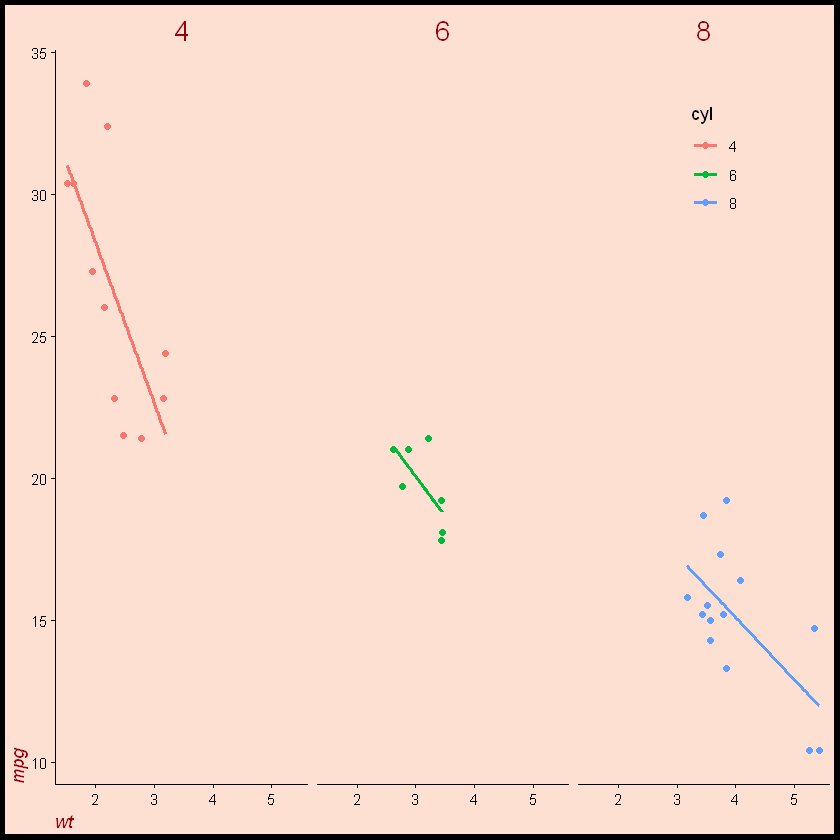

In [151]:
# Move legend by position
z + theme(
  legend.position = c(0.85, 0.85)
  )

`geom_smooth()` using formula 'y ~ x'


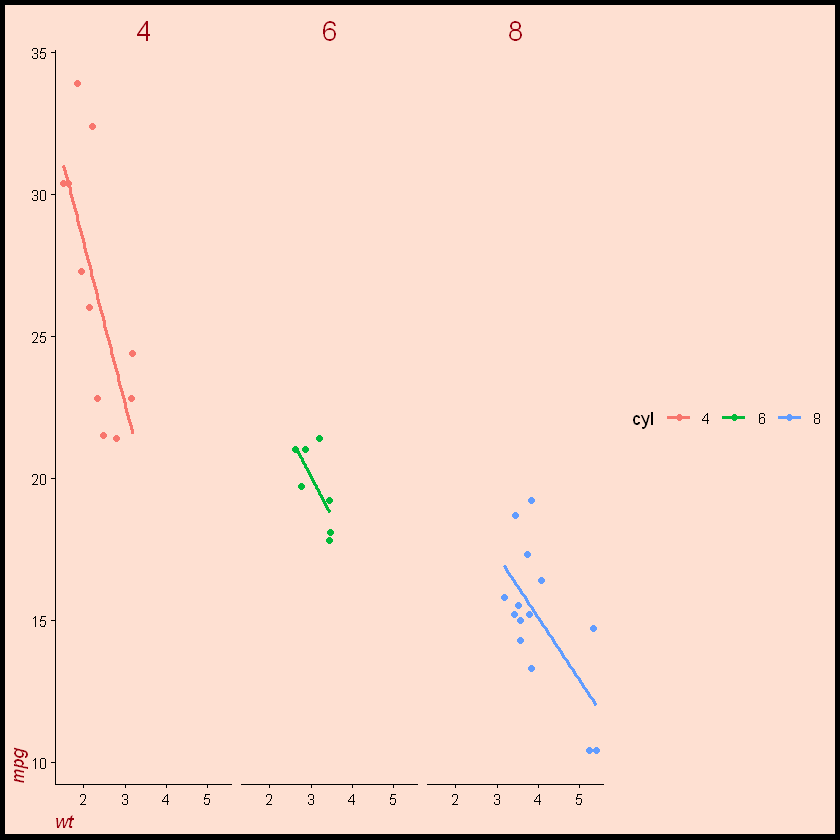

In [152]:
# Change direction
z + theme(
  legend.direction = "horizontal"
  )

`geom_smooth()` using formula 'y ~ x'


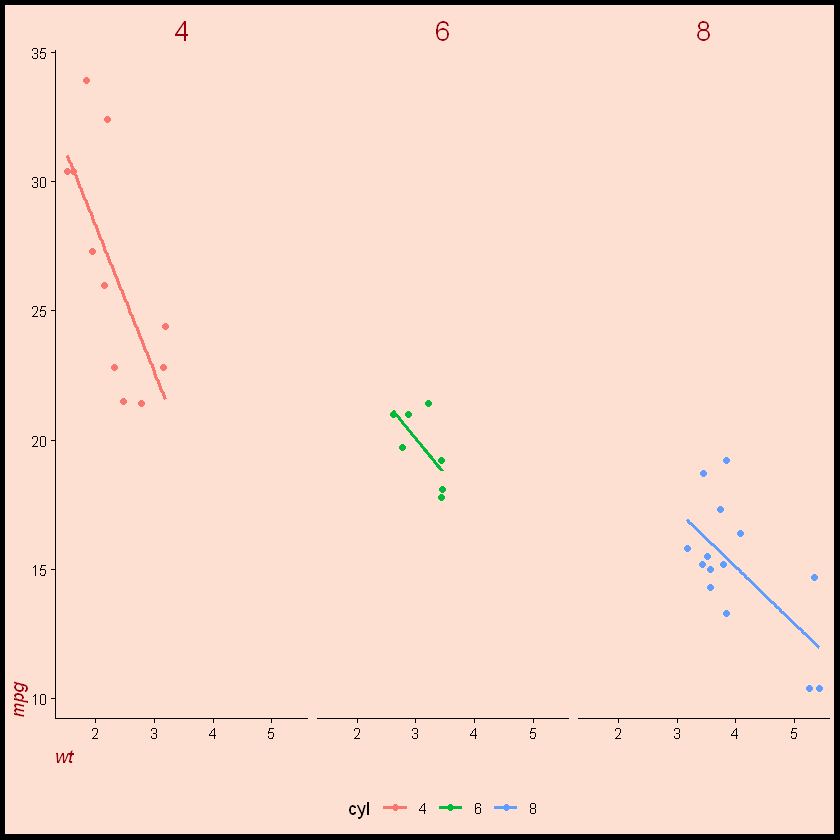

In [153]:
# Change location by name
z + theme(
  legend.position = "bottom"
  )

`geom_smooth()` using formula 'y ~ x'


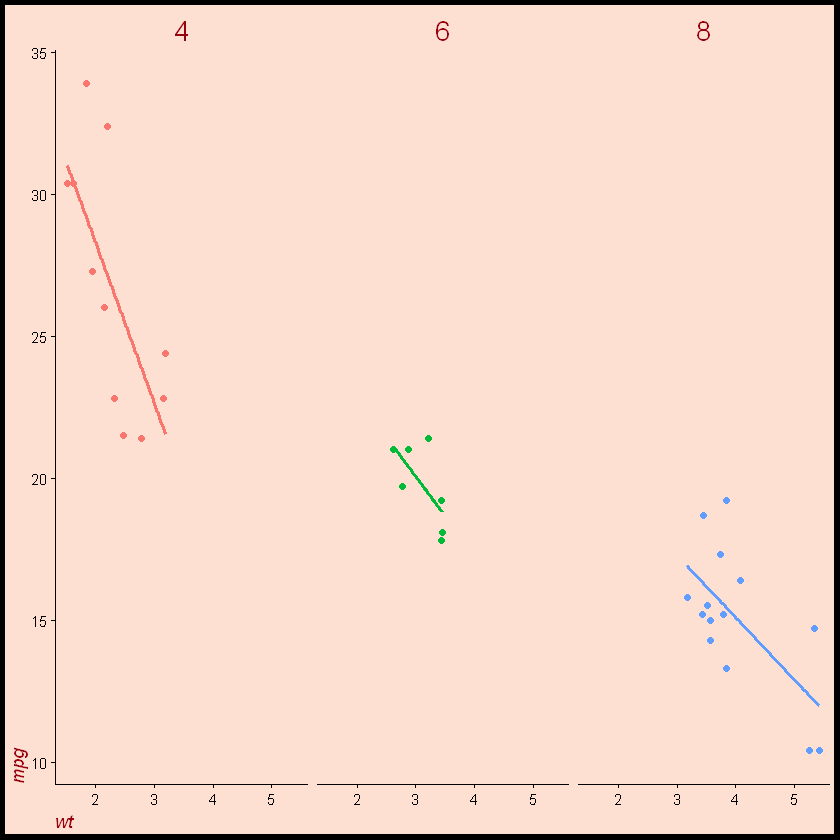

In [154]:
# Remove legend entirely
z + theme(
  legend.position = "none"
  )

In [155]:
# Positions
# The different rectangles of your plot have spacing between them. There's spacing between the facets, 
# between the axis labels and the plot rectangle, between the plot rectangle and the entire panel background, etc.
# Let's experiment!
# 
# The last plot you created in the previous exercise, without a legend, is available as z.
# 
# Instructions
# 
# Suppose you want to have more spacing between the different facets. You can control this by specifying panel.spacing.x inside 
# a theme() function you add to z. For the argument value, you should pass a unit object. To achieve this, load the grid package
# with library(). Next, set panel.spacing.x to unit(2, "cm").
# Copy, adapt and paste the plot command for the previous instruction: to adjust the plot margin, set plot.margin to
# unit(c(1,2,1,1), "cm") (spacing for top, right, bottom, and left margins).


`geom_smooth()` using formula 'y ~ x'


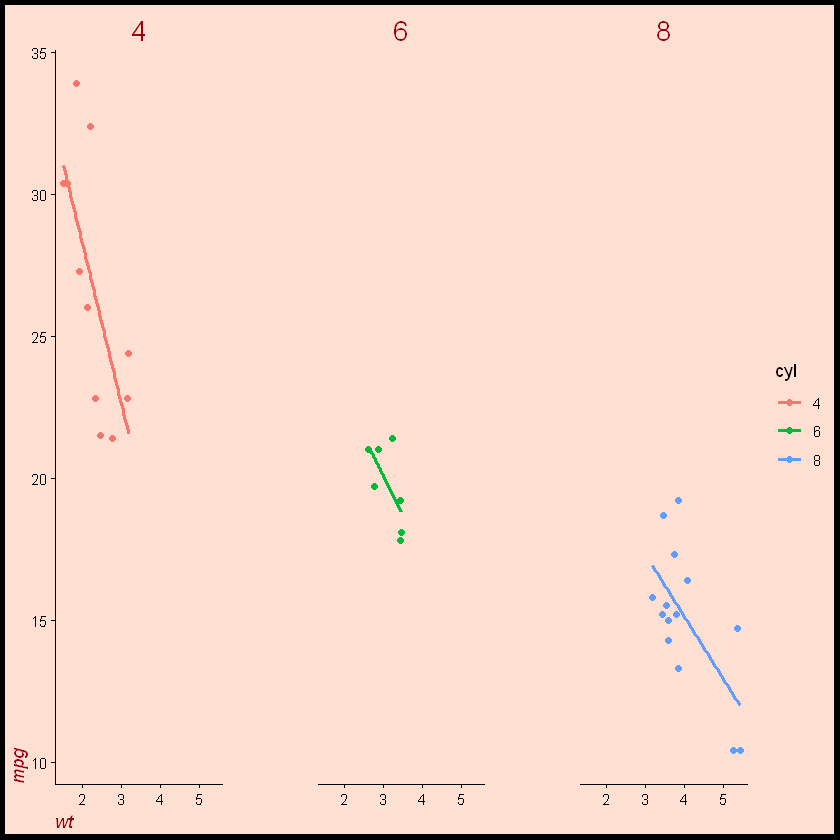

In [156]:
library(grid)

# Increase spacing between facets
z + theme(
  panel.spacing.x = unit(2, "cm")
  )

`geom_smooth()` using formula 'y ~ x'


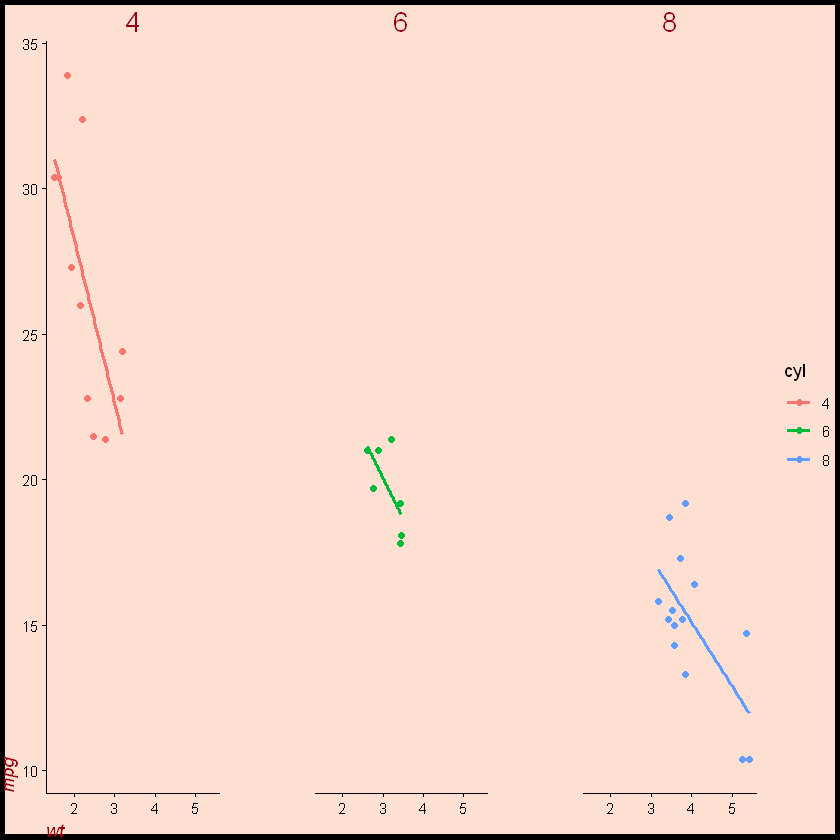

In [157]:
# Add code to remove any excess plot margin space
z + theme(
  panel.spacing.x = unit(2, "cm"),
  plot.margin = unit(c(0,0,0,0), "cm")
  )

In [158]:
# Updating Themes
# Building your themes every time from scratch can become a pain and unnecessarily bloat your scripts. 
# In the following exercises, we'll practice different ways of managing, updating and saving themes.
# 
# A plot object z2 is already created for you on the right. It shows mpg against wt for the mtcars dataset, faceted according 
# to cyl. Also the colors myPink and myRed are available. In the previous exercises you've already customized the rectangles, 
# lines and text on the plot. This theme layer is now separately stored as theme_pink, as shown in the sample code.
# 
# theme_update() updates the default theme used by ggplot2. The arguments for theme_update() are the same as for theme(). 
# When you call theme_update() and assign it to an object (e.g. called old), that object stores the current default theme, 
# and the arguments update the default theme. If you want to restore the previous default theme, you can get it back by using 
# theme_update() again. Let's see how:
# 
# Instructions
# 
# 1 - "Apply" theme_pink to z2 to carry out all customizations.
# 2 - Instead of applying theme_pink, use theme_update(). This function returns an object that contains the previous theme 
# settings, so that you can restore it later. Assign the output of theme_update() to an object called old.
# 3 - Plot z2 again, after the theme_update() call. The resulting plot has the same appearance as the previous one - 
# but now you don't need to call theme() explictly.
# 4 - Restore the old theme using theme_set(old) and plot z2 again. It's back to the original default theme.

`geom_smooth()` using formula 'y ~ x'


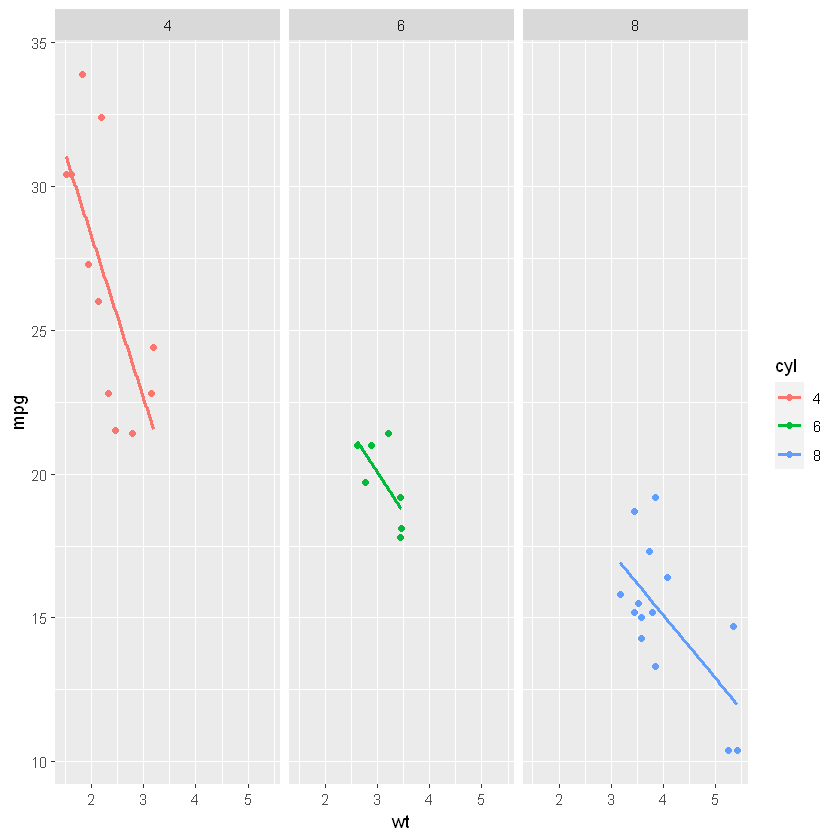

In [159]:
z2 <- ggplot(mtcars, aes(wt, mpg, col = cyl)) + 
  geom_point() + 
  stat_smooth(method = "lm", se = F) + 
  facet_grid(. ~ cyl)

# Theme layer saved as an object, theme_pink
theme_pink <- theme(panel.background = element_blank(),
                    legend.key = element_blank(),
                    legend.background = element_blank(),
                    strip.background = element_blank(),
                    plot.background = element_rect(fill = myPink, color = "black", size = 3),
                    panel.grid = element_blank(),
                    axis.line = element_line(color = "black"),
                    axis.ticks = element_line(color = "black"),
                    strip.text = element_text(size = 16, color = myRed),
                    axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
                    axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
                    axis.text = element_text(color = "black"),
                    legend.position = "none")
  
# Apply theme_pink to z2
z2

`geom_smooth()` using formula 'y ~ x'


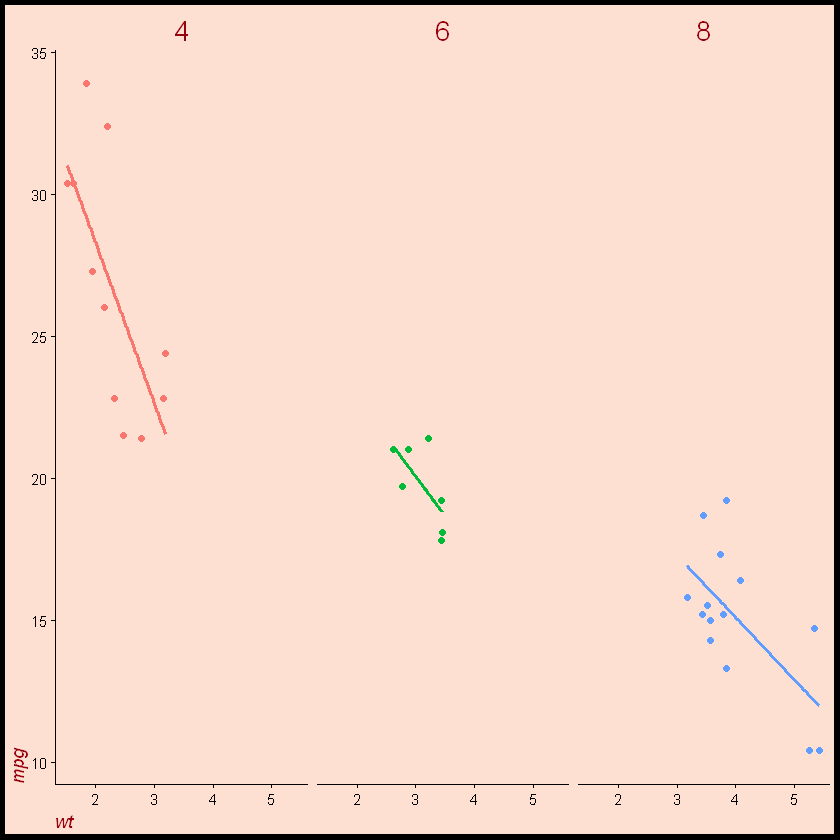

In [160]:
z2 + theme_pink

`geom_smooth()` using formula 'y ~ x'


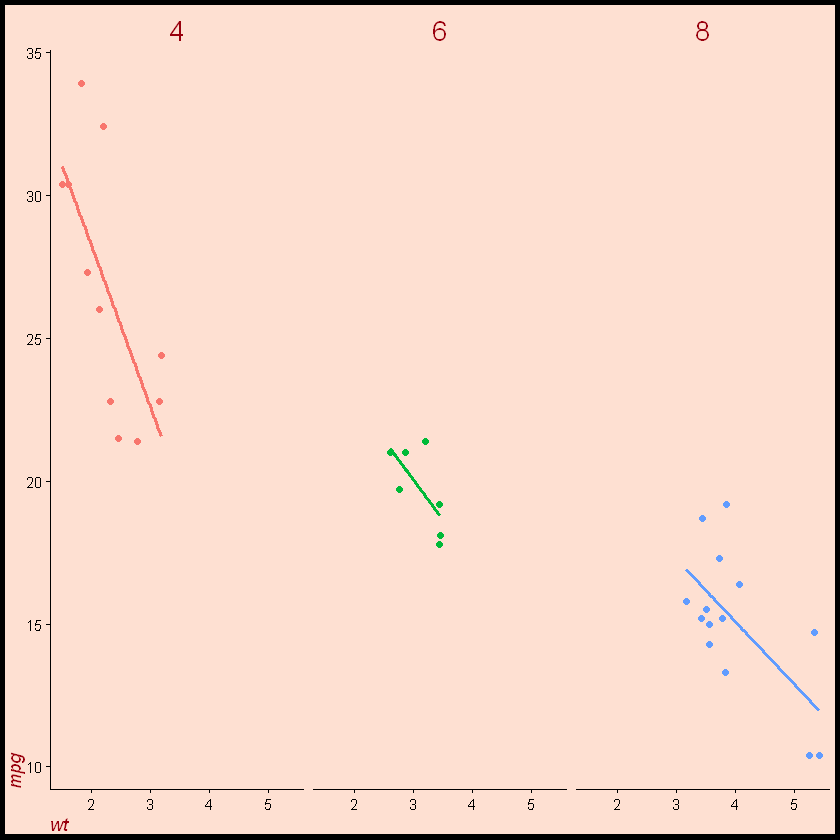

In [161]:
# Change code so that old theme is saved as old
## Theme_update can be used to update a theme
## or to store the current setting in a variable for backup
old <- theme_update()
theme_update(panel.background = element_blank(),
             legend.key = element_blank(),
             legend.background = element_blank(),
             strip.background = element_blank(),
             plot.background = element_rect(fill = myPink, color = "black", size = 3),
             panel.grid = element_blank(),
             axis.line = element_line(color = "black"),
             axis.ticks = element_line(color = "black"),
             strip.text = element_text(size = 16, color = myRed),
             axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
             axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
             axis.text = element_text(color = "black"),
             legend.position = "none")

# Display the plot z2
z2

`geom_smooth()` using formula 'y ~ x'


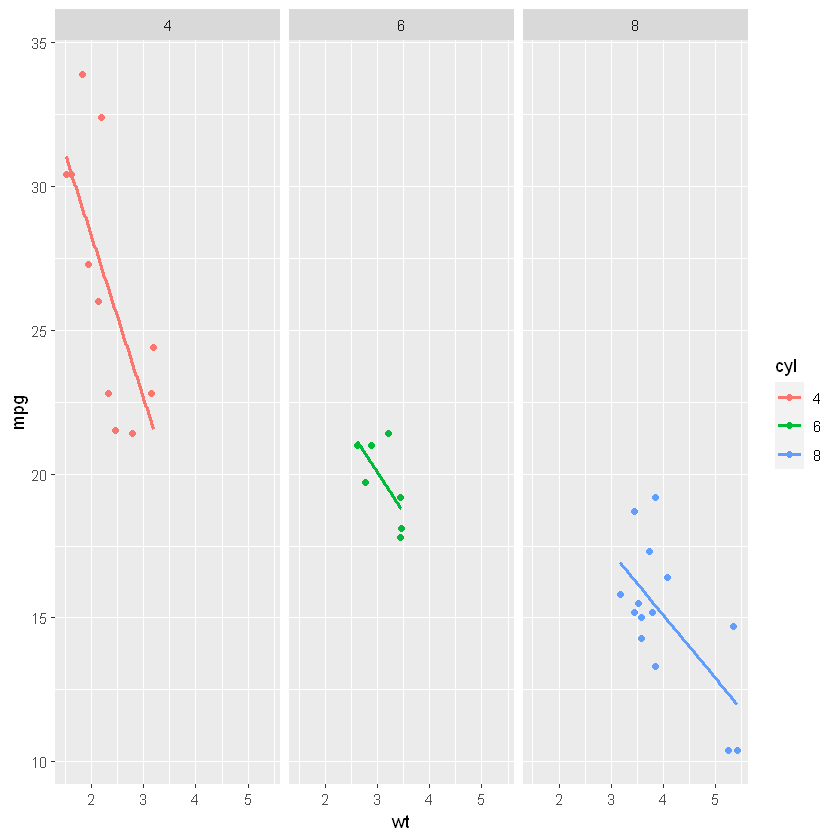

In [162]:
# Restore the old plot
theme_set(old)
z2

In [163]:
# Exploring ggthemes
# There are many themes available by default in ggplot2: theme_bw(), theme_classic(), theme_gray(), etc. 
# In the previous exercise, you saw that you can apply these themes to all following plots, with theme_set():
# 
# theme_set(theme_bw())
# But you can also apply them on an individual plot, with:
# 
# ... + theme_bw()
# You can also extend these themes with your own modifications. In this exercise, you'll experiment with this and use 
# some preset templates available from the ggthemes package. The workspace already contains the same basic plot from before 
# under the name z2.
# 
# Instructions
# 
# Create a custom theme, assigning it to custom_theme.
# Call theme_tufte() with no arguments.
# Add a call to theme() as follows.
# Set legend.position to c(0.9, 0.9).
# Set legend.title to an "italic" text of size 12. Use element_text(face = ___, size = ___).
# Set axis.title to a "bold" text of size 14. Use element_text(face = ___, size = ___).
# Plot z2 with the customized theme. (You don't need parentheses.)
# Make custom_theme the default by calling theme_set().
# Plot z2 again.

In [165]:
install.packages("ggthemes")


package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PAVILION 2\AppData\Local\Temp\RtmpcvKsOl\downloaded_packages


In [169]:
# Load ggthemes package
library(ggthemes)

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


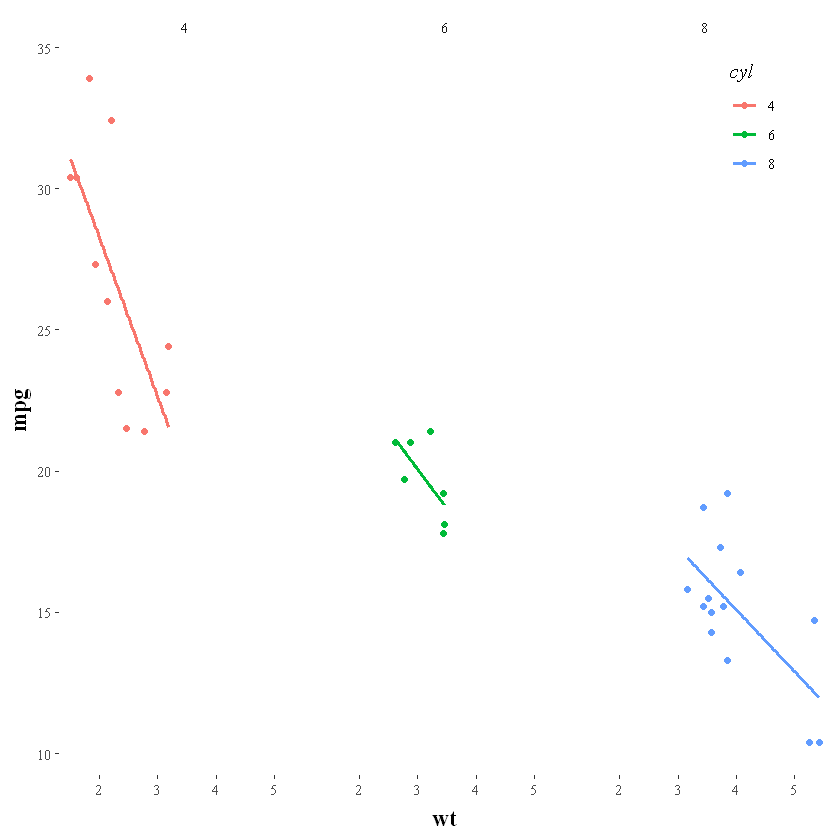

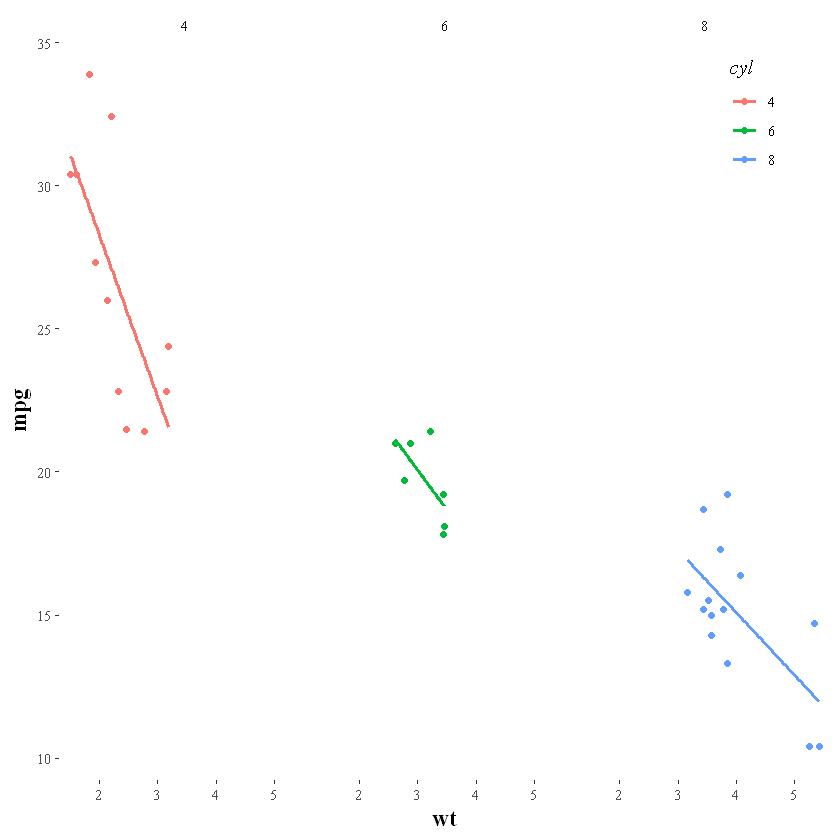

In [172]:
# Apply theme_tufte(), plot additional modifications
custom_theme <-  theme_tufte() +theme(legend.position = c(0.9,0.9),legend.title = element_text(face="italic",size=12),axis.title = element_text(face="bold",size=14))


# Draw the customized plot
z2 + custom_theme
# Use theme set to set custom theme as default
theme_set(custom_theme)
# Plot z2 again
z2

# 4. Best Practices

Once you have the technical skill to make great visualizations, it’s important that you make them as meaningful as possible. In this chapter we’ll go over three plot types that are mostly discouraged in the data viz community - heat maps, pie charts and dynamite plots. We’ll understand what the problems are with these plots and what the alternatives are.

In [173]:
# Bar Plots (1)
# In the video we saw why "dynamite plots" (bar plots with error bars) are not well suited for their intended purpose 
# of depicting distributions. If you really want error bars on bar plots, you can still get that. However, 
# you'll need to set the positions manually. A point geom will typically serve you much better.
# 
# We saw an example of a dynamite plot earlier in this course. Let's return to that code and make sure you know how to handle it.
# We'll use the mtcars dataset for examples. The first part of this exercise will just be a refresher,
# then we'll get into some details.
# 
# Instructions
# 
# To begin with, create the base layers where you map wt on the y axis and cyl on the x axis. cyl and am have already 
# been converted to a factor variable for you. Store these base layers as an object m.
# Draw a dynamite plot filling in the details for the bars in the first stat_summary() function. Set fun.y to mean,
# geom to "bar" and give the bars a "skyblue" fill. The stat_summary() function that adds error bars is coded for you.

In [ ]:
# Base layers
m <- ggplot(mtcars, aes(x = cyl, y = wt))
# Draw dynamite plot
m +stat_summary(fun.y = mean, geom = "bar", fill = "skyblue") 
    +stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom= "errorbar", width = 0.1)

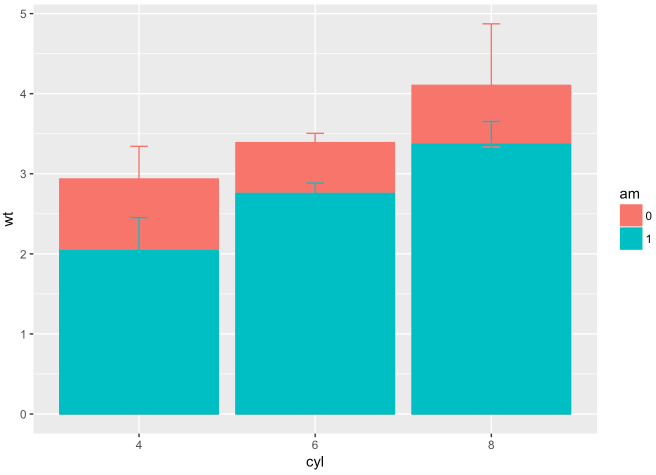

In [178]:
display_png(file="F:\\DATA_SCIENCE\\R-STUDIO\\DATACAMP IN R\\Data Visualization with ggplot2 (Part 2)\\ch3 1.png") 

In [176]:
# Bar Plots (2)
# In the previous exercise we used the mtcars dataset to draw a dynamite plot about the weight of the cars per cylinder type.
# 
# In this exercise we will add a distinction between transmission type, am, for the dynamite plots.
# 
# Instructions
# 
# Update m so that we split the bars according to transmission type, am. Note that for bar plots, we want to change 
# the col as well as the fill.
# Plot 1 is already coded for you, but it is not optimal. Let's fix that in the following instructions.
# Plot 2: copy the code for Plot 1 and set the position to "dodge" - this also doesn't work, because the default dodging is
# different for the different stat_summary() functions.
# Plot 3: copy the code for Plot 2 and set the position to the object posn.d, which defines a dodge position using 
# position_dodge(0.9).

In [ ]:
# Base layers
m <- ggplot(mtcars, aes(x = cyl,y = wt, col = am, fill = am))

# Plot 1: Draw dynamite plot
m +
  stat_summary(
    fun.y = mean, 
    geom = "bar") +
  stat_summary(
    fun.data = mean_sdl, 
    fun.args = list(mult = 1), 
    geom = "errorbar", 
    width = 0.1)

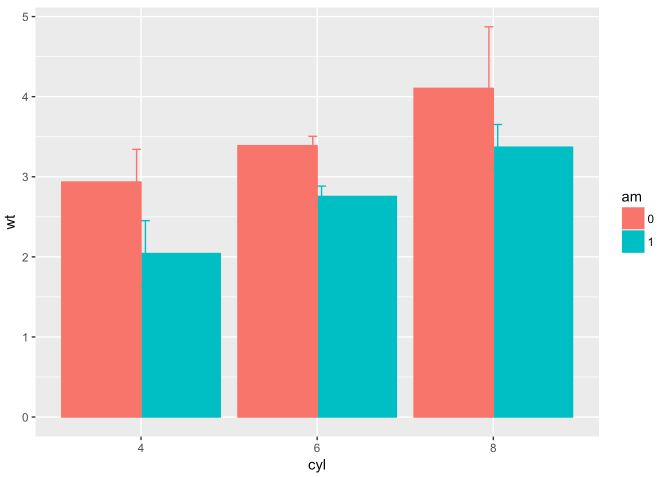

In [179]:
display_png(file="F:\\DATA_SCIENCE\\R-STUDIO\\DATACAMP IN R\\Data Visualization with ggplot2 (Part 2)\\ch3 2.png") 

In [ ]:
# Set your dodge posn manually
posn.d <- position_dodge(0.9)

# Plot 3:  Redraw dynamite plot
m +
  stat_summary(
    fun.y = mean, 
    geom = "bar", 
    position = posn.d) +
  stat_summary(
    fun.data = mean_sdl, 
    fun.args = list(mult = 1), 
    geom = "errorbar", 
    width = 0.1, 
    position = posn.d)

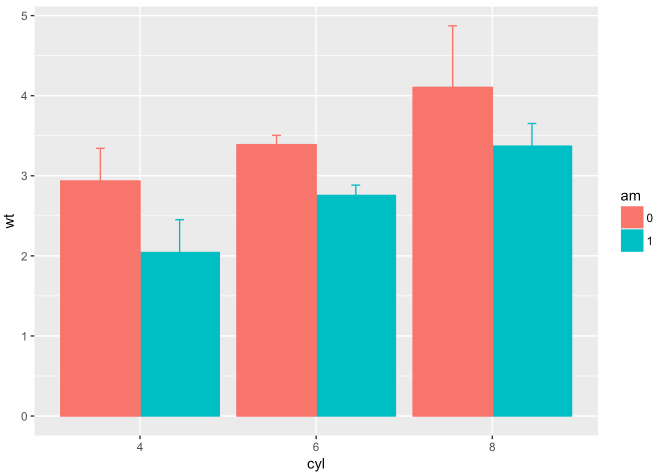

In [180]:
display_png(file="F:\\DATA_SCIENCE\\R-STUDIO\\DATACAMP IN R\\Data Visualization with ggplot2 (Part 2)\\ch3 3.png") 

In [185]:
# Pie Charts (1)
# 
# In this example we're going to consider a typical use of pie charts - a categorical variable as the proportion of another 
# categorical variable. For example, the proportion of each transmission type am, in each cylinder, cyl class.
# 
# The first plotting function in the editor should be familiar to you by now. It's a straightforward bar chart with 
# position = "fill", as shown in the viewer. This is already a good solution to the problem at hand! Let's take it one step 
# further and convert this plot in a pie chart.
# 
# Instructions
# 
# Adapt the code for the bar chart in the editor to turn it into a good looking pie chart:
# 
# Transform the bar plot into a facetted plot: add a facet_grid() call to split columns by cyl. Remember to use formula 
# notation here ROW ~ COL.
# 
# For the moment, each facet will only have one category because cyl is also mapped onto x. Use a dummy aesthetic for the x. 
# Change the aes() function such that factor(1) maps onto x.
# 
# Add a coord_polar() call where you specify the theta to "y".
# 
# This is already pretty good, but to remove all non-data ink add a theme_void() layer. (This is the first time we've seen 
# this theme, but you should be familiar with themes already).
# 
# There's a small hole in the center of the pies. Inside geom_bar() set width = 1 so that the bars fill up the entire width 
# resulting in a full pie chart.

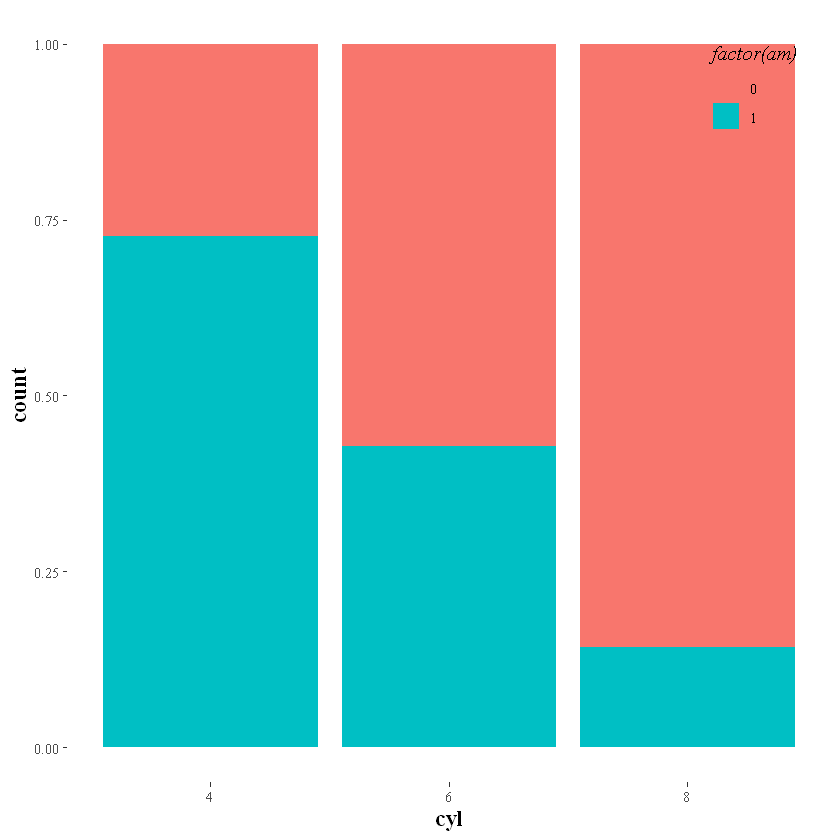

In [186]:
# Convert bar chart to pie chart
ggplot(mtcars, aes(x = cyl, fill = factor(am))) +
  geom_bar(position = "fill")

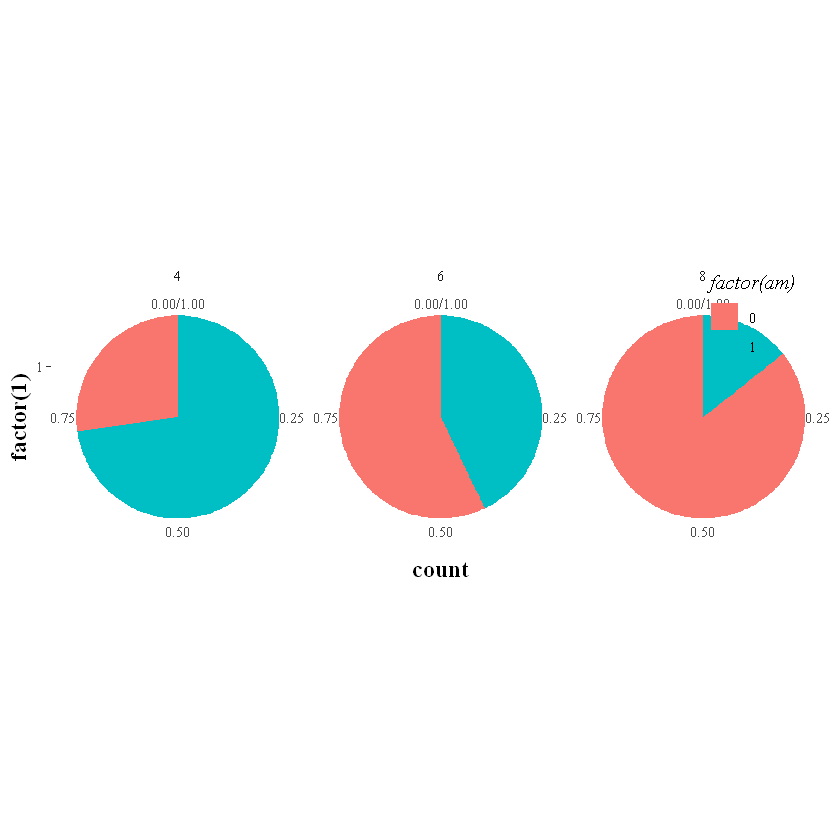

In [187]:
# Convert bar chart to pie chart
ggplot(mtcars, aes(x = factor(1), fill = factor(am))) +
  geom_bar(position = "fill", width = 1) + 
  facet_grid(. ~ cyl) + 
  coord_polar(theta = "y")

In [188]:
# Pie Charts (2)
# In the previous example, we looked at one categorical variable (am) as a proportion of another (cyl). 
# Here, we're interested in two or more categorical variables, independent of each other. The many pie charts in 
# the viewer is an unsatisfactory visualization. We're interested in the relationship between all these variables 
# (e.g. where are 8 cylinder cars represented on the Transmission, Gear and Carburetor variables?) 
# Perhaps we also want continuous variables, such as weight. How can we combine all this information?
# 
# The trick is to use a parallel coordinates plot, like this one. Each variable is plotted on its own parallel axis. 
# Individual observations are connected with lines, colored according to a variable of interest. This is a surprisingly useful 
# visualization since we can combine many variables, even if they are on entirely different scales.
# 
# A word of caution though: typically it is very taboo to draw lines in this way. It's the reason why we don't draw lines across
# levels of a nominal variable - the order, and thus the slope of the line, is meaningless. Parallel plots are a (very useful) 
# exception to the rule!
# 
# Instructions
# 
# am is variable 9 in the mtcars data frame. Assign this number to group_by_am. The object my_names_am will
# contain a numeric vector from 1 - 11 excluding the column with am. These will be our parallel axes.
# Fill in the ggparcoord() function.
# The first argument is the data frame you're using. mtcars in our case.
# The second argument is the number of the columns to plot (use my_names_am),
# groupColumn specifies the column number of the grouping variable (use group_by_am)
# alpha, the opacity, should be set to 0.8

In [190]:
install.packages("GGally")

also installing the dependency 'reshape'



package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PAVILION 2\AppData\Local\Temp\RtmpcvKsOl\downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


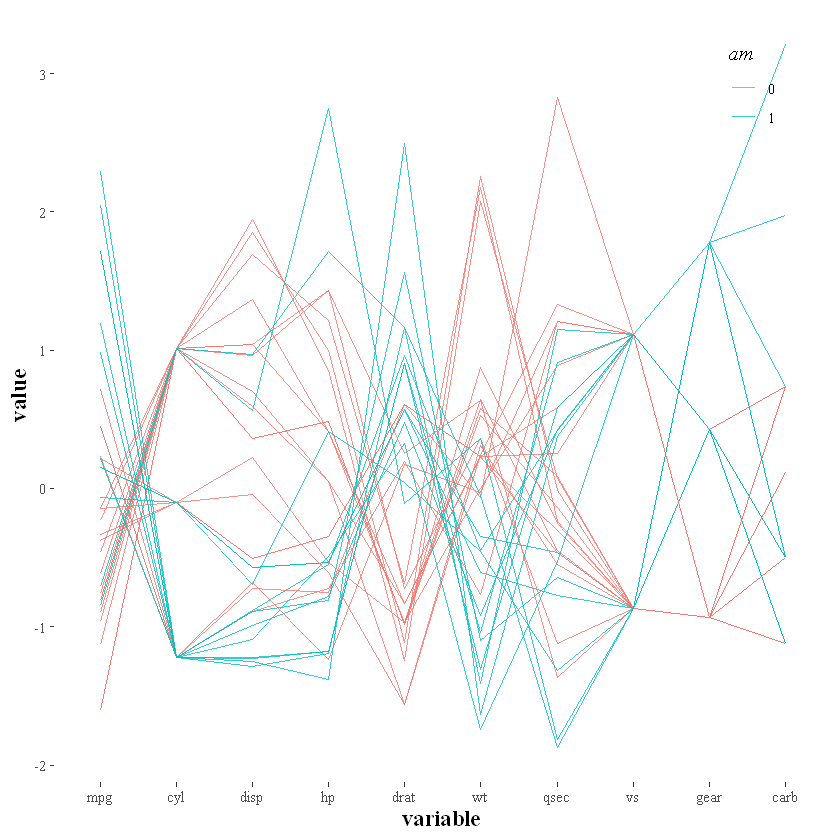

In [191]:
# Parallel coordinates plot using GGally
library(GGally)

# All columns except am
group_by_am <- 9
my_names_am <- (1:11)[-group_by_am]

# Basic parallel plot - each variable plotted as a z-score transformation
ggparcoord(mtcars, my_names_am, groupColumn = group_by_am, alpha = 0.8)

In [194]:
# Heat Maps
# In the video you saw reasons for not using heat maps. Nonetheless, you may encounter a case in which you really 
# do want to use one. Luckily, they're fairly straightforward to produce in ggplot2.
# 
# We begin by specifying two categorical variables for the x and y aesthetics. At the intersection of each category 
# we'll draw a box, except here we call it a tile, using the geom_tile() layer. Then we will fill each tile with a continuous 
# variable.
# 
# We'll produce the heat map we saw in the video with the built-in barley dataset. The barley dataset is in 
# the lattice package and has already been loaded for you. Begin by exploring the structure of the data in the console 
# using str().
# 
# Instructions
# 
# Reproduce the heat map shown in the viewer in different steps:
# 
# Define the data and the aesthetics layer. Using the barley dataset, map year onto x, variety onto y and fill 
# according to yield
# Add a geom_tile() to build the heat maps.
# So far the entire dataset is plotted on one heat map. Add a facet_wrap() function to get a facetted plot. 
# Use the formula ~ site (without the dot!) and set ncol = 1. By default, the names of the farms will be above the panels, 
# not to the side (as we get with facet_grid()).
# brewer.pal() from the RColorBrewer package has been used to create a "Reds" color palette. The hexadecimal color codes 
# are stored in the myColors object. Add the scale_fill_gradientn() function and specify the colors argument correctly to give 
# the heat maps a reddish look.

In [195]:
str(barley)

'data.frame':	120 obs. of  4 variables:
 $ yield  : num  27 48.9 27.4 39.9 33 ...
 $ variety: Factor w/ 10 levels "Svansota","No. 462",..: 3 3 3 3 3 3 7 7 7 7 ...
 $ year   : Factor w/ 2 levels "1932","1931": 2 2 2 2 2 2 2 2 2 2 ...
 $ site   : Factor w/ 6 levels "Grand Rapids",..: 3 6 4 5 1 2 3 6 4 5 ...


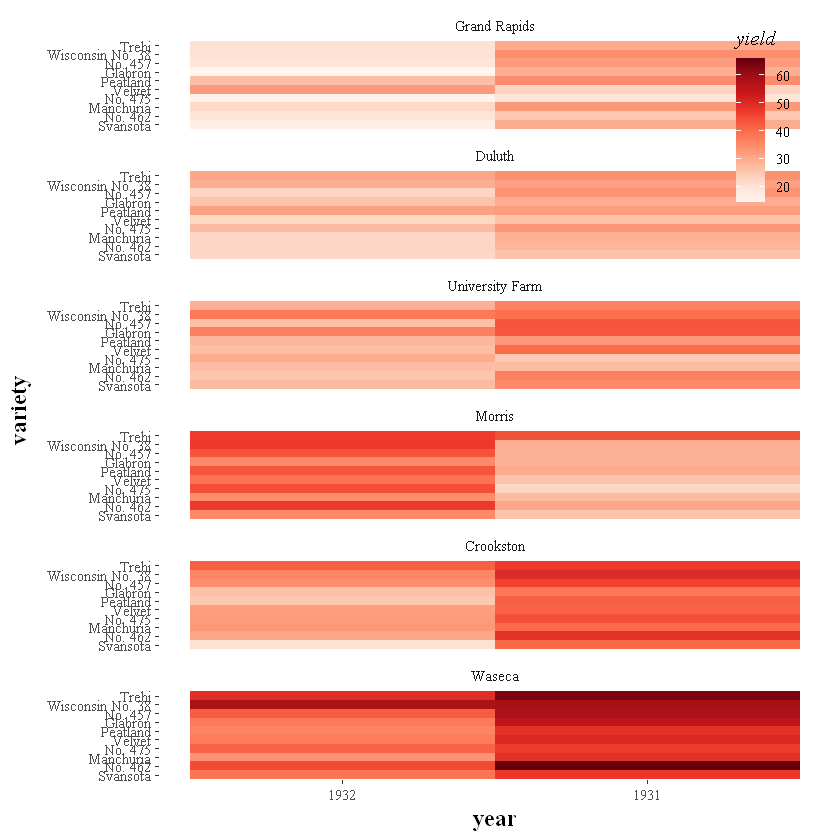

In [199]:
# Create color palette
myColors <- brewer.pal(9, "Reds")
# Build the heat map from scratch
ggplot(barley, aes(x = year, y = variety, fill= yield)) +geom_tile() + # Geom layer
facet_wrap( ~ site, ncol = 1) + # Facet layer
scale_fill_gradientn(colors =myColors) # Adjust color

In [200]:
# Heat Maps Alternatives (2)
# In the videos we saw two methods for depicting overlapping measurements of spread. 
# You can use dodged error bars or you can use overlapping transparent ribbons (shown in the viewer). 
# In this exercise we'll try to recreate the second option, the transparent ribbons.
# 
# The barley dataset is available. You can use str(barley) to refresh its structure before heading over to the instructions.
# 
# Instructions
# 
# Create a plot, similar to the one in the viewer, from scratch by following these steps:
# 
# Base layer: use the barley dataset. Try to come up with the correct mappings for x, y, col, group and fill.
# Add a stat_summary() function for the mean. Specify fun.y to be mean and set geom to "line".
# Add a stat_summary() function for the ribbons. Set fun.data = mean_sdl and fun.args = list(mult = 1) to have a ribbon 
# that spans over one standard deviation in both directions. Use geom = "ribbon" and set col = NA and alpha = 0.1.

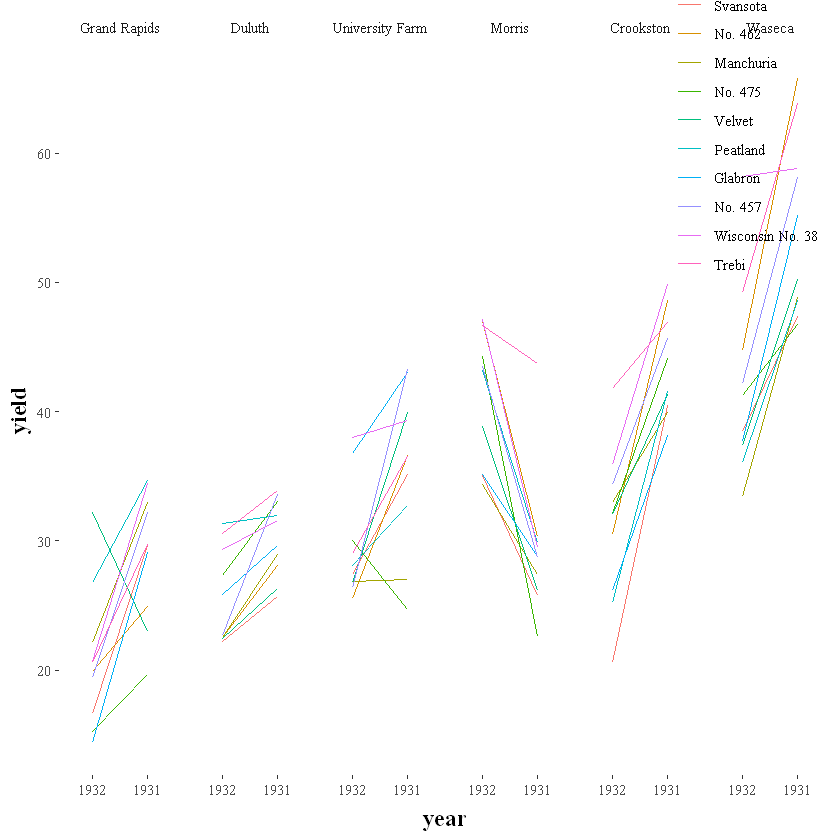

In [202]:
# Line plot; set the aes, geom and facet
ggplot(barley, aes(x = year, y = yield, col = variety,group=variety)) +geom_line() +facet_wrap( ~ site, nrow = 1)


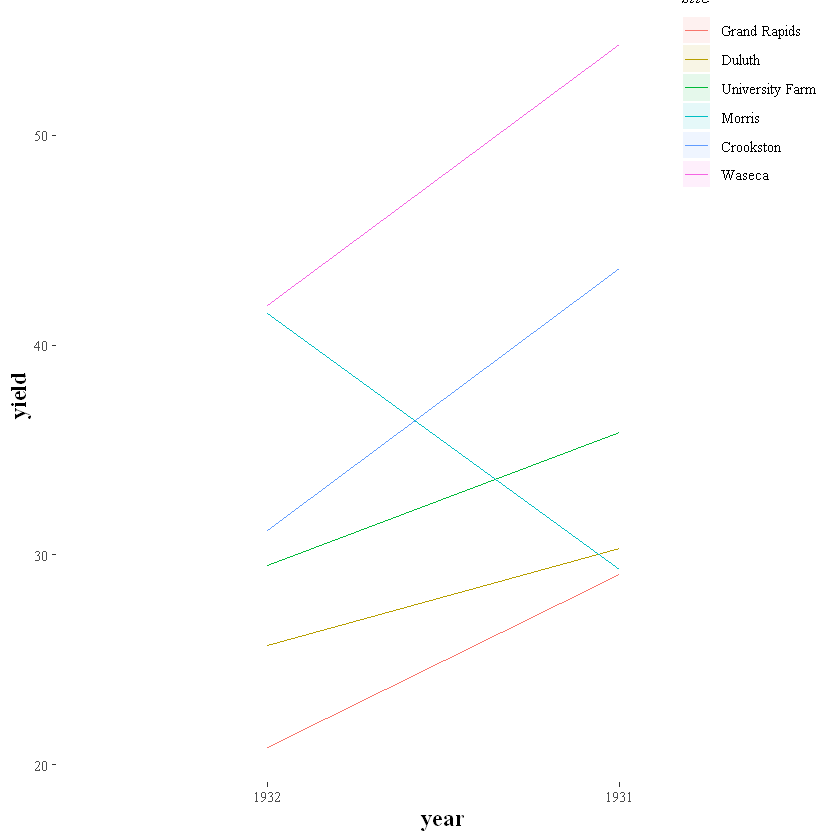

In [205]:
# Create overlapping ribbon plot from scratch
ggplot(barley, aes(year, yield, colour = site, group = site, fill = site)) + 
  stat_summary(fun.y = mean, geom = "line") + 
  stat_summary(
    fun.data = mean_sdl, 
    fun.args = list(mult = 1), 
    geom = "ribbon", 
    col = NA, 
    alpha = 0.1)

# 5. Case Study

In this case study, we’ll explore the large, publicly available California Health Interview Survey dataset from 2009. We’ll go step-by-step through the development of a new plotting method - a mosaic plot - combining statistics and flexible visuals. At the end, we’ll generalize our new plotting method to use on a variety of datasets we’ve seen throughout the first two courses.

In [206]:
# Exploring Data
# In this chapter we're going to continuously build on our plotting functions and understanding to produce a mosaic plot
# (aka Marimekko plot). This is a visual representation of a contingency table, comparing two categorical variables. 
# Essentially, our question is which groups are over or under represented in our dataset. To visualize this we'll color 
# groups according to their Pearson residuals from a chi-squared test. At the end of it all we'll wrap up our script into a 
# flexible function so that we can look at other variables.
# 
# We'll familiarize ourselves with a small number of variables from the 2009 CHIS adult-response dataset 
# (as opposed to children).
# We have selected the following variables to explore:
# 
# RBMI: BMI Category description
# BMI_P: BMI value
# RACEHPR2: race
# SRSEX: sex
# SRAGE_P: age
# MARIT2: Marital status
# AB1: General Health Condition
# ASTCUR: Current Asthma Status
# AB51: Type I or Type II Diabetes
# POVLL: Poverty level
# We'll filter our dataset to plot a more reliable subset (we'll still retain over 95% of the data).
# 
# Before we get into mosaic plots it's worthwhile exploring the dataset using simple distribution plots - i.e. histograms.
# 
# ggplot2 is already loaded and the dataset, named adult, is already available in the workspace.
# 
# Instructions
# 
# Use the typical commands for exploring the structure of adult to get familiar with the variables: summary() and str().
# As a first exploration of the data, plot two histograms using ggplot2 syntax: one for age (SRAGE_P) and one for BMI (BMI_P). 
# The goal is to explore the dataset and get familiar with the distributions here. Feel free to explore different bin widths. 
# We'll ask some questions about these in the next exercises.
# Next plot a binned-distribution of age, filling each bar according to the BMI categorization. Inside geom_histogram(), 
# set binwidth = 1. You'll want to use fill = factor(RBMI) since RBMI is a categorical variable.


In [220]:
load("CHIS2009_reduced_2.RData")

In [228]:
head(adult)

RBMI,BMI_P,RACEHPR2,SRSEX,SRAGE_P,MARIT2,AB1,ASTCUR,AB51,POVLL
3,28.89,White,1,32,1,1,2,-1,4
3,26.15,White,2,80,3,1,2,-1,4
3,25.06,White,1,71,1,2,1,-1,4
2,24.99,White,1,39,4,1,2,-1,4
3,25.09,White,1,75,1,2,2,-1,4
4,32.21,White,2,53,1,3,1,-1,4


In [222]:
summary(adult)

      RBMI           BMI_P          RACEHPR2         SRSEX      
 Min.   :1.000   Min.   :12.65   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:22.77   1st Qu.:5.000   1st Qu.:1.000  
 Median :3.000   Median :25.72   Median :6.000   Median :2.000  
 Mean   :2.748   Mean   :26.64   Mean   :5.088   Mean   :1.591  
 3rd Qu.:3.000   3rd Qu.:29.32   3rd Qu.:6.000   3rd Qu.:2.000  
 Max.   :4.000   Max.   :93.72   Max.   :6.000   Max.   :2.000  
    SRAGE_P          MARIT2           AB1            ASTCUR     
 Min.   :18.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:44.00   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :57.00   Median :1.000   Median :2.000   Median :2.000  
 Mean   :56.14   Mean   :2.043   Mean   :2.525   Mean   :1.915  
 3rd Qu.:69.00   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :85.00   Max.   :4.000   Max.   :5.000   Max.   :2.000  
      AB51             POVLL      
 Min.   :-1.0000   Min.   :1.000  
 1st Qu.:-1.0000   1

In [223]:
str(adult)

'data.frame':	44346 obs. of  10 variables:
 $ RBMI    : num  3 3 3 2 3 4 3 2 3 3 ...
 $ BMI_P   : num  28.9 26.1 25.1 25 25.1 ...
 $ RACEHPR2: num  6 6 6 6 6 6 6 6 6 6 ...
 $ SRSEX   : num  1 2 1 1 1 2 1 2 1 2 ...
 $ SRAGE_P : num  32 80 71 39 75 53 42 33 67 52 ...
 $ MARIT2  : num  1 3 1 4 1 1 1 1 3 3 ...
 $ AB1     : num  1 1 2 1 2 3 2 2 1 5 ...
 $ ASTCUR  : num  2 2 1 2 2 1 2 2 2 2 ...
 $ AB51    : num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ POVLL   : num  4 4 4 4 4 4 4 3 4 4 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


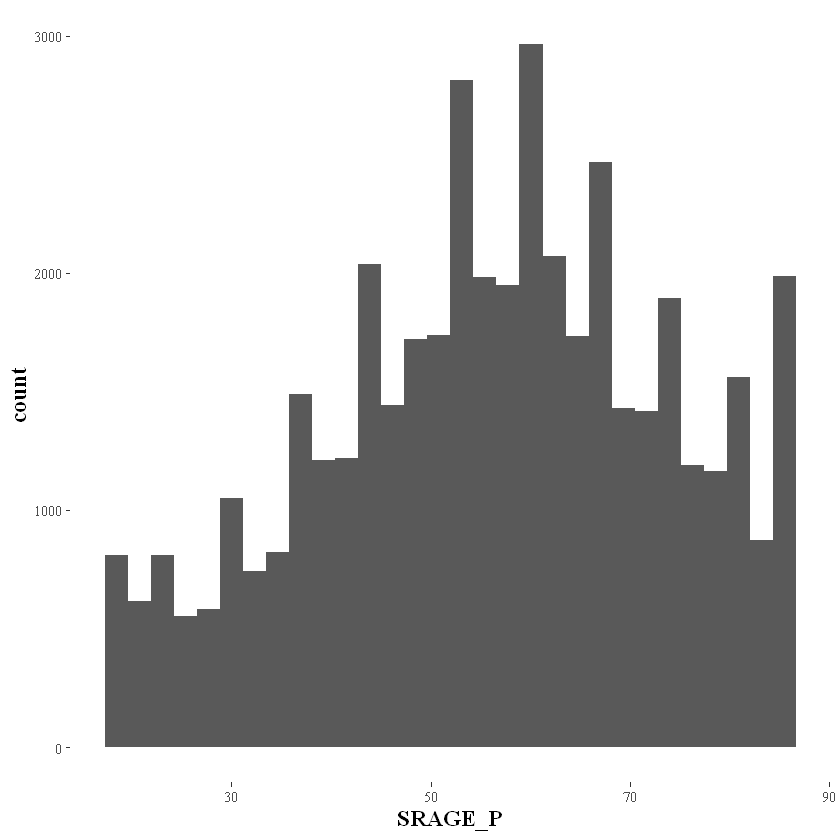

In [224]:
# Age histogram
ggplot(adult, aes(x = SRAGE_P)) +
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


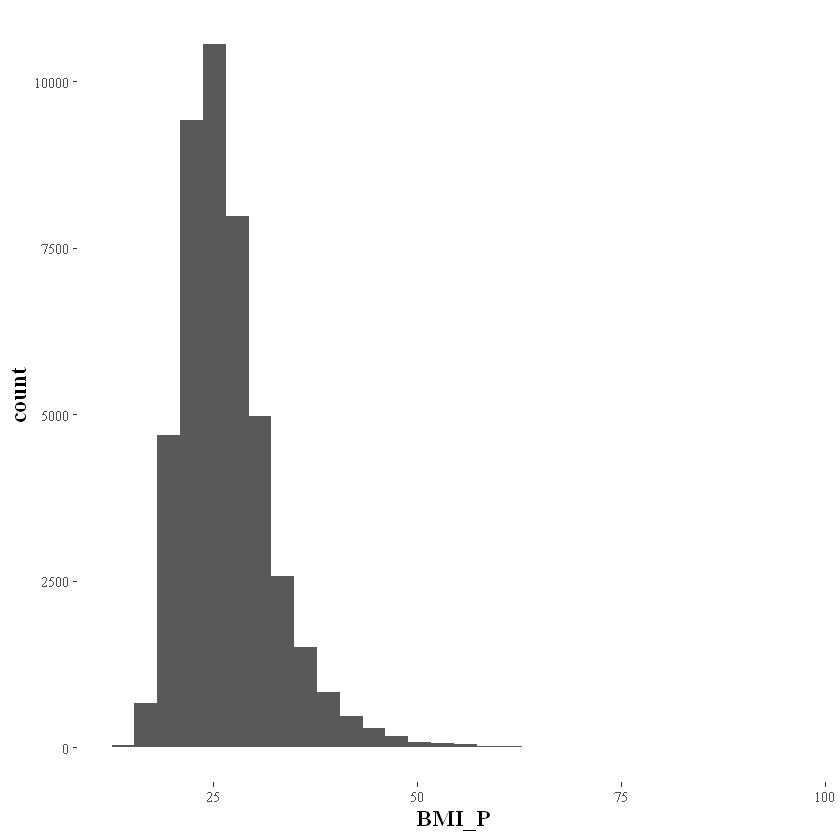

In [225]:
# BMI histogram
ggplot(adult, aes(x = BMI_P)) +
  geom_histogram()

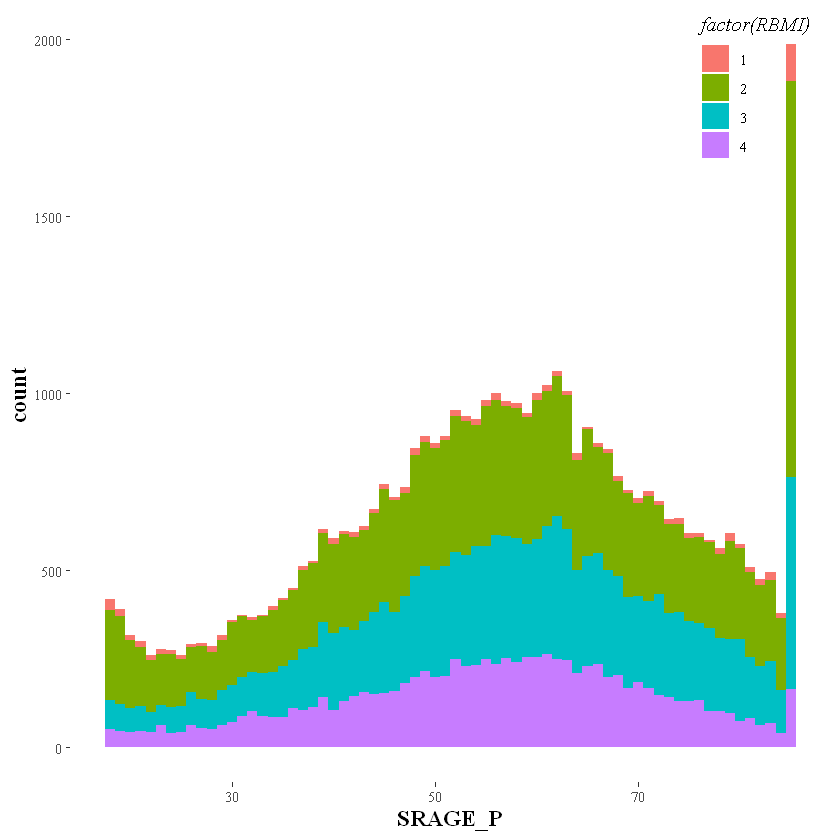

In [226]:
# Age colored by BMI, default binwidth
ggplot(adult, aes(x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1)

In [ ]:
# Data Cleaning
# Now that we have an idea about our data, let's clean it up.
# 
# Instructions
# 
# You should have noticed in the age distribution that there is an unusual spike of individuals at 85, 
# which seems like an artifact of data collection and storage. Solve this by only keeping observations for 
# which adult$SRAGE_P is smaller than or equal to 84.
# There is a long positive tail on the BMIs that we'd like to remove. Only keep observations for which adult$BMI_P 
# is larger than or equal to 16 and adult$BMI_P is strictly smaller than 52.
# We'll focus on the relationship between the BMI score (& category), age and race. To make plotting easier later on,
# we'll change the labels in the dataset. Define adult$RACEHPR2 as a factor with labels 
# c("Latino", "Asian", "African American", "White"). Do the same for adult$RBMI, 
# using the labels c("Under-weight", "Normal-weight", "Over-weight", "Obese").

In [227]:
# Remove individual aboves 84
adult <- adult[adult$SRAGE_P <= 84, ]

# Remove individuals with a BMI below 16 and above or equal to 52
adult <- adult[adult$BMI_P >= 16 & adult$BMI_P < 52, ]

# Relabel the race variable:
adult$RACEHPR2 <- factor(adult$RACEHPR2, labels = c("Latino", "Asian", "African American", "White"))

str(adult)

'data.frame':	42167 obs. of  10 variables:
 $ RBMI    : num  3 3 3 2 3 4 3 2 3 3 ...
 $ BMI_P   : num  28.9 26.1 25.1 25 25.1 ...
 $ RACEHPR2: Factor w/ 4 levels "Latino","Asian",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ SRSEX   : num  1 2 1 1 1 2 1 2 1 2 ...
 $ SRAGE_P : num  32 80 71 39 75 53 42 33 67 52 ...
 $ MARIT2  : num  1 3 1 4 1 1 1 1 3 3 ...
 $ AB1     : num  1 1 2 1 2 3 2 2 1 5 ...
 $ ASTCUR  : num  2 2 1 2 2 1 2 2 2 2 ...
 $ AB51    : num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ POVLL   : num  4 4 4 4 4 4 4 3 4 4 ...


In [229]:
table(adult$RACEHPR2)


          Latino            Asian African American            White 
            5643             4750             1875            29899 

In [230]:
# Relabel the BMI categories variable:
adult$RBMI <- factor(adult$RBMI, labels = c("Under-weight", "Normal-weight", "Over-weight", "Obese"))

str(adult)

'data.frame':	42167 obs. of  10 variables:
 $ RBMI    : Factor w/ 4 levels "Under-weight",..: 3 3 3 2 3 4 3 2 3 3 ...
 $ BMI_P   : num  28.9 26.1 25.1 25 25.1 ...
 $ RACEHPR2: Factor w/ 4 levels "Latino","Asian",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ SRSEX   : num  1 2 1 1 1 2 1 2 1 2 ...
 $ SRAGE_P : num  32 80 71 39 75 53 42 33 67 52 ...
 $ MARIT2  : num  1 3 1 4 1 1 1 1 3 3 ...
 $ AB1     : num  1 1 2 1 2 3 2 2 1 5 ...
 $ ASTCUR  : num  2 2 1 2 2 1 2 2 2 2 ...
 $ AB51    : num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ POVLL   : num  4 4 4 4 4 4 4 3 4 4 ...


In [231]:
table(adult$RBMI)


 Under-weight Normal-weight   Over-weight         Obese 
          849         17648         14384          9286 

In [232]:
# Multiple Histograms
# When we introduced histograms we focused on univariate data, which is exactly what we've been doing here. 
# However, when we want to explore distributions further there is much more we can do. For example, there are density plots, 
# which you'll explore in the next course. For now, we'll look deeper at frequency histograms and begin developing our
# mosaic plots.
# 
# The adult dataset, which is cleaned up by now, is available in the workspace for you.
# 
# Two layers have been pre-defined for you: BMI_fill is a scale layer which we can add to a ggplot() 
# command using +: ggplot(...) + BMI_fill. fix_strips is a theme() layer to make nice facet titles.
# 
# Instructions
# 
# The histogram from the first exercise of age colored by BMI has been provided. The predefined theme(), fix_strips (see above),
# has been added to the histogram. Add BMI_fill to this plot using the + operator as well.
# In addition, add the following elements to create a pretty & insightful plot:
# Use facet_grid() to facet the rows according to RBMI (Remember formula notation ROWS ~ COL and use . as a place-holder 
# when not facetting in that direction).
# Add the classic theme using theme_classic().

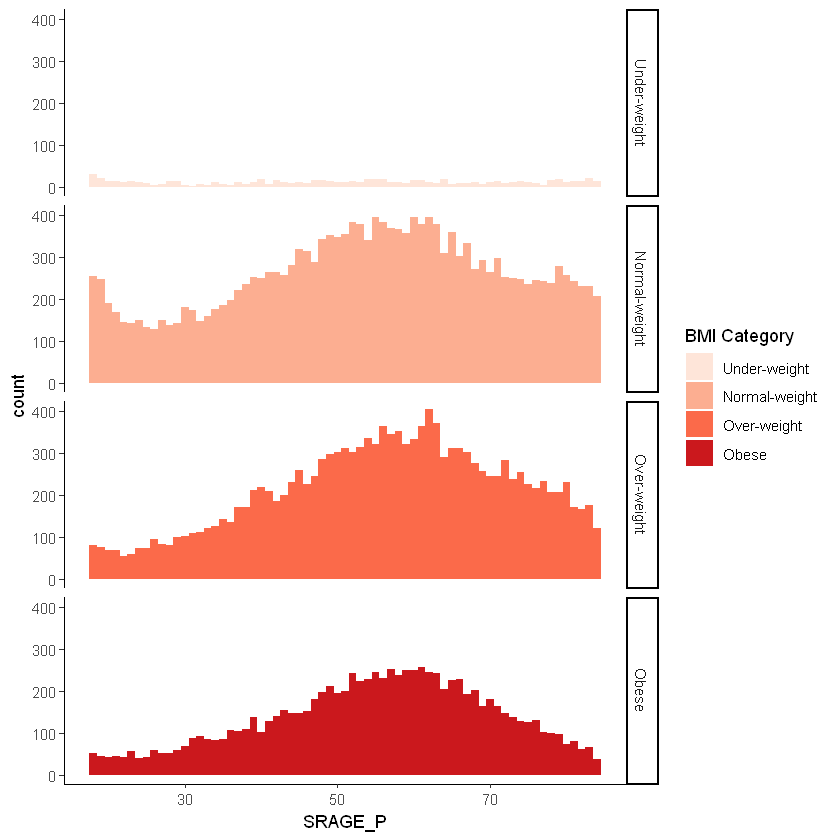

In [233]:
# The dataset adult is available

# The color scale used in the plot
BMI_fill <- scale_fill_brewer("BMI Category", palette = "Reds")

# Theme to fix category display in faceted plot
fix_strips <- theme(
  strip.text.y = element_text(angle = 0, hjust = 0, vjust = 0.1, size = 14),
  strip.background = element_blank(),
  legend.position = "none")

# Histogram, add BMI_fill and customizations
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1) +
  fix_strips + 
  BMI_fill + 
  facet_grid(RBMI ~ .) + 
  theme_classic()

In [235]:
# Alternatives
# In the previous exercise we looked at different ways of showing the absolute count of multiple histograms. 
# This is fine, but density would be a more useful measure if we wanted to see how the frequency of one variable changes
# across another. However, there are some difficulties here, so let's take a closer look at different plots.
# 
# The clean adult dataset is available, as is the BMI_fill color palette. The first plot simply shows a histogram of counts, 
# without facets, without modified themes. It's denoted Plot 1.
# 
# Instructions
# 
# Plot 2 - Copy, paste and adapt the code for plot 1 so that it shows density. Do this by adding aes(y = ..density..) 
# inside the geom_histogram() function. This plot looks really strange, because we get the density within each BMI category, 
# not within each age group!
# Plot 3 - starting from plot 1, create a faceted histogram. Use facet_grid() with the formula: RBMI ~ ..
# Plot 4 - starting from plot 2, create a faceted histogram showing density. Use facet_grid() with the formula RBMI ~ ..
# Plots 3 and 4 can be useful if we are interested in the frequency distribution within each BMI category.
# Plot 5 - Change the second plot to have position = "fill". This is not an accurate representation, as density calculates 
# the proportion across category, and not across bin.
# Plot 6 - To get an accurate visualization, change Plot 5, but this time, instead of ..density.., set the y aesthetic 
# to ..count../sum(..count..). 

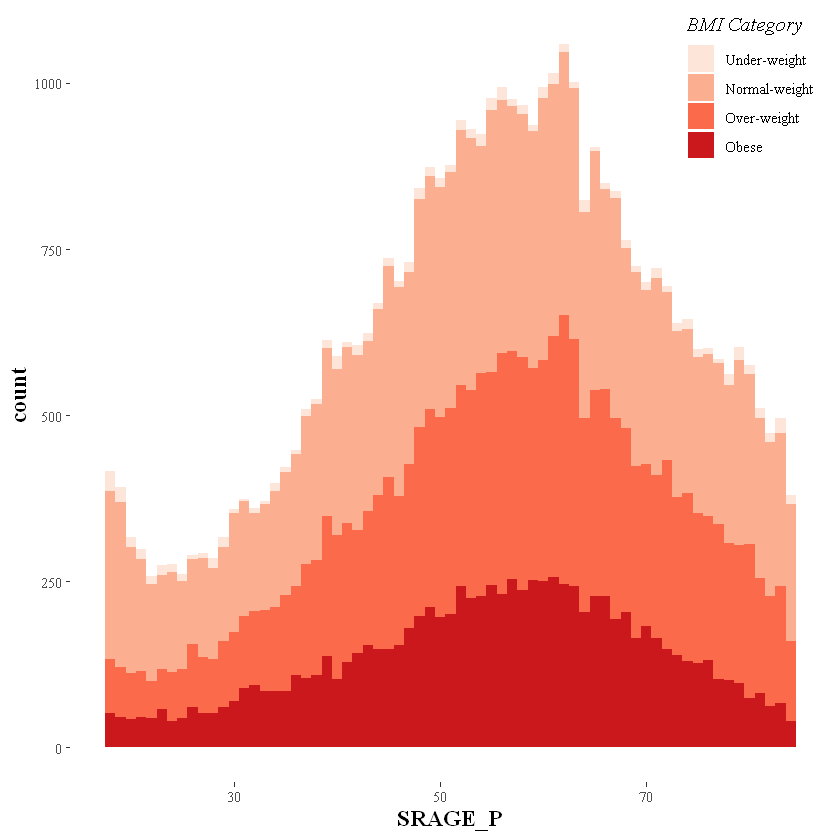

In [236]:
# Plot 1 - Count histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1) +
  BMI_fill

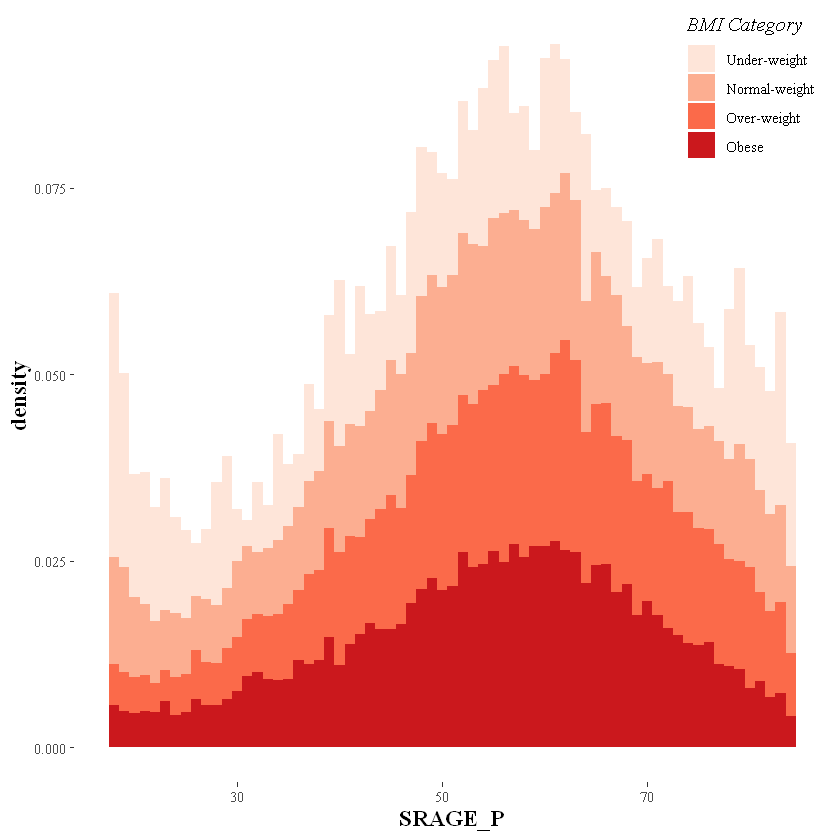

In [237]:
# Plot 2 - Density histogram
## This plot looks really strange, because we get the density within each BMI category, not within each age group!
ggplot(adult, aes(x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..), binwidth = 1) +
  BMI_fill

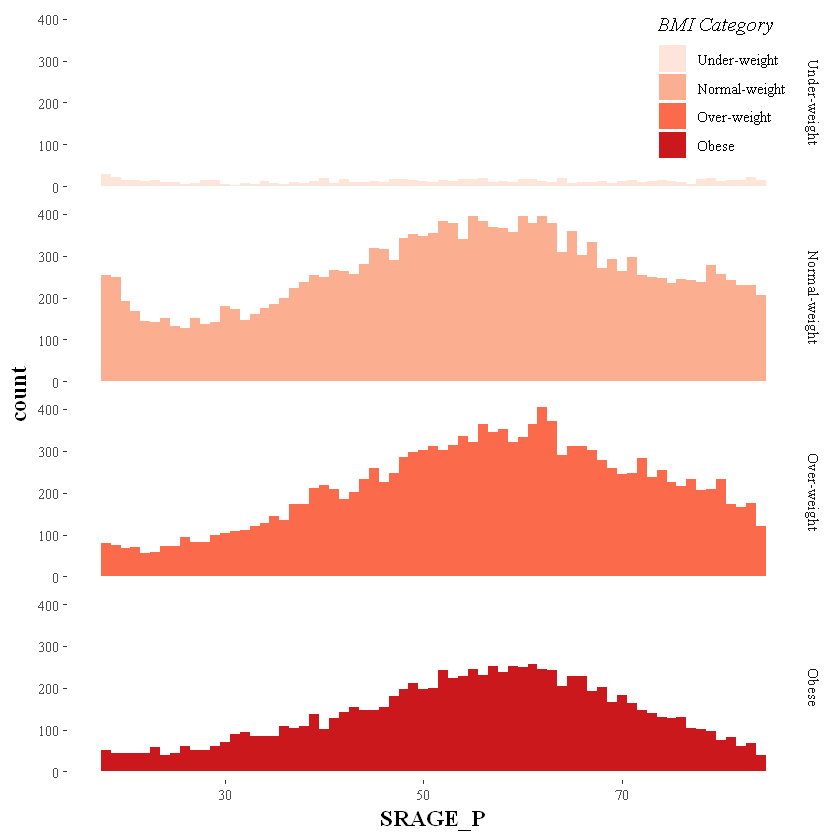

In [238]:
# Plot 3 - Faceted count histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1) +
  BMI_fill + 
  facet_grid(RBMI ~ .)

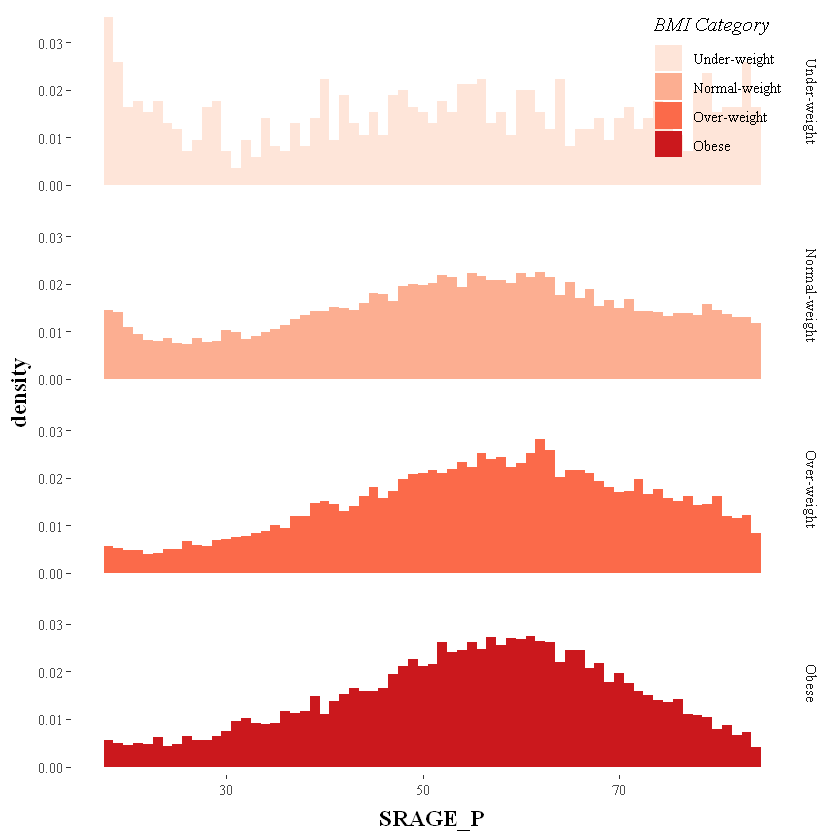

In [239]:
# Plot 4 - Faceted density histogram
## Plots 3 and 4 can be useful if we are interested in the frequency distribution within each BMI category.
ggplot(adult, aes(x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..), binwidth = 1) +
  BMI_fill + 
  facet_grid(RBMI ~ .)

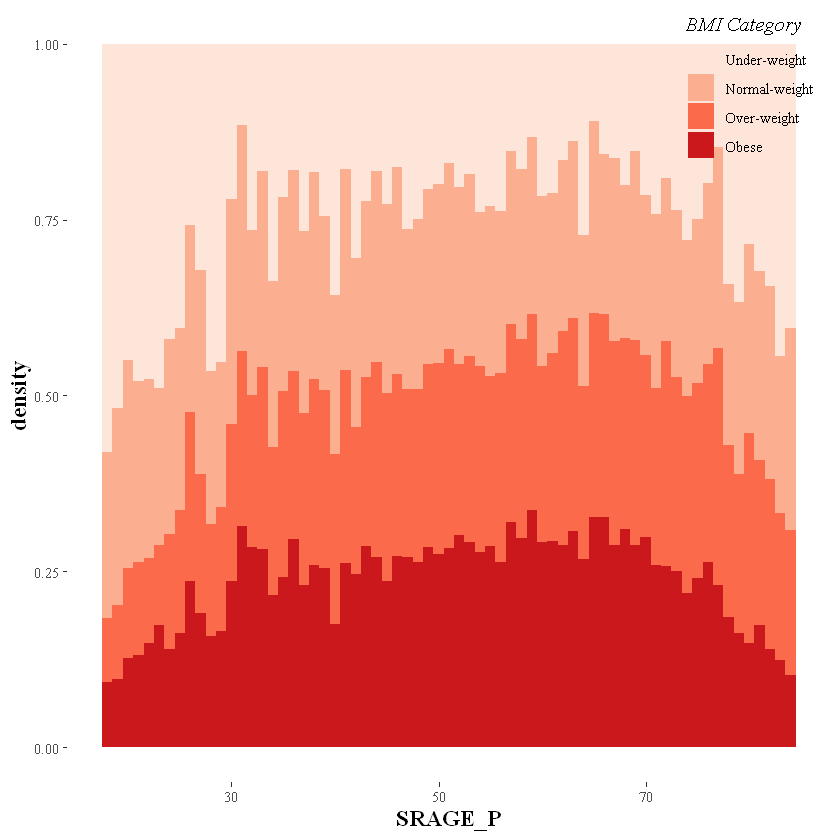

In [240]:
# Plot 5 - Density histogram with position = "fill"
## This is not an accurate representation, as density calculates the proportion across category, and not across bin.
ggplot(adult, aes(x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..), binwidth = 1, position = "fill") +
  BMI_fill

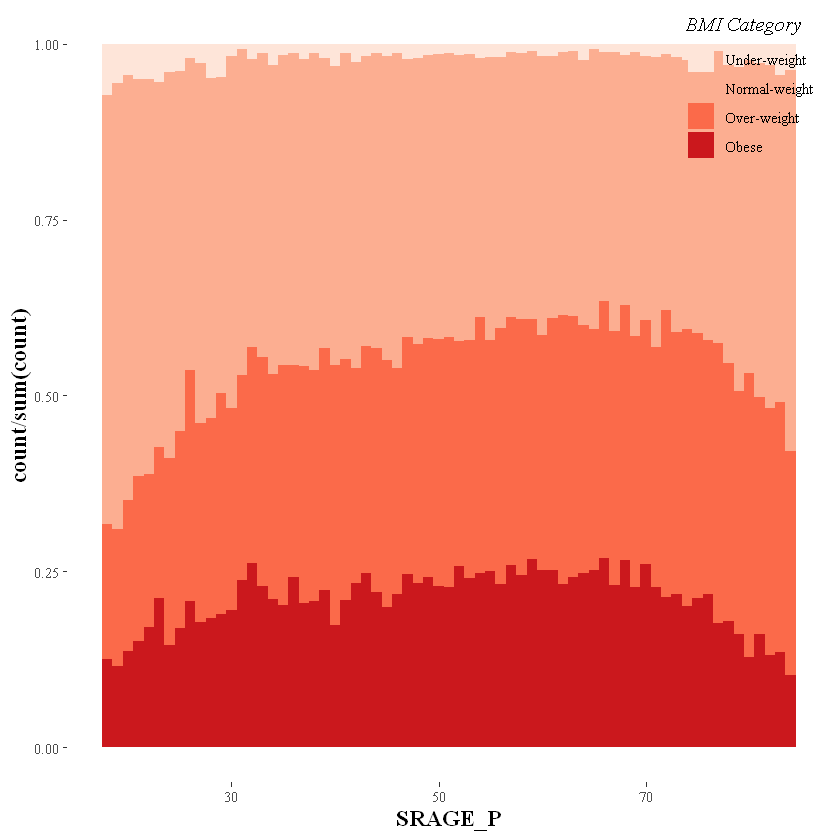

In [241]:
# Plot 6 - The accurate histogram
ggplot(adult, aes(x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..count../sum(..count..)), binwidth = 1, position = "fill") +
  BMI_fill

In [242]:
# Do Things Manually
# In the previous exercise we looked at how to produce a frequency histogram when we have many sub-categories. 
# The problem here is that this can't be facetted because the calculations occur on the fly inside ggplot2.
# 
# To overcome this we're going to calculate the proportions outside ggplot2. This is the beginning of our flexible 
# script for a mosaic plot.
# 
# The dataset adult and the BMI_fill object from the previous exercise have been carried over for you. 
# Code that tries to make the accurate frequency histogram facetted is available. You should understand these commands by now.
# 
# Instructions
# 
# Use adult$RBMI and adult$SRAGE_P as arguments in table() to create a contingency table of the two variables. Save this as DF.
# Use apply() To get the frequency of each group. The first argument is DF, the second argument 2, because you want 
# to do calculations on each column. The third argument should be function(x) x/sum(x). Store the result as DF_freq.
# Load the reshape2 package and use the melt() function on DF_freq. Store the result as DF_melted. Examine the structure 
# of DF_freq and DF_melted if you are not familiar with this operation.
# Note: Here we use reshape2 instead of the more current tidyr because reshape2::melt() allows us to work directly on a table.
# tidyr::gather() requires a data frame.
# 
# Use names() to rename the variables in DF_melted to be c("FILL", "X", "value"), with the prospect of making this a generalized
# function later on.
# The plotting call at the end uses DF_melted. Add code to make it facetted. Use the formula FILL ~ .. 
# Note that we use geom_col() now, this is just a short-cut to geom_bar(stat = "identity").

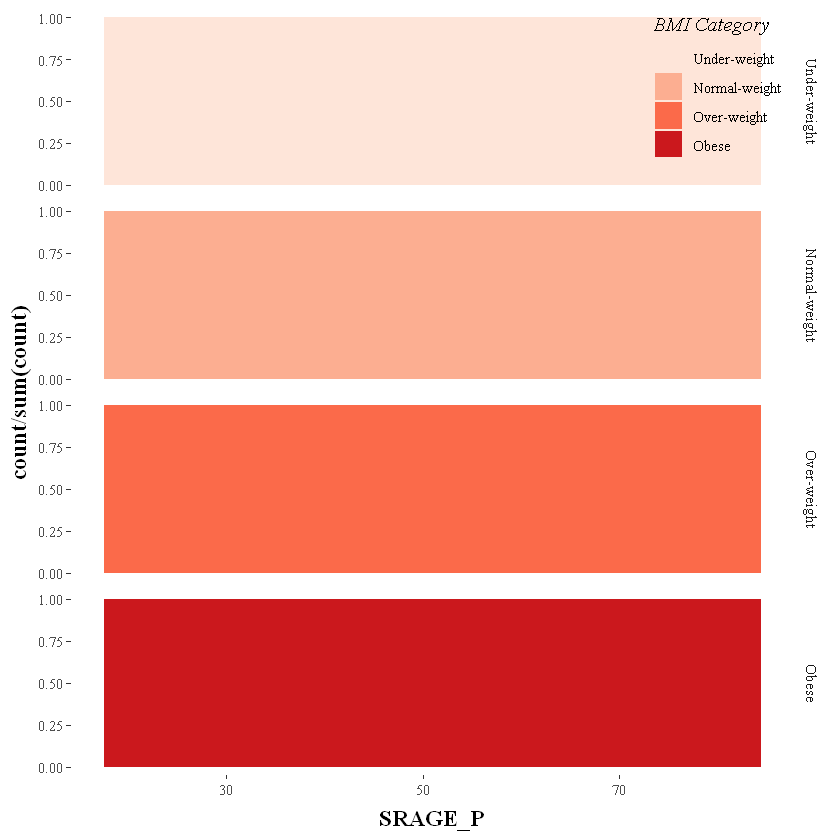

In [243]:
# An attempt to facet the accurate frequency histogram from before (failed)
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..count../sum(..count..)), binwidth = 1, position = "fill") +
  BMI_fill +
  facet_grid(RBMI ~ .)

In [244]:
# Create DF with table()
DF <- table(adult$RBMI, adult$SRAGE_P)

# Use apply on DF to get frequency of each group
DF_freq <- apply(DF, 2, function(x) x/sum(x))

# Load reshape2 and use melt on DF to create DF_melted
library(reshape2)
DF_melted <- melt(DF_freq)

# Change names of DF_melted
names(DF_melted) <- c("FILL","X","value")
head(DF_melted)

FILL,X,value
Under-weight,18,0.07211538
Normal-weight,18,0.61057692
Over-weight,18,0.19230769
Obese,18,0.12500000
Under-weight,19,0.05626598
Normal-weight,19,0.63427110


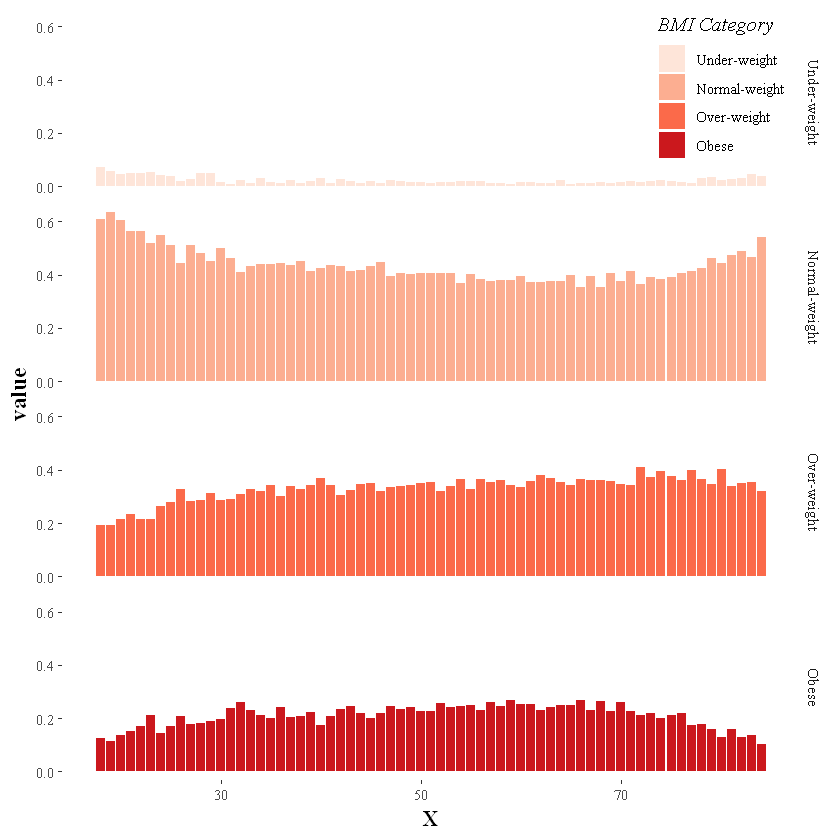

In [245]:
# Add code to make this a faceted plot
ggplot(DF_melted, aes(x = X, y = value, fill = FILL)) +
  geom_bar(stat = "identity", position = "stack") +
  BMI_fill +
  facet_grid(FILL ~ .)

In [246]:
# Marimekko/Mosaic Plot
# In the previous exercise we looked at different ways of showing the frequency distribution within each BMI category. 
# This is all well and good, but the absolute number of each age group also has an influence on if we will consider something 
# as over-represented or not. Here, we will proceed to change the widths of the bars to show us something about the n in each 
# group.
# 
# This will get a bit more involved, because the aim is not to draw bars, but rather rectangles, for which we can control 
# the widths. You may have already realized that bars are simply rectangles, but we don't have easy access to 
# the xmin and xmax aesthetics, but in geom_rect() we do! Likewise, we also have access to ymin and ymax. 
# So we're going to draw a box for every one of our 268 distinct groups of BMI category and age.
# 
# The clean adult dataset, as well as BMI_fill, are already available. Instead of running apply() like in the previous exercise,
# the contingency table has already been transformed to a data frame using as.data.frame.matrix().
# 
# Instructions
# 
# To build the rectangle plot, we'll add several variables to DF:
# groupSum, containing the sum of each row in the DF. Use rowSums() to calculate this. groupSum represents the total number 
# of individuals in each age group.
# xmax: the xmax value for each rectangle, calculated as cumsum(DF$groupSum)
# xmin: the xmin value for each rectangle, calculated by subtracting the groupSum column from the xmax column.
# The names of the x axis groups are stored in the row names, which is pretty bad style, so make a new variable, X,
# that stores the values of row.names() for DF.
# Now we are ready to melt the dataset. Load reshape2 and use melt() on DF. Specify the id.vars variables as
# c("X", "xmin", "xmax") and the variable.name argument as "FILL". Store the result as DF_melted.
# Have a look at the dplyr call that calculates the ymax and ymin columns of DF_melted. It first groups by X and 
# then calculates cumulative proportions. The result is stored as DF_melted again.
# If all goes well you should see the plot in the viewer when you execute the plotting function at the bottom of the script.

In [247]:
# The initial contingency table
DF <- as.data.frame.matrix(table(adult$SRAGE_P, adult$RBMI))

head(DF)

,Under-weight,Normal-weight,Over-weight,Obese
18,30,254,80,52
19,22,248,76,45
20,14,191,68,43
21,15,168,70,45
22,13,145,56,44
23,15,142,59,58


In [248]:
# Add the columns groupsSum, xmax and xmin. Remove groupSum again.
DF$groupSum <- rowSums(DF)
DF$xmax <- cumsum(DF$groupSum)
DF$xmin <- DF$xmax - DF$groupSum

head(DF)

,Under-weight,Normal-weight,Over-weight,Obese,groupSum,xmax,xmin
18,30,254,80,52,416,416,0
19,22,248,76,45,391,807,416
20,14,191,68,43,316,1123,807
21,15,168,70,45,298,1421,1123
22,13,145,56,44,258,1679,1421
23,15,142,59,58,274,1953,1679


In [249]:
# The groupSum column needs to be removed, don't remove this line
DF$groupSum <- NULL

# Copy row names to variable X
DF$X <- row.names(DF)

head(DF)

,Under-weight,Normal-weight,Over-weight,Obese,xmax,xmin,X
18,30,254,80,52,416,0,18
19,22,248,76,45,807,416,19
20,14,191,68,43,1123,807,20
21,15,168,70,45,1421,1123,21
22,13,145,56,44,1679,1421,22
23,15,142,59,58,1953,1679,23


In [250]:
# Melt the dataset
library(reshape2)
DF_melted <- melt(DF, id.vars = c("X","xmin","xmax"), variable.name = "FILL")

head(DF_melted)

X,xmin,xmax,FILL,value
18,0,416,Under-weight,30
19,416,807,Under-weight,22
20,807,1123,Under-weight,14
21,1123,1421,Under-weight,15
22,1421,1679,Under-weight,13
23,1679,1953,Under-weight,15


In [251]:
# dplyr call to calculate ymin and ymax - don't change
library(dplyr)
DF_melted <- DF_melted %>%
  group_by(X) %>%
  mutate(ymax = cumsum(value/sum(value)),
         ymin = ymax - value/sum(value))
         
head(DF_melted)

X,xmin,xmax,FILL,value,ymax,ymin
18,0,416,Under-weight,30,0.07211538,0
19,416,807,Under-weight,22,0.05626598,0
20,807,1123,Under-weight,14,0.04430380,0
21,1123,1421,Under-weight,15,0.05033557,0
22,1421,1679,Under-weight,13,0.05038760,0
23,1679,1953,Under-weight,15,0.05474453,0


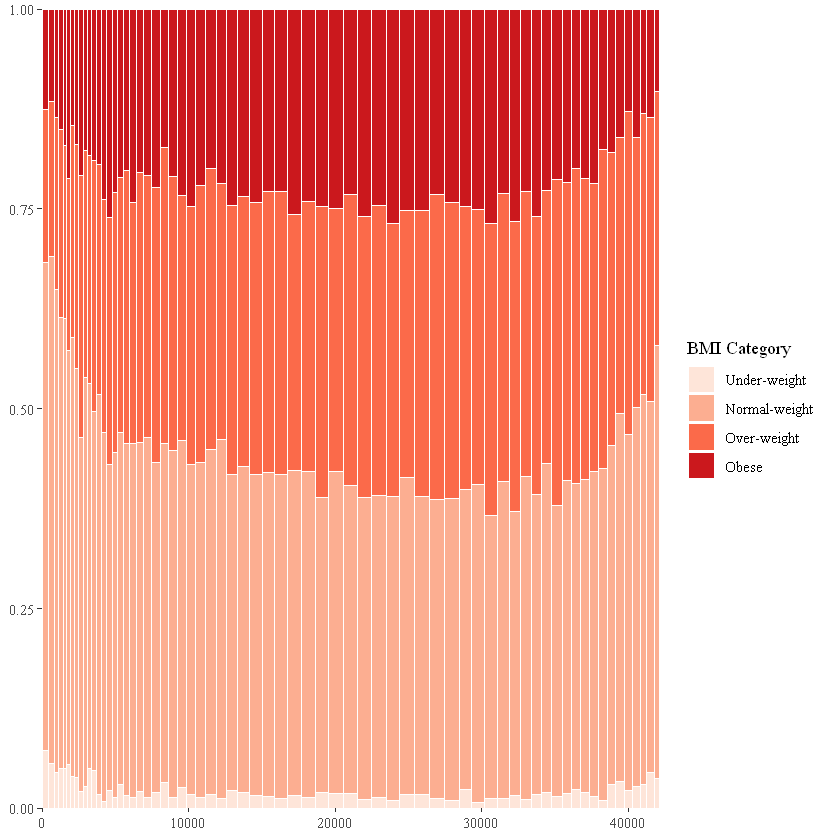

In [252]:
# Plot rectangles - don't change.
library(ggthemes)
ggplot(DF_melted, aes(ymin = ymin,
                 ymax = ymax,
                 xmin = xmin,
                 xmax = xmax,
                 fill = FILL)) +
  geom_rect(colour = "white") +
  scale_x_continuous(expand = c(0,0)) +
  scale_y_continuous(expand = c(0,0)) +
  BMI_fill +
  theme_tufte()

In [253]:
# Adding statistics
# In the previous exercise we generated a plot where each individual bar was plotted separately using rectangles
# (shown in the viewer). This means we have access to each piece and we can apply different fill parameters.
# 
# So let's make some new parameters. To get the Pearson residuals, we'll use the chisq.test() function.
# 
# The data frames adult and DF_melted, as well as the object BMI_fill that you created throughout this chapter, 
# are all still available. The reshape2 package is already loaded.
# 
# Instructions
# 
# Use the adult$RBMI (corresponding to FILL) and adult$SRAGE_P (corresponding to X) columns inside the table() function 
# that's inside the chisq.test() function. Store the result as results.
# The residuals can be accessed through results$residuals. Apply the melt() function on them with no further arguments. 
# Store the resulting data frame as resid.
# Change the names of resid to c("FILL", "X", "residual"). This is so that we have a consistent naming convention similar 
# to how we called our variables in the previous exercises.
# The data frame from the previous exercise, DF_melted is already available. Use the merge() function to bring
# the two data frames together. Store the result as DF_all.
# Adapt the code in the ggplot command to use DF_all instead of DF_melted. Also, map residual onto fill instead of FILL.

In [254]:
# Perform chi.sq test (RBMI and SRAGE_P)
results <- chisq.test(table(adult$RBMI, adult$SRAGE_P))
results


	Pearson's Chi-squared test

data:  table(adult$RBMI, adult$SRAGE_P)
X-squared = 1009.5, df = 198, p-value < 2.2e-16


In [255]:
results$residuals[,1:10]

               
                         18          19          20          21          22
  Under-weight   7.47179778  5.03512156  3.02792392  3.67423461  3.42464927
  Normal-weight  6.05481544  6.59427793  5.10823635  3.87533468  3.56260420
  Over-weight   -5.19674665 -4.96823858 -3.83282614 -3.13951820 -3.41198915
  Obese         -4.13851986 -4.42983370 -3.18740258 -2.54605123 -1.70034458
               
                         23          24          25          26          27
  Under-weight   4.03750542  2.32169035  2.08265778  0.07512095  0.86488182
  Normal-weight  2.55155049  3.34680420  2.31827445  0.64065686  2.47176906
  Over-weight   -3.56510749 -2.14837232 -1.66615268 -0.36092833 -1.69525099
  Obese         -0.30126201 -2.64202566 -1.75199864 -0.45670706 -1.55916895

In [256]:
# Melt results$residuals and store as resid
resid <- melt(results$residuals)

# Change names of resid
names(resid)

[1] "Var1"  "Var2"  "value"

In [257]:
names(resid) <- c("FILL","X","residual")
names(resid)

[1] "FILL"     "X"        "residual"

In [258]:
# merge the two datasets:
head(resid)

FILL,X,residual
Under-weight,18,7.471798
Normal-weight,18,6.054815
Over-weight,18,-5.196747
Obese,18,-4.138520
Under-weight,19,5.035122
Normal-weight,19,6.594278


In [259]:
head(DF_melted)

X,xmin,xmax,FILL,value,ymax,ymin
18,0,416,Under-weight,30,0.07211538,0
19,416,807,Under-weight,22,0.05626598,0
20,807,1123,Under-weight,14,0.04430380,0
21,1123,1421,Under-weight,15,0.05033557,0
22,1421,1679,Under-weight,13,0.05038760,0
23,1679,1953,Under-weight,15,0.05474453,0


In [260]:
DF_all <- merge(DF_melted, resid)
head(DF_all)

X,FILL,xmin,xmax,value,ymax,ymin,residual
18,Normal-weight,0,416,254,0.68269231,0.07211538,6.054815
18,Obese,0,416,52,1.00000000,0.87500000,-4.138520
18,Over-weight,0,416,80,0.87500000,0.68269231,-5.196747
18,Under-weight,0,416,30,0.07211538,0.00000000,7.471798
19,Normal-weight,416,807,248,0.69053708,0.05626598,6.594278
19,Obese,416,807,45,1.00000000,0.88491049,-4.429834


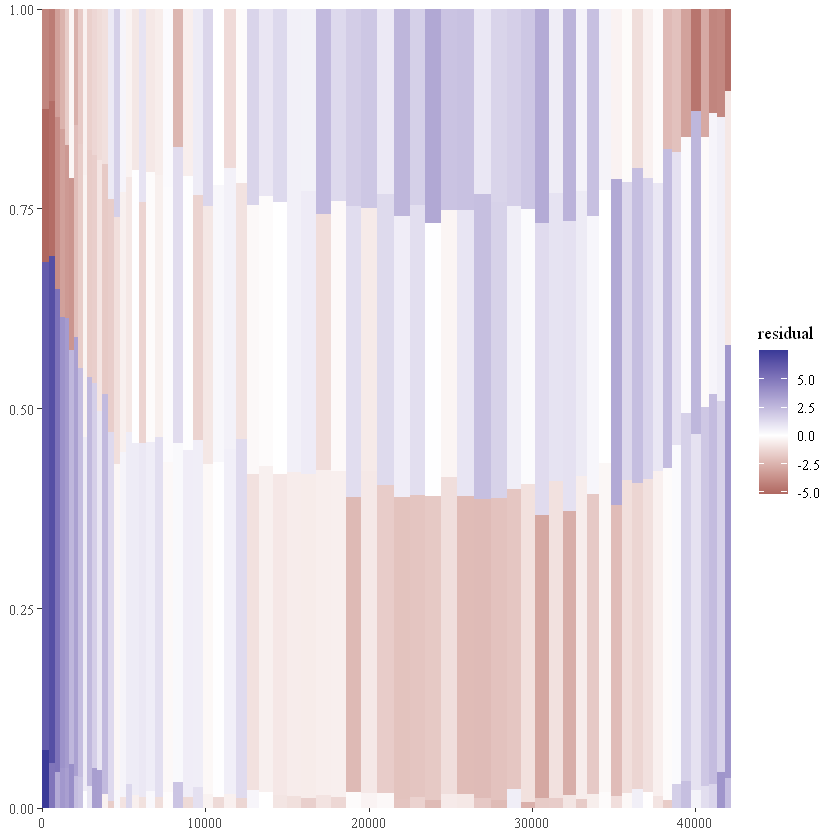

In [261]:
# Update plot command
library(ggthemes)
ggplot(DF_all, aes(ymin = ymin,
                   ymax = ymax,
                   xmin = xmin,
                   xmax = xmax,
                   fill = residual)) +
  geom_rect() +
  scale_fill_gradient2() +
  scale_x_continuous(expand = c(0,0)) +
  scale_y_continuous(expand = c(0,0)) +
  theme_tufte()

In [ ]:
# Adding text
# Since we're not coloring according to BMI, we have to add group (and x axis) labels manually. 
# Our goal is the plot in the viewer.
# 
# For this we'll use the label aesthetic inside geom_text(). The actual labels are found in 
# the FILL (BMI category) and X (age) columns in the DF_all data frame. (Additional attributes have been set inside
#                                                                        geom_text() in the exercise for you).
# 
# The labels will be added to the right (BMI category) and top (age) inner edges of the plot. (We could have also added 
# margin text, but that is a more advanced topic that we'll encounter in the third course. This will be a suitable solution 
# for the moment.)
# 
# The first two commands show how we got the the four positions for the y axis labels. First, we got the position of
# the maximum xmax values, i.e. at the very right end, stored as index. We want to calculate the half difference between 
# each pair of ymax and ymin (e.g. (ymax - ymin)/2) at these index positions, then add this value to the ymin value. 
# These positions are stored in the variable yposn.
# 
# We'll begin with the plot thus far, stored as object p. In the sample code, %+% DF_all refreshes the plot's dataset
# with the extra columns.
# 
# Instructions
# 
# Plot 1: In the geom_text() function, define the x, y and label aesthetics.
# 
# Set x to max(xmax), so the labels are on the right side of the plot.
# 
# Set the position of y to yposn.
# 
# Set the label text to FILL.
# 
# Plot 2: The same thing for the x axis label positions. You don't need to find an index here, since you can use 
# the same y position for all these labels: 1.
# 
# Calculate the half difference between each pair of xmax and xmin then add this value to xmin.
# 
# Complete the plot command by adding the labels in the xposn to our plot, the label this time will be X, 
# which in this case is the age.

In [262]:
# Position for labels on x axis
DF_all$xtext <- DF_all$xmin + (DF_all$xmax - DF_all$xmin)/2

# Position for labels on y axis (don't change)
index <- DF_all$xmax == max(DF_all$xmax)
DF_all$ytext <- DF_all$ymin[index] + (DF_all$ymax[index] - DF_all$ymin[index])/2

head(DF_all)

X,FILL,xmin,xmax,value,ymax,ymin,residual,xtext,ytext
18,Normal-weight,0,416,254,0.68269231,0.07211538,6.054815,208.0,0.30789474
18,Obese,0,416,52,1.00000000,0.87500000,-4.138520,208.0,0.94868421
18,Over-weight,0,416,80,0.87500000,0.68269231,-5.196747,208.0,0.73815789
18,Under-weight,0,416,30,0.07211538,0.00000000,7.471798,208.0,0.01842105
19,Normal-weight,416,807,248,0.69053708,0.05626598,6.594278,611.5,0.30789474
19,Obese,416,807,45,1.00000000,0.88491049,-4.429834,611.5,0.94868421


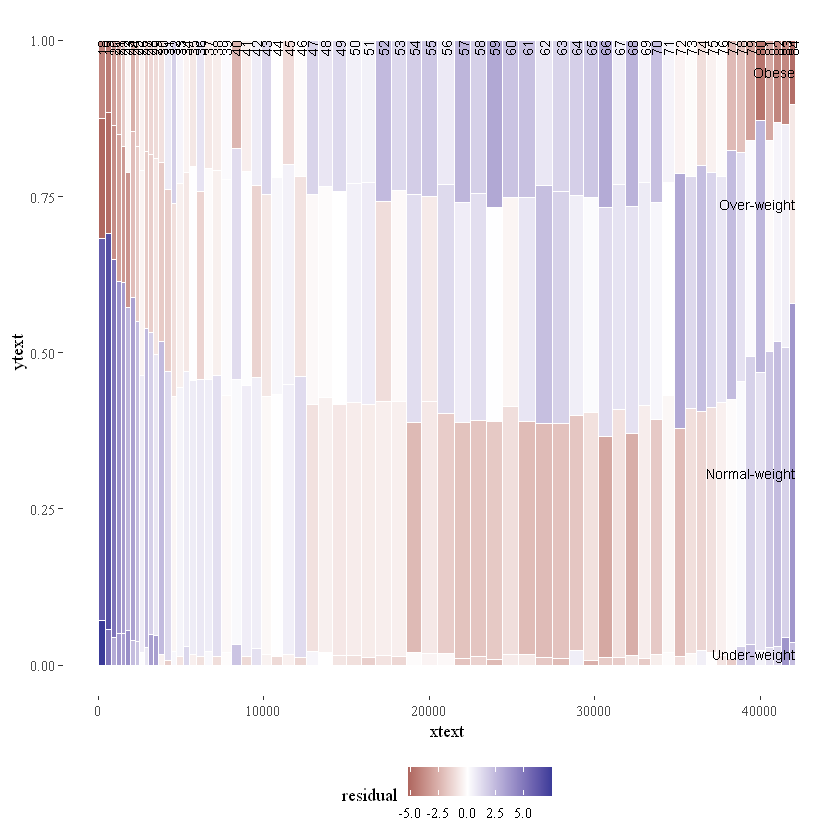

In [263]:
# Plot
ggplot(DF_all, 
    aes(ymin = ymin, ymax = ymax, 
        xmin = xmin, xmax = xmax, 
        fill = residual)) +
  geom_rect(col = "white") +
  # geom_text for ages (i.e. the x axis)
  geom_text(
    aes(x = xtext,label = X),
    y = 1,
    size = 3,
    angle = 90,
    hjust = 1,
    show.legend = FALSE) +
  # geom_text for BMI (i.e. the fill axis)
  geom_text(
    aes(x = max(xmax), y = ytext, label = FILL),
    size = 3,
    hjust = 1,
    show.legend  = FALSE) +
  scale_fill_gradient2() +
  theme_tufte() +
  theme(legend.position = "bottom")

In [264]:
# Generalizations
# Now that you've done all the steps necessary to make our mosaic plot, you can wrap all the steps 
# into a single function that we can use to examine any two variables of interest in our 
# data frame (or in any other data frame for that matter). For example, we can use it to examine the Vocab data frame
# we saw earlier in this course.
# 
# You've seen all the code in our function, so there shouldn't be anything surprising there. Notice that the function takes
# multiple arguments, such as the data frame of interest and the variables that you want to create the mosaic plot for. 
# None of the arguments have default values, so you'll have to specify all three if you want the mosaicGG() function to work.
# 
# Start by going through the code and see if you understand the function's implementation.
# 
# Instructions
# 
# 
# Print mosaicGG and read its contents.
# Calling mosaicGG(adult, "SRAGE_P","RBMI") will result in the plot you've been working on so far. Try this out. 
# This gives you a mosaic plot where BMI is described by age.
# Test out another combination of variables in the adult data frame: Poverty (POVLL) described by Age (SRAGE_P).
# Try the function on other datasets we've worked with throughout this course:
# mtcars dataset: am described by cyl
# Vocab dataset: vocabulary described by education.

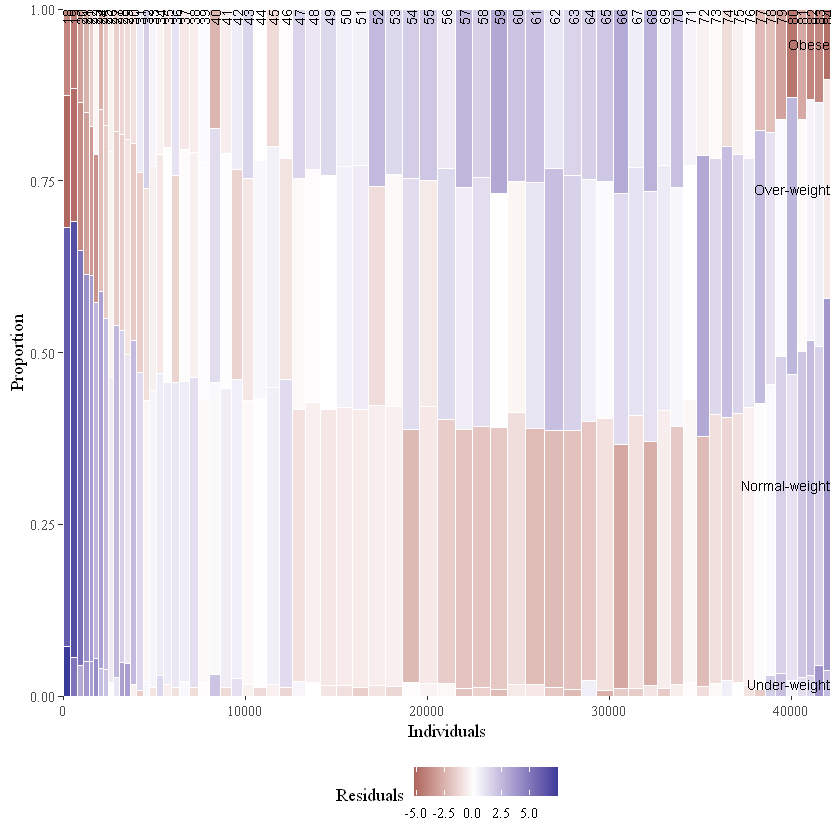

In [265]:
# Load all packages
library(ggplot2)
library(reshape2)
library(dplyr)
library(ggthemes)

# Script generalized into a function
mosaicGG <- function(data, X, FILL) {

  # Proportions in raw data
  DF <- as.data.frame.matrix(table(data[[X]], data[[FILL]]))
  DF$groupSum <- rowSums(DF)
  DF$xmax <- cumsum(DF$groupSum)
  DF$xmin <- DF$xmax - DF$groupSum
  DF$X <- row.names(DF)
  DF$groupSum <- NULL
  DF_melted <- melt(DF, id = c("X", "xmin", "xmax"), variable.name = "FILL")
  library(dplyr)
  DF_melted <- DF_melted %>%
    group_by(X) %>%
    mutate(ymax = cumsum(value/sum(value)),
           ymin = ymax - value/sum(value))

  # Chi-sq test
  results <- chisq.test(table(data[[FILL]], data[[X]])) # fill and then x
  resid <- melt(results$residuals)
  names(resid) <- c("FILL", "X", "residual")

  # Merge data
  DF_all <- merge(DF_melted, resid)

  # Positions for labels
  DF_all$xtext <- DF_all$xmin + (DF_all$xmax - DF_all$xmin)/2
  index <- DF_all$xmax == max(DF_all$xmax)
  DF_all$ytext <- DF_all$ymin[index] + (DF_all$ymax[index] - DF_all$ymin[index])/2

  # plot:
  g <- ggplot(DF_all, aes(ymin = ymin,  ymax = ymax, xmin = xmin,
                          xmax = xmax, fill = residual)) +
  geom_rect(col = "white") +
  geom_text(aes(x = xtext, label = X),
            y = 1, size = 3, angle = 90, hjust = 1, show.legend = FALSE) +
  geom_text(aes(x = max(xmax),  y = ytext, label = FILL),
            size = 3, hjust = 1, show.legend = FALSE) +
  scale_fill_gradient2("Residuals") +
  scale_x_continuous("Individuals", expand = c(0,0)) +
  scale_y_continuous("Proportion", expand = c(0,0)) +
  theme_tufte() +
  theme(legend.position = "bottom")
  print(g)
}

# BMI described by age
mosaicGG(adult, "SRAGE_P", "RBMI")

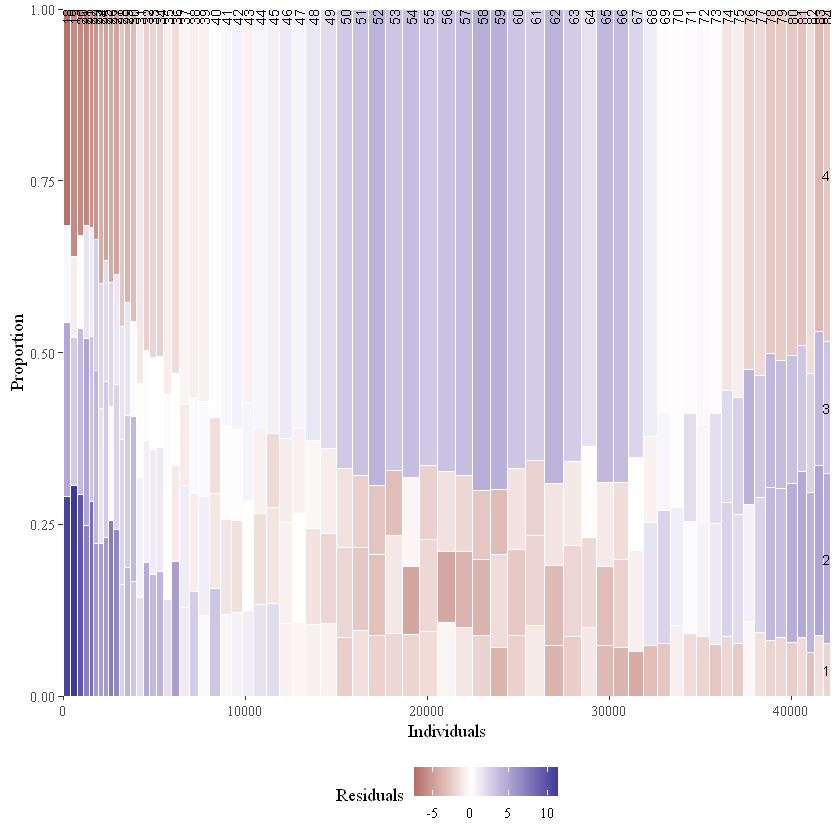

In [266]:
# Poverty described by age
mosaicGG(adult, "SRAGE_P", "POVLL")

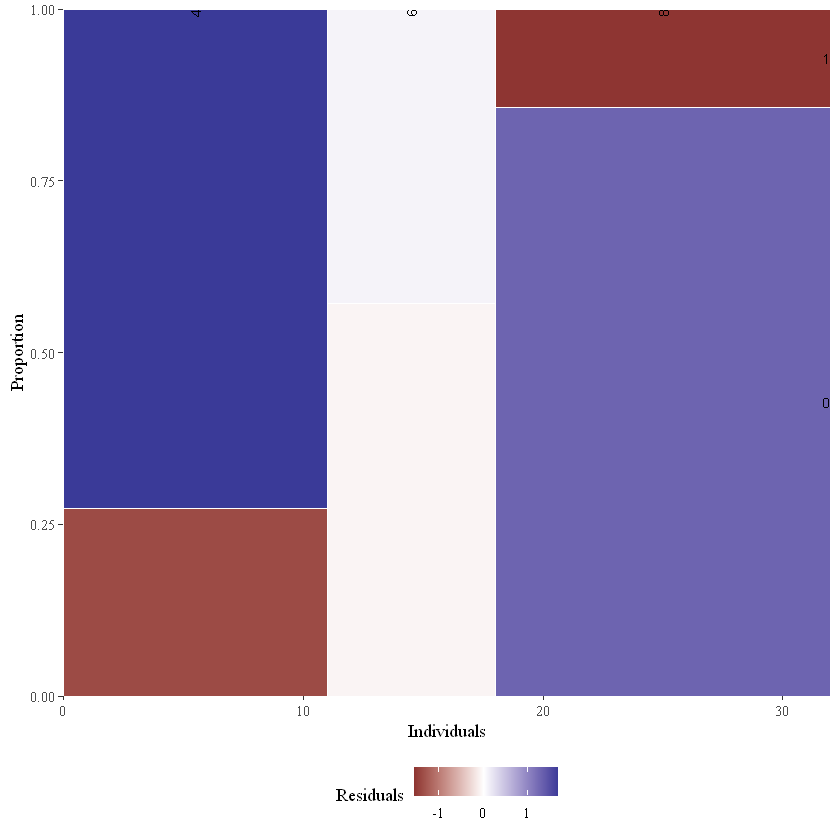

In [267]:
# mtcars: am described by cyl
mosaicGG(mtcars, "cyl", "am")

In [269]:
install.packages("CAR")

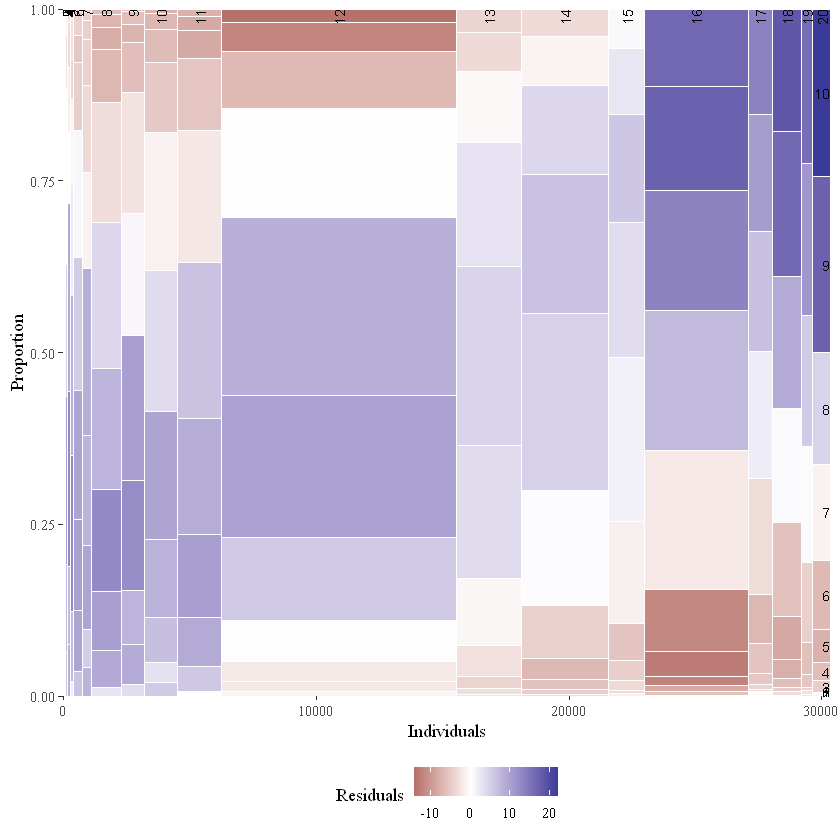

In [272]:
# Vocab: vocabulary described by education
library(carData)
mosaicGG(Vocab, "education", "vocabulary")

# END OF THIS EXCELLENT COURSE